# <span style="color: black;"><b>Optimisation of Supply Chain Management Using Machine Learning Algorithms </b></span>

## Introduction
Dataset source: https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

The dataset is made up of 180519 observations and 53 columns (attributes).


Notebook organisation:

1. Importing the required libraries
2. Reading the data
3. Data Preparation/Pre-processing
4. Feature Engineering
5. Splitting/Preparing Data For The Different Aspects Of Supply Chain Being Considered
6. Machine Learning Modelling and Evaluation


## 1.Importing the Required Libraries

In [1]:
# Installing category encoder
# Needed for target encoding the categorical variables
!pip install category_encoders

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
# Installing the "imblearn" library
# For balancing imbalanced data
!pip install imbalanced-learn

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
from datetime import datetime, date

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Machine learning
from numpy import mean, std

# Data Splitting
from sklearn.model_selection import train_test_split

# Data transformation and standardization
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

# For Balancing Data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# Regression Models
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# For Model Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, auc
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import plot_roc_curve

# For Saving the Model
import pickle

## 2. Reading the CSV File

In [4]:
# Load the data into a pandas DataFrame
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding="latin-1")
print('df shape:', df.shape)
df.head()

df shape: (180519, 53)


Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   
3          EE. UU.      XXXXXXXXX           Tana        19490           Tate   
4      Puerto Rico      XXXXXXXXX           Orli        19489      Hendricks   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   
3         XXXXXXXXX      Home Office             CA           3200 Amber Bend   
4         XXXXXXXXX        Corporate             PR  8671 Iron Anchor Corners   

   Customer Zipcode  Department Id Department Name   Latitude   Longitude  \
0             725.0              2         Fitness  18.251453  -66.037056   
1             725.0              2         Fitness  18.279451  -66.037064   
2           95125.0              2         Fitness  37.292233 -121.881279   
3           90027.0              2         Fitness  34.125946 -118.291016   
4             725.0              2         Fitness  18.253769  -66.037048   

         Market  Order City Order Country  Order Customer Id  \
0  Pacific Asia      Bekasi     Indonesia              20755   
1  Pacific Asia     Bikaner         India              19492   
2  Pacific Asia     Bikaner         India              19491   
3  Pacific Asia  Townsville     Australia              19490   
4  Pacific Asia  Townsville     Australia              19489   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0         1/31/2018 22:56     77202                    1360   
1         1/13/2018 12:27     75939                    1360   
2         1/13/2018 12:06     75938                    1360   
3         1/13/2018 11:45     75937                    1360   
4         1/13/2018 11:24     75936                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   
2            18.030001                      0.06         179253   
3            22.940001                      0.07         179252   
4            29.500000                      0.09         179251   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75             

## 3. Data Preparation/ Pre-processing 

### Exploratory Data Analysis

In [5]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
# Displaying data types of each column
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [7]:
# Defining a function to count the various data types
def data_types(df):
    num_features = [n for n in df.columns if df[n].dtypes!='O']
    print('1) Count of Numerical Features :',len(num_features))
    cat_features = [c for c in df.columns if df[c].dtypes=='O']
    print('2) Count of Categorical Features :',len(cat_features))
    
data_types(df)

1) Count of Numerical Features : 29
2) Count of Categorical Features : 24


In [8]:
# Displaying statistical summary of the columns
# with numerical data type in the DataFrame
df.describe()

Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000   
75%            64.800003          247.399994            1.000000   
max           911.799988         1939.989990            1.000000   

         Category Id    Customer Id  Customer Zipcode  Department Id  \
count  180519.000000  180519.000000     180516.000000  180519.000000   
mean       31.851451    6691.379495      35921.126914       5.443460   
std        15.640064    4162.918106      37542.461122       1.629246   
min         2.000000       1.000000        603.000000       2.000000   
25%        18.000000    3258.500000        725.000000       4.000000   
50%        29.000000    6457.000000      19380.000000       5.000000   
75%        45.000000    9779.000000      78207.000000       7.000000   
max        76.000000   20757.000000      99205.000000      12.000000   

            Latitude      Longitude  Order Customer Id       Order Id  \
count  180519.000000  180519.000000      180519.000000  180519.000000   
mean       29.719955     -84.915675        6691.379495   36221.894903   
std         9.813646      21.433241        4162.918106   21045.379569   
min       -33.937553    -158.025986           1.000000       1.000000   
25%        18.265432     -98.446312        3258.500000   18057.000000   
50%        33.144863     -76.847908        6457.000000   36140.000000   
75%        39.279617     -66.370583        9779.000000   54144.000000   
max        48.781933     115.263077       20757.000000   77204.000000   

       Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
count           180519.000000        180519.000000             180519.000000   
mean               692.509764            20.664741                  0.101668   
std                336.446807            21.800901                  0.070415   
min                 19.000000             0.000000                  0.000000   
25%                403.000000             5.400000                  0.040000   
50%                627.000000            14.000000                  0.100000   
75%               1004.000000            29.990000                  0.160000   
max               1363.000000           500.000000                  0.250000   

       Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
count  180519.000000             180519.000000            180519.000000   
mean    90260.000000                141.232550                 0.120647   
std     52111.490959                139.732492                 0.466796   
min         1.000000                  9.990000                -2.750000   
25%     45130.500000                 50.000000                 0.080000   
50%     90260.000000                 59.990002                 0.270000   
75%    135389.500000                199.990005                 0.360000   
max    180519.000000               1999.989990                 0.500000   

       Order Item Quantity          Sales  Order Item Total  \
count        180519.000000  1805

In [9]:
# Displaying the statistical summary of columns 
# with object data type
df.describe(include = ["object"])

Type Delivery Status Category Name Customer City Customer Country  \
count   180519          180519        180519        180519           180519   
unique       4               4            50           563                2   
top      DEBIT   Late delivery        Cleats        Caguas          EE. UU.   
freq     69295           98977         24551         66770           111146   

       Customer Email Customer Fname Customer Lname Customer Password  \
count          180519         180519         180511            180519   
unique              1            782           1109                 1   
top         XXXXXXXXX           Mary          Smith         XXXXXXXXX   
freq           180519          65150          64104            180519   

       Customer Segment Customer State          Customer Street  \
count            180519         180519                   180519   
unique                3             46                     7458   
top            Consumer             PR  9126 Wishing Expressway   
freq              93504          69373                      122   

       Department Name  Market     Order City   Order Country  \
count           180519  180519         180519          180519   
unique              11       5           3597             164   
top           Fan Shop   LATAM  Santo Domingo  Estados Unidos   
freq             66861   51594           2211           24840   

       order date (DateOrders)     Order Region Order State Order Status  \
count                   180519           180519      180519       180519   
unique                   65752               23        1089            9   
top           12/14/2016 12:29  Central America  Inglaterra     COMPLETE   
freq                         5            28341        6722        59491   

                                            Product Image  \
count                                              180519   
unique                                                118   
top     http://images.acmesports.sports/Perfect+Fitnes...   
freq                                                24515   

                            Product Name shipping date (DateOrders)  \
count                             180519                     180519   
unique                               118                      63701   
top     Perfect Fitness Perfect Rip Deck              1/5/2016 5:58   
freq                               24515                         10   

         Shipping Mode  
count           180519  
unique               4  
top     Standard Class  
freq            107752

In [10]:
# Getting the number of rows in the DataFrame
num_rows = len(df.index)

# Print the number of rows
print("Number of rows in the DataFrame: ", num_rows)

Number of rows in the DataFrame:  180519


In [11]:
# Getting  the number of columns in the DataFrame
num_cols = df.shape[1]

# Print the number of columns
print("Number of columns in the DataFrame: ", num_cols)

Number of columns in the DataFrame:  53


In [12]:
# Accessing column names using 'columns' attribute
column_names = df.columns

# Printing column names
print(column_names)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [13]:
# Changing the column names of the Dataframe to lower case 
# and replacing spaces with underscores in the column names
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Further renaming the columns to remove any parentheses in the column names
df.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

print('df shape:', df.shape)
df.head()

df shape: (180519, 53)


type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  customer_country customer_email customer_fname  customer_id customer_lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   
3          EE. UU.      XXXXXXXXX           Tana        19490           Tate   
4      Puerto Rico      XXXXXXXXX           Orli        19489      Hendricks   

  customer_password customer_segment customer_state           customer_street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   
3         XXXXXXXXX      Home Office             CA           3200 Amber Bend   
4         XXXXXXXXX        Corporate             PR  8671 Iron Anchor Corners   

   customer_zipcode  department_id department_name   latitude   longitude  \
0             725.0              2         Fitness  18.251453  -66.037056   
1             725.0              2         Fitness  18.279451  -66.037064   
2           95125.0              2         Fitness  37.292233 -121.881279   
3           90027.0              2         Fitness  34.125946 -118.291016   
4             725.0              2         Fitness  18.253769  -66.037048   

         market  order_city order_country  order_customer_id  \
0  Pacific Asia      Bekasi     Indonesia              20755   
1  Pacific Asia     Bikaner         India              19492   
2  Pacific Asia     Bikaner         India              19491   
3  Pacific Asia  Townsville     Australia              19490   
4  Pacific Asia  Townsville     Australia              19489   

  order_date_dateorders  order_id  order_item_cardprod_id  \
0       1/31/2018 22:56     77202                    1360   
1       1/13/2018 12:27     75939                    1360   
2       1/13/2018 12:06     75938                    1360   
3       1/13/2018 11:45     75937                    1360   
4       1/13/2018 11:24     75936                    1360   

   order_item_discount  order_item_discount_rate  order_item_id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   
2            18.030001                      0.06         179253   
3            22.940001                      0.07         179252   
4            29.500000                      0.09         179251   

   order_item_product_price  order_item_profit_ratio  order_item_quantity  \
0                    327.75                     0.29                    1   
1                    327.75                    -0.80                    1   

In [14]:
# Accessing dataframe dimensions using 'shape' attribute
num_rows, num_columns = df.shape

# Printing number of rows and columns
print("Dataframe shape:", df.shape)

Dataframe shape: (180519, 53)


In [15]:
# Calculating count of missing values in each column
missing_values_count = df.isnull().sum()

# Printing missing values count
print(missing_values_count)

type                                0
days_for_shipping_real              0
days_for_shipment_scheduled         0
benefit_per_order                   0
sales_per_customer                  0
delivery_status                     0
late_delivery_risk                  0
category_id                         0
category_name                       0
customer_city                       0
customer_country                    0
customer_email                      0
customer_fname                      0
customer_id                         0
customer_lname                      8
customer_password                   0
customer_segment                    0
customer_state                      0
customer_street                     0
customer_zipcode                    3
department_id                       0
department_name                     0
latitude                            0
longitude                           0
market                              0
order_city                          0
order_countr

The above shows that there are missing values in only 4 columns - "Customer LName" has 8 null values, "Customer Zipcode" column has 3 null values, "Order Zipcode" has 155679 null values while the entire "Product Description" column is null.

These features can easily be dropped as there are other features that provide similar information such as Customer Id which identifies each customer irrespective of names, Order Region, Order Country, Customer Street, Customer City, etc.

In [16]:
# Calculating count of duplicated rows
duplicated_rows_count = df.duplicated().sum()

# Printing duplicated rows count
print(duplicated_rows_count)

0


In [17]:
# Calculating count of non-missing values in each column
non_missing_values_count = df.count()

# Printing count of non-missing values
print(non_missing_values_count)

type                           180519
days_for_shipping_real         180519
days_for_shipment_scheduled    180519
benefit_per_order              180519
sales_per_customer             180519
delivery_status                180519
late_delivery_risk             180519
category_id                    180519
category_name                  180519
customer_city                  180519
customer_country               180519
customer_email                 180519
customer_fname                 180519
customer_id                    180519
customer_lname                 180511
customer_password              180519
customer_segment               180519
customer_state                 180519
customer_street                180519
customer_zipcode               180516
department_id                  180519
department_name                180519
latitude                       180519
longitude                      180519
market                         180519
order_city                     180519
order_countr

In [18]:
# Checking the count of unique values in each column
n_unique = df.nunique()

# Printing count of unique values
print(n_unique)

type                                4
days_for_shipping_real              7
days_for_shipment_scheduled         4
benefit_per_order               21998
sales_per_customer               2927
delivery_status                     4
late_delivery_risk                  2
category_id                        51
category_name                      50
customer_city                     563
customer_country                    2
customer_email                      1
customer_fname                    782
customer_id                     20652
customer_lname                   1109
customer_password                   1
customer_segment                    3
customer_state                     46
customer_street                  7458
customer_zipcode                  995
department_id                      11
department_name                    11
latitude                        11250
longitude                        4487
market                              5
order_city                       3597
order_countr

From the above, it is clear that there is no variability in the "Customer Email", "Customer Password" and "Product Status" columns since
they each have only 1 unique value. Hence, we drop these columns too

In [19]:
# Returning the unique values of the 'customer_country' column
df['customer_country'].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

In [20]:
# Returning the unique values of the 'customer_segment' column
df['customer_segment'].unique()                  

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

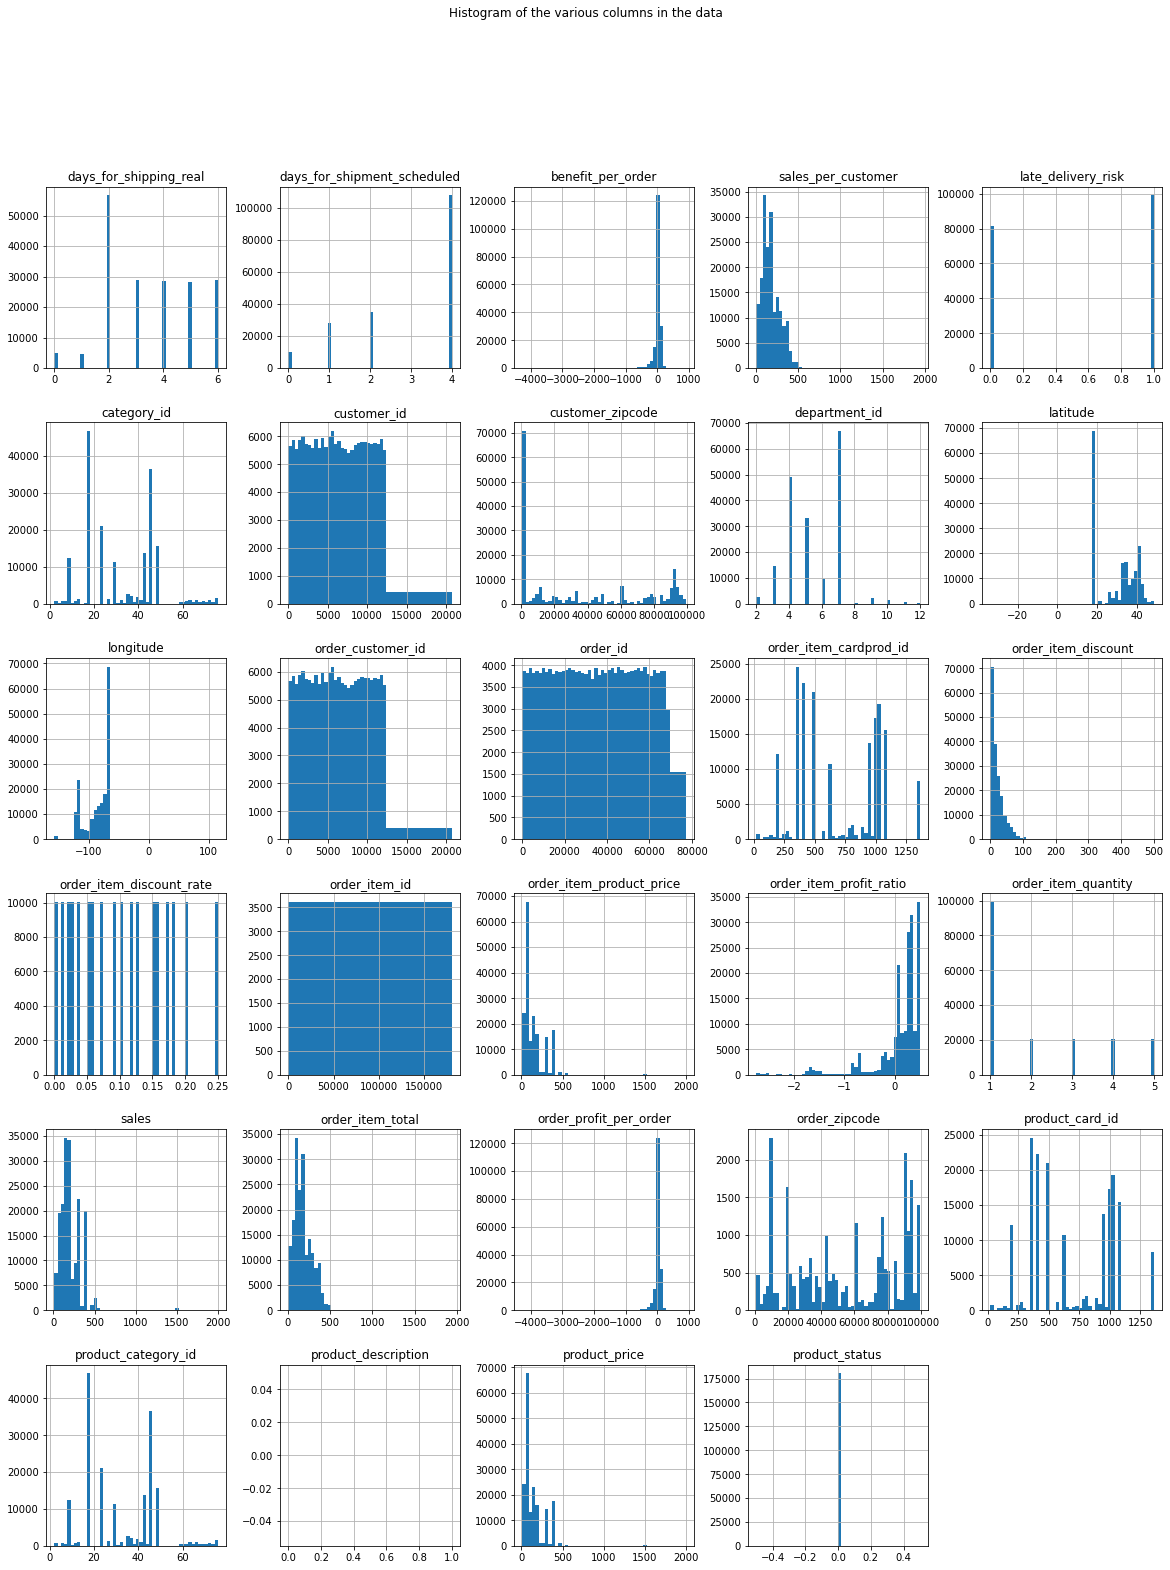

In [21]:
# Plotting histograms of the columns in the data
df.hist(bins=50, figsize=(20,25))
plt.suptitle("Histogram of the various columns in the data")
plt.show()

Text(0.5, 1.0, 'Boxplot of the various columns in the data')

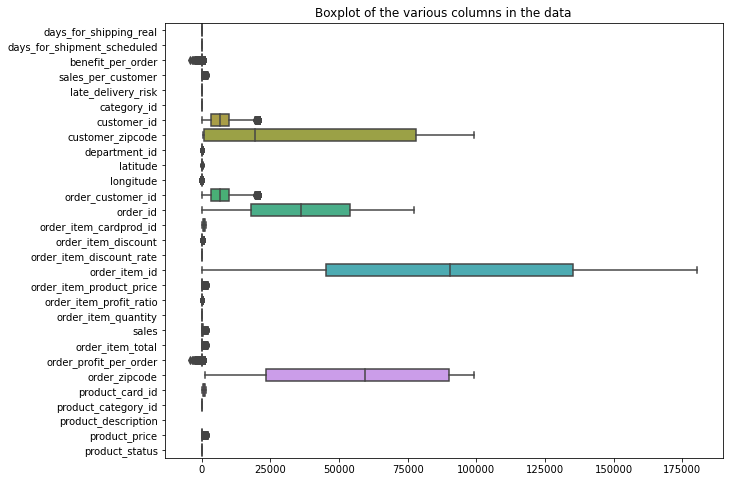

In [22]:
# Plotting box plot for all the columns to check outliers
# Setting the size of the plot
plt.figure(figsize=(10,8))

# Creating boxplot
ax = sns.boxplot(data = df, orient='h')


# Set the title of the plot
ax.set_title("Boxplot of the various columns in the data")    

# # Show the plot
# plt.show()

The data consists of some missing values from "customer_lname", "product_description", "order_zipcode" and, "customer_zipcode" which are not necessary columns and so these were dropped before proceeding with the analysis. Since there is no need for any Personal Identifiable Information (PII), the "customer_fname" column was also dropped. There is no variability in the "customer_email", "customer_password" and "product_status"  columns sincethey each have only 1 unique value. Hence, these columns were dropped too

In [23]:
# Dropping unnecessary columns
df.drop(columns=["customer_fname", "customer_lname", "customer_zipcode", 
                 "order_zipcode", "product_description", 
                 "customer_email", "customer_password", "product_status", 
                 "product_image", "latitude","longitude"],inplace=True)
                

print('df shape:', df.shape)
df.head()

df shape: (180519, 42)


type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  customer_country  customer_id customer_segment customer_state  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

            customer_street  department_id department_name        market  \
0  5365 Noble Nectar Island              2         Fitness  Pacific Asia   
1          2679 Rustic Loop              2         Fitness  Pacific Asia   
2      8510 Round Bear Gate              2         Fitness  Pacific Asia   
3           3200 Amber Bend              2         Fitness  Pacific Asia   
4  8671 Iron Anchor Corners              2         Fitness  Pacific Asia   

   order_city order_country  order_customer_id order_date_dateorders  \
0      Bekasi     Indonesia              20755       1/31/2018 22:56   
1     Bikaner         India              19492       1/13/2018 12:27   
2     Bikaner         India              19491       1/13/2018 12:06   
3  Townsville     Australia              19490       1/13/2018 11:45   
4  Townsville     Australia              19489       1/13/2018 11:24   

   order_id  order_item_cardprod_id  order_item_discount  \
0     77202                    1360            13.110000   
1     75939                    1360            16.389999   
2     75938                    1360            18.030001   
3     75937                    1360            22.940001   
4     75936                    1360            29.500000   

   order_item_discount_rate  order_item_id  order_item_product_price  \
0                      0.04         180517                    327.75   
1                      0.05         179254                    327.75   
2                      0.06         179253                    327.75   
3                      0.07         179252                    327.75   
4                      0.09         179251                    327.75   

   order_item_profit_ratio  order_item_quantity   sales  order_item_total  \
0                     0.29                    1  327.75        314.640015   
1                    -0.80                    1  327.75        311.359985   
2                    -0.80                    1  327.75        309.720001   
3                     0.08                    1  327.75        304.809998   
4                     0.45                    1  327.75        298.250000   

   order_profit_per_order    order_region      order_state     order_status  \
0               91.250000  Southeast Asia  Java Occidental         COMPLETE   
1             -249.089996      South Asia         Rajastán          PENDING   
2             -247.779999    

<Figure size 3600x3600 with 0 Axes>

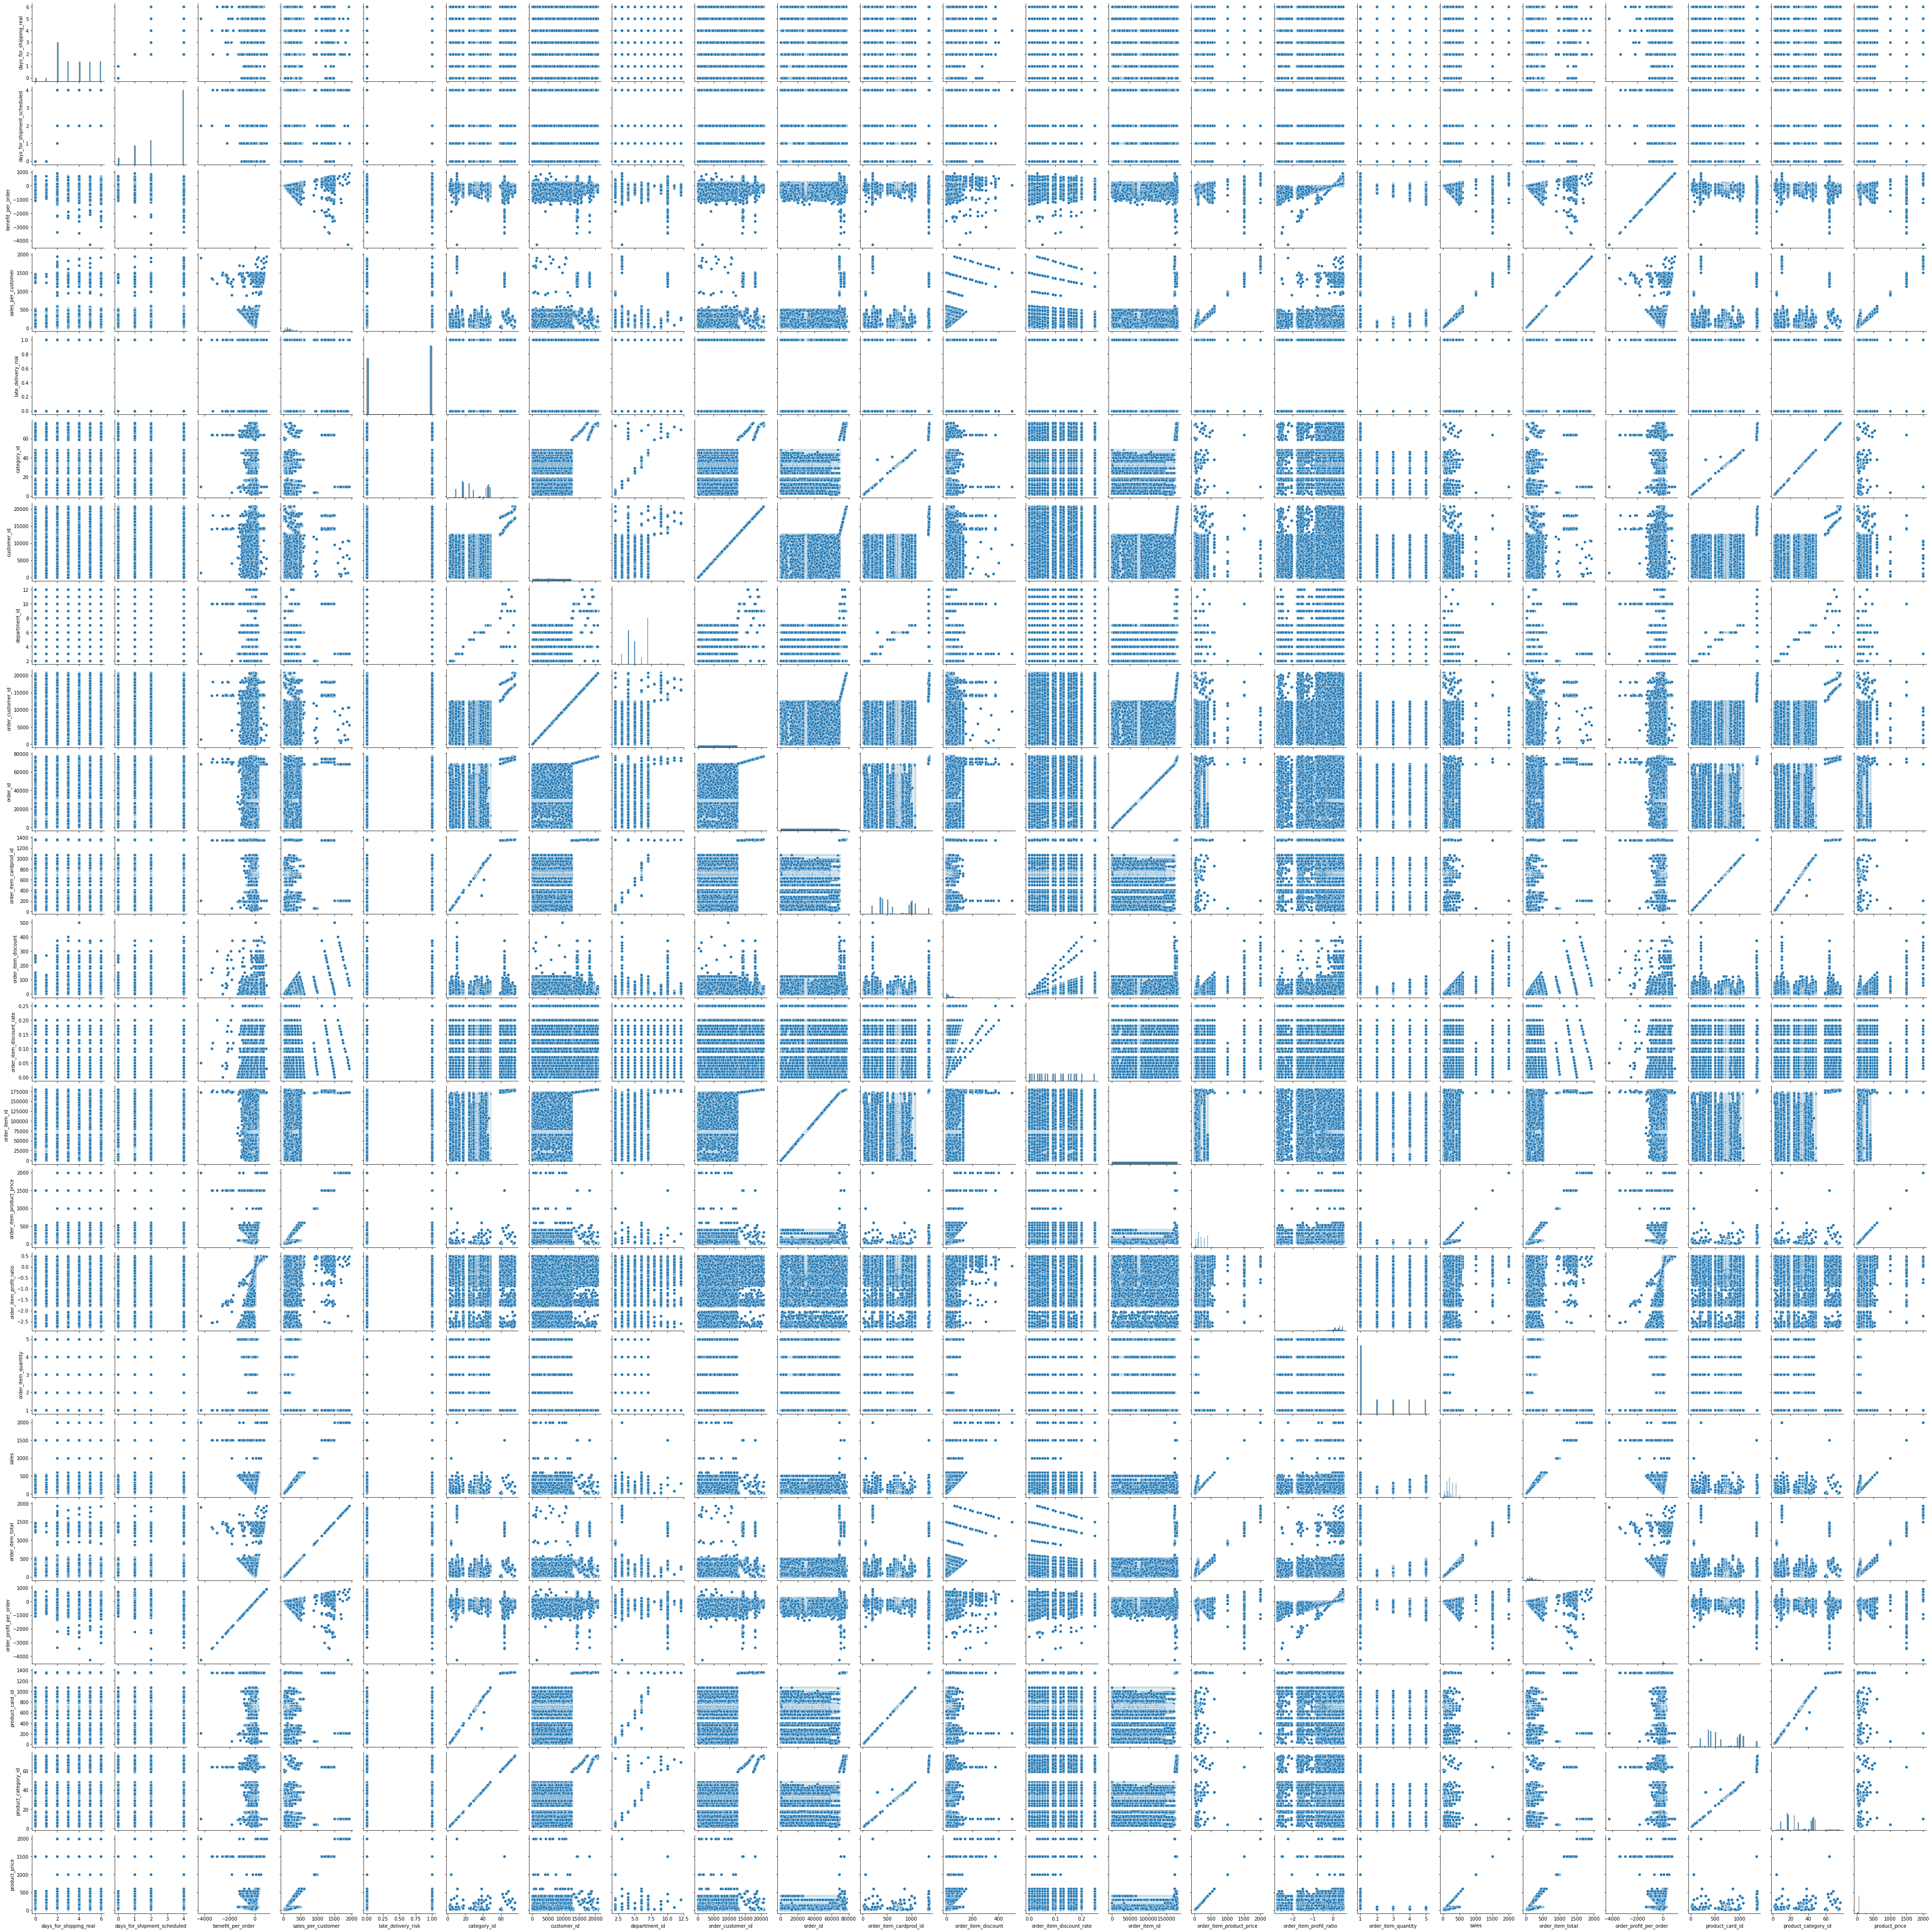

In [24]:
# Identifying the relationship between columns if any
plt.figure(figsize=(50,50))
sns.pairplot(df)

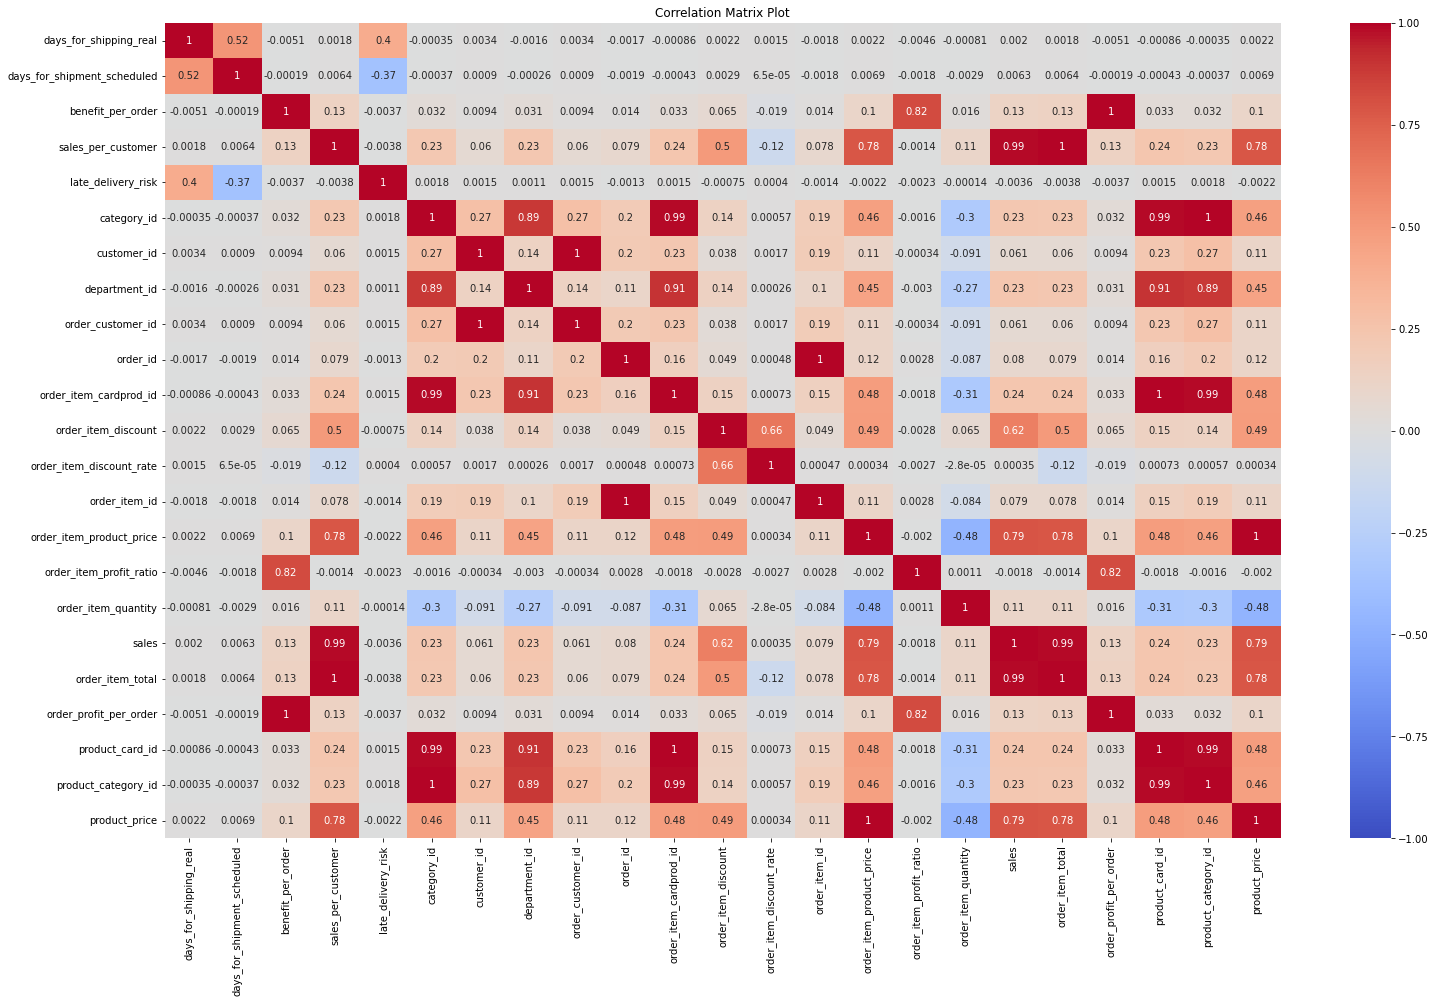

In [25]:
# Searching for relevant features via correlation 
# Using Pearson Correlation
plt.figure(figsize = (25,15))
correlation_matrix = df.corr()
correlation_matrix.style.set_precision(2)
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title("Correlation Matrix Plot")
plt.show()

In [26]:
# Calculating the absolute correlation values to include 
# both positive and negative correlation coefficients.
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

['department_id',
 'order_customer_id',
 'order_item_cardprod_id',
 'order_item_id',
 'order_item_product_price',
 'order_item_profit_ratio',
 'sales',
 'order_item_total',
 'order_profit_per_order',
 'product_card_id',
 'product_category_id',
 'product_price']

In [27]:
# Dropping the highly correlated variables
supply_chain = df.drop(to_drop, axis=1)
print('df shape:', supply_chain.shape)
supply_chain.head()

df shape: (180519, 30)


type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  customer_country  customer_id customer_segment customer_state  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

            customer_street department_name        market  order_city  \
0  5365 Noble Nectar Island         Fitness  Pacific Asia      Bekasi   
1          2679 Rustic Loop         Fitness  Pacific Asia     Bikaner   
2      8510 Round Bear Gate         Fitness  Pacific Asia     Bikaner   
3           3200 Amber Bend         Fitness  Pacific Asia  Townsville   
4  8671 Iron Anchor Corners         Fitness  Pacific Asia  Townsville   

  order_country order_date_dateorders  order_id  order_item_discount  \
0     Indonesia       1/31/2018 22:56     77202            13.110000   
1         India       1/13/2018 12:27     75939            16.389999   
2         India       1/13/2018 12:06     75938            18.030001   
3     Australia       1/13/2018 11:45     75937            22.940001   
4     Australia       1/13/2018 11:24     75936            29.500000   

   order_item_discount_rate  order_item_quantity    order_region  \
0                      0.04                    1  Southeast Asia   
1                      0.05                    1      South Asia   
2                      0.06                    1      South Asia   
3                      0.07                    1         Oceania   
4                      0.09                    1         Oceania   

       order_state     order_status  product_name shipping_date_dateorders  \
0  Java Occidental         COMPLETE  Smart watch            2/3/2018 22:56   
1         Rajastán          PENDING  Smart watch           1/18/2018 12:27   
2         Rajastán           CLOSED  Smart watch           1/17/2018 12:06   
3       Queensland         COMPLETE  Smart watch           1/16/2018 11:45   
4       Queensland  PENDING_PAYMENT  Smart watch           1/15/2018 11:24   

    shipping_mode  
0  Standard Class  
1  Standard Class  
2  Standard Class  
3  Standard Class  
4  Standard Class

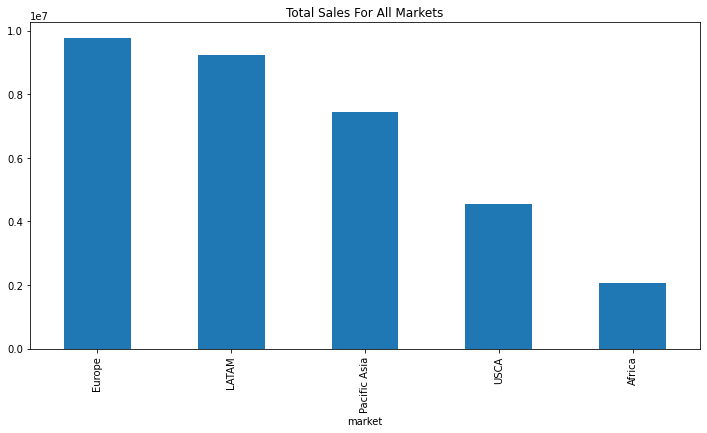

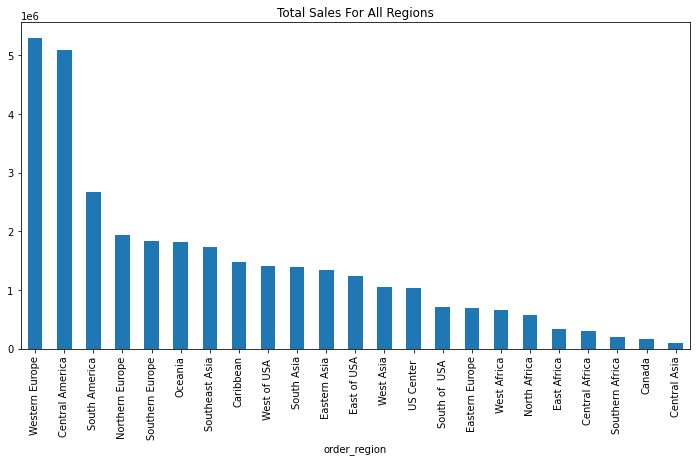

In [28]:
# Grouping by Market
market = supply_chain.groupby('market')

# Grouping by Order region
region = supply_chain.groupby('order_region')

plt.figure(1)
market['sales_per_customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total Sales For All Markets")

plt.figure(2)
region['sales_per_customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total Sales For All Regions")

# Show the plot
plt.show()

<AxesSubplot:title={'center':'Average sales For All Categories'}, xlabel='category_name'>

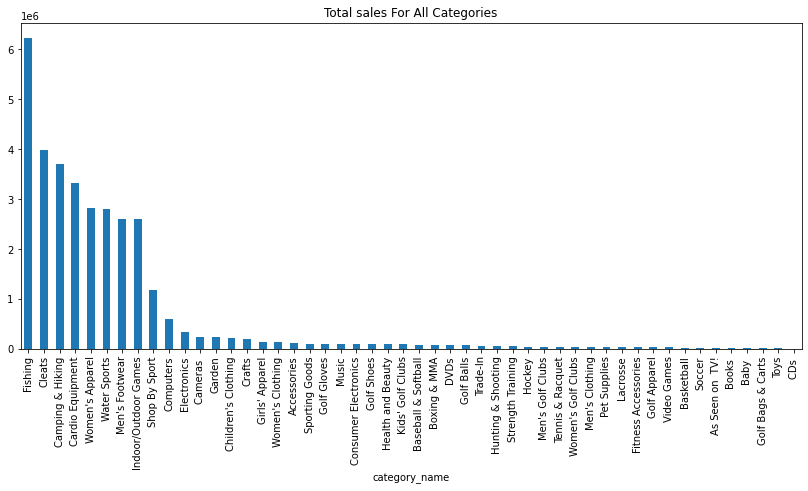

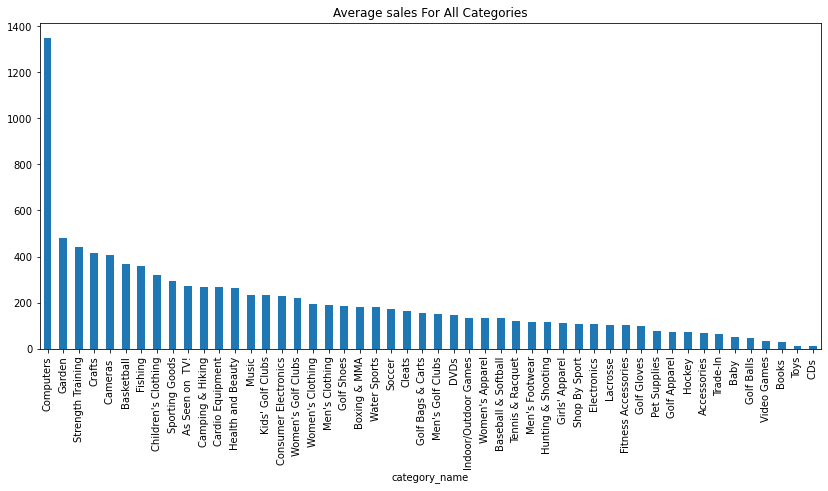

In [29]:
# Grouping all categories
cat = supply_chain.groupby('category_name')
plt.figure(1)
# Total sum of sales for all categories
cat['sales_per_customer'].sum().sort_values(ascending=False).plot.bar(figsize=(14,6), title="Total sales For All Categories")
# Mean sales for all categories
plt.figure(2)
cat['sales_per_customer'].mean().sort_values(ascending=False).plot.bar(figsize=(14,6), title="Average sales For All Categories")

In [30]:
# Grouping the orders by delivery status
# Counting the number of orders for each status
# Sorting the results in descending order
del_status = supply_chain.groupby(['delivery_status'])['order_id'].count().reset_index(name='number_of_orders').sort_values(by='number_of_orders', ascending=False)

del_status

delivery_status  number_of_orders
1      Late delivery             98977
0   Advance shipping             41592
3   Shipping on time             32196
2  Shipping canceled              7754

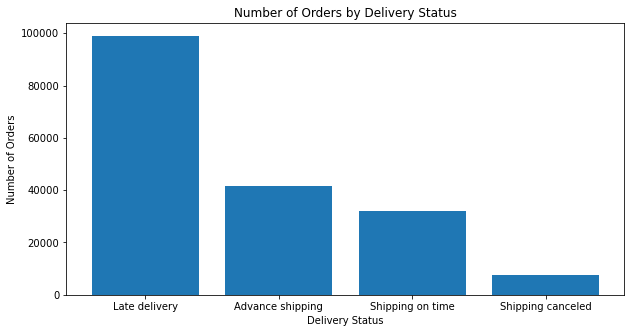

In [31]:
# Creating a bar chart
fig_size = (10, 5) #Define figure size
plt.figure(figsize=fig_size)
plt.bar(del_status['delivery_status'], del_status['number_of_orders'], color='tab:blue')

# Setting axis labels and title
plt.xlabel('Delivery Status')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Delivery Status')

# Displaying the plot
plt.show()

### Performance of the different shipping modes

<AxesSubplot:title={'center':'Count Per Shipping Mode'}, xlabel='shipping_mode'>

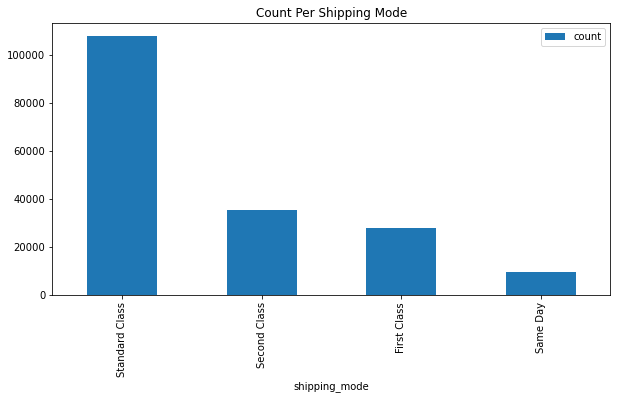

In [32]:
# Grouping by Shipping Mode
shipping = supply_chain.groupby('shipping_mode')

plt.figure
shipping.agg(count = ('shipping_mode', 'count')).sort_values(by='count', ascending=False).plot.bar(figsize=(10,5), title="Count Per Shipping Mode")

## 4. Feature Engineering

In [33]:
# Converting categorical features that represent date and time to datetime datatype
supply_chain["shipping_date"] = pd.to_datetime(supply_chain["shipping_date_dateorders"])
supply_chain["order_date"] = pd.to_datetime(supply_chain["order_date_dateorders"])

print('df shape:', supply_chain.shape)
supply_chain.head()

df shape: (180519, 32)


type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  customer_country  customer_id customer_segment customer_state  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

            customer_street department_name        market  order_city  \
0  5365 Noble Nectar Island         Fitness  Pacific Asia      Bekasi   
1          2679 Rustic Loop         Fitness  Pacific Asia     Bikaner   
2      8510 Round Bear Gate         Fitness  Pacific Asia     Bikaner   
3           3200 Amber Bend         Fitness  Pacific Asia  Townsville   
4  8671 Iron Anchor Corners         Fitness  Pacific Asia  Townsville   

  order_country order_date_dateorders  order_id  order_item_discount  \
0     Indonesia       1/31/2018 22:56     77202            13.110000   
1         India       1/13/2018 12:27     75939            16.389999   
2         India       1/13/2018 12:06     75938            18.030001   
3     Australia       1/13/2018 11:45     75937            22.940001   
4     Australia       1/13/2018 11:24     75936            29.500000   

   order_item_discount_rate  order_item_quantity    order_region  \
0                      0.04                    1  Southeast Asia   
1                      0.05                    1      South Asia   
2                      0.06                    1      South Asia   
3                      0.07                    1         Oceania   
4                      0.09                    1         Oceania   

       order_state     order_status  product_name shipping_date_dateorders  \
0  Java Occidental         COMPLETE  Smart watch            2/3/2018 22:56   
1         Rajastán          PENDING  Smart watch           1/18/2018 12:27   
2         Rajastán           CLOSED  Smart watch           1/17/2018 12:06   
3       Queensland         COMPLETE  Smart watch           1/16/2018 11:45   
4       Queensland  PENDING_PAYMENT  Smart watch           1/15/2018 11:24   

    shipping_mode       shipping_date          order_date  
0  Standard Class 2018-02-03 22:56:00 2018-01-31 22:56:00  
1  Standard Class 2018-01-18 12:27:00 2018-01-13 12:27:00  
2  Standard Class 2018-01-17 12:06:00 2018-01-13 12:06:00  
3  Standard Class 2018-01-16 11:45:00 2018-01-13 11:45:00  
4  Standard Class 2018-01-15 11:24:00 2018-01-13 11:24:00

In [34]:
# Dropping the previous dates before conversion
supply_chain = supply_chain.drop(columns=['shipping_date_dateorders', 'order_date_dateorders'])

print('df shape:', supply_chain.shape)
supply_chain.head()

df shape: (180519, 30)


type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  customer_country  customer_id customer_segment customer_state  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

            customer_street department_name        market  order_city  \
0  5365 Noble Nectar Island         Fitness  Pacific Asia      Bekasi   
1          2679 Rustic Loop         Fitness  Pacific Asia     Bikaner   
2      8510 Round Bear Gate         Fitness  Pacific Asia     Bikaner   
3           3200 Amber Bend         Fitness  Pacific Asia  Townsville   
4  8671 Iron Anchor Corners         Fitness  Pacific Asia  Townsville   

  order_country  order_id  order_item_discount  order_item_discount_rate  \
0     Indonesia     77202            13.110000                      0.04   
1         India     75939            16.389999                      0.05   
2         India     75938            18.030001                      0.06   
3     Australia     75937            22.940001                      0.07   
4     Australia     75936            29.500000                      0.09   

   order_item_quantity    order_region      order_state     order_status  \
0                    1  Southeast Asia  Java Occidental         COMPLETE   
1                    1      South Asia         Rajastán          PENDING   
2                    1      South Asia         Rajastán           CLOSED   
3                    1         Oceania       Queensland         COMPLETE   
4                    1         Oceania       Queensland  PENDING_PAYMENT   

   product_name   shipping_mode       shipping_date          order_date  
0  Smart watch   Standard Class 2018-02-03 22:56:00 2018-01-31 22:56:00  
1  Smart watch   Standard Class 2018-01-18 12:27:00 2018-01-13 12:27:00  
2  Smart watch   Standard Class 2018-01-17 12:06:00 2018-01-13 12:06:00  
3  Smart watch   Standard Class 2018-01-16 11:45:00 2018-01-13 11:45:00  
4  Smart watch   Standard Class 2018-01-15 11:24:00 2018-01-13 11:24:00

In [35]:
# Handling the time and date variables
supply_chain["shipping_year"] = supply_chain["shipping_date"].dt.year
supply_chain['shipping_month'] = supply_chain['shipping_date'].dt.month
supply_chain["shipping_day"] = supply_chain["shipping_date"].dt.day_name()
supply_chain["shipping_hour"] = supply_chain["shipping_date"].dt.hour

supply_chain['order_year'] = supply_chain['order_date'].dt.year
supply_chain['order_month'] = supply_chain['order_date'].dt.month
supply_chain['order_week_day'] = supply_chain['order_date'].dt.weekday
supply_chain['order_day'] = supply_chain['order_date'].dt.day_name()
supply_chain["order_hour"] = supply_chain['order_date'].dt.hour
supply_chain['order_month_year'] = supply_chain['order_date'].dt.to_period('M')

print('df shape:', supply_chain.shape)
supply_chain.head()

df shape: (180519, 40)


type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  customer_country  customer_id customer_segment customer_state  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

            customer_street department_name        market  order_city  \
0  5365 Noble Nectar Island         Fitness  Pacific Asia      Bekasi   
1          2679 Rustic Loop         Fitness  Pacific Asia     Bikaner   
2      8510 Round Bear Gate         Fitness  Pacific Asia     Bikaner   
3           3200 Amber Bend         Fitness  Pacific Asia  Townsville   
4  8671 Iron Anchor Corners         Fitness  Pacific Asia  Townsville   

  order_country  order_id  order_item_discount  order_item_discount_rate  \
0     Indonesia     77202            13.110000                      0.04   
1         India     75939            16.389999                      0.05   
2         India     75938            18.030001                      0.06   
3     Australia     75937            22.940001                      0.07   
4     Australia     75936            29.500000                      0.09   

   order_item_quantity    order_region      order_state     order_status  \
0                    1  Southeast Asia  Java Occidental         COMPLETE   
1                    1      South Asia         Rajastán          PENDING   
2                    1      South Asia         Rajastán           CLOSED   
3                    1         Oceania       Queensland         COMPLETE   
4                    1         Oceania       Queensland  PENDING_PAYMENT   

   product_name   shipping_mode       shipping_date          order_date  \
0  Smart watch   Standard Class 2018-02-03 22:56:00 2018-01-31 22:56:00   
1  Smart watch   Standard Class 2018-01-18 12:27:00 2018-01-13 12:27:00   
2  Smart watch   Standard Class 2018-01-17 12:06:00 2018-01-13 12:06:00   
3  Smart watch   Standard Class 2018-01-16 11:45:00 2018-01-13 11:45:00   
4  Smart watch   Standard Class 2018-01-15 11:24:00 2018-01-13 11:24:00   

   shipping_year  shipping_month shipping_day  shipping_hour  order_year  \
0           2018               2     Saturday             22        2018   
1           2018               1     Thursday             12        2018   
2           2018               1    Wednesday             12        2018   
3           2018               1      Tuesday             11        2018   
4           2018               1       Monday             11        2018   

   order_month  order_week_day  order_day  order_hour order_month_year  
0            1               2  Wednesday          22          2018-01  
1     

In [36]:
# Dropping the initial date columns before conversion to datetime
supply_chain.drop(columns=["shipping_date", "order_date"], inplace=True)

print('df shape:', supply_chain.shape)
supply_chain.head()

df shape: (180519, 38)


type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  customer_country  customer_id customer_segment customer_state  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

            customer_street department_name        market  order_city  \
0  5365 Noble Nectar Island         Fitness  Pacific Asia      Bekasi   
1          2679 Rustic Loop         Fitness  Pacific Asia     Bikaner   
2      8510 Round Bear Gate         Fitness  Pacific Asia     Bikaner   
3           3200 Amber Bend         Fitness  Pacific Asia  Townsville   
4  8671 Iron Anchor Corners         Fitness  Pacific Asia  Townsville   

  order_country  order_id  order_item_discount  order_item_discount_rate  \
0     Indonesia     77202            13.110000                      0.04   
1         India     75939            16.389999                      0.05   
2         India     75938            18.030001                      0.06   
3     Australia     75937            22.940001                      0.07   
4     Australia     75936            29.500000                      0.09   

   order_item_quantity    order_region      order_state     order_status  \
0                    1  Southeast Asia  Java Occidental         COMPLETE   
1                    1      South Asia         Rajastán          PENDING   
2                    1      South Asia         Rajastán           CLOSED   
3                    1         Oceania       Queensland         COMPLETE   
4                    1         Oceania       Queensland  PENDING_PAYMENT   

   product_name   shipping_mode  shipping_year  shipping_month shipping_day  \
0  Smart watch   Standard Class           2018               2     Saturday   
1  Smart watch   Standard Class           2018               1     Thursday   
2  Smart watch   Standard Class           2018               1    Wednesday   
3  Smart watch   Standard Class           2018               1      Tuesday   
4  Smart watch   Standard Class           2018               1       Monday   

   shipping_hour  order_year  order_month  order_week_day  order_day  \
0             22        2018            1               2  Wednesday   
1             12        2018            1               5   Saturday   
2             12        2018            1               5   Saturday   
3             11        2018            1               5   Saturday   
4             11        2018            1               5   Saturday   

   order_hour order_month_year  
0          22          2018-01  
1          12          2018-01  
2          12          2018-01  
3          11       

In [37]:
# Counting the number of features in each data type
data_types(supply_chain)

1) Count of Numerical Features : 19
2) Count of Categorical Features : 19


In [38]:
# Returning a list of all the column names
list(supply_chain)

['type',
 'days_for_shipping_real',
 'days_for_shipment_scheduled',
 'benefit_per_order',
 'sales_per_customer',
 'delivery_status',
 'late_delivery_risk',
 'category_id',
 'category_name',
 'customer_city',
 'customer_country',
 'customer_id',
 'customer_segment',
 'customer_state',
 'customer_street',
 'department_name',
 'market',
 'order_city',
 'order_country',
 'order_id',
 'order_item_discount',
 'order_item_discount_rate',
 'order_item_quantity',
 'order_region',
 'order_state',
 'order_status',
 'product_name',
 'shipping_mode',
 'shipping_year',
 'shipping_month',
 'shipping_day',
 'shipping_hour',
 'order_year',
 'order_month',
 'order_week_day',
 'order_day',
 'order_hour',
 'order_month_year']

### Order Delivery

In [39]:
# Returning the unique values in the delivery_status column
supply_chain["delivery_status"].unique()

array(['Advance shipping', 'Late delivery', 'Shipping on time',
       'Shipping canceled'], dtype=object)

In [40]:
# Returning the number of unique values in the delivery_status column
supply_chain["delivery_status"].nunique()

4

In [41]:
# Returning the count of each of the unique values in the delivery_status column
supply_chain["delivery_status"].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: delivery_status, dtype: int64

#### Late Delivery

Delivering products to customer on time without late delivery is another important aspect for a supply chain company because customers will not be satisfied if products are not delivered on time. What category of products are being delivered late the most?


<AxesSubplot:title={'center':'Top 10 Product Categories With Most Late Deliveries'}>

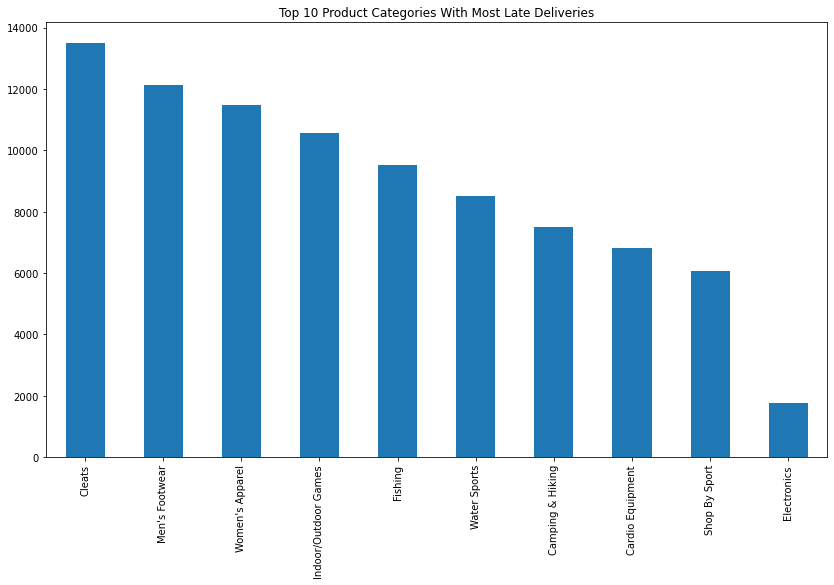

In [42]:
#Filtering columns with late delivery status
late_delivery = supply_chain[(supply_chain['delivery_status'] == 'Late delivery')]

#Top 10 productcategories with most late deliveries
late_delivery['category_name'].value_counts().nlargest(10).plot.bar(figsize=(14,8), title="Top 10 Product Categories With Most Late Deliveries")

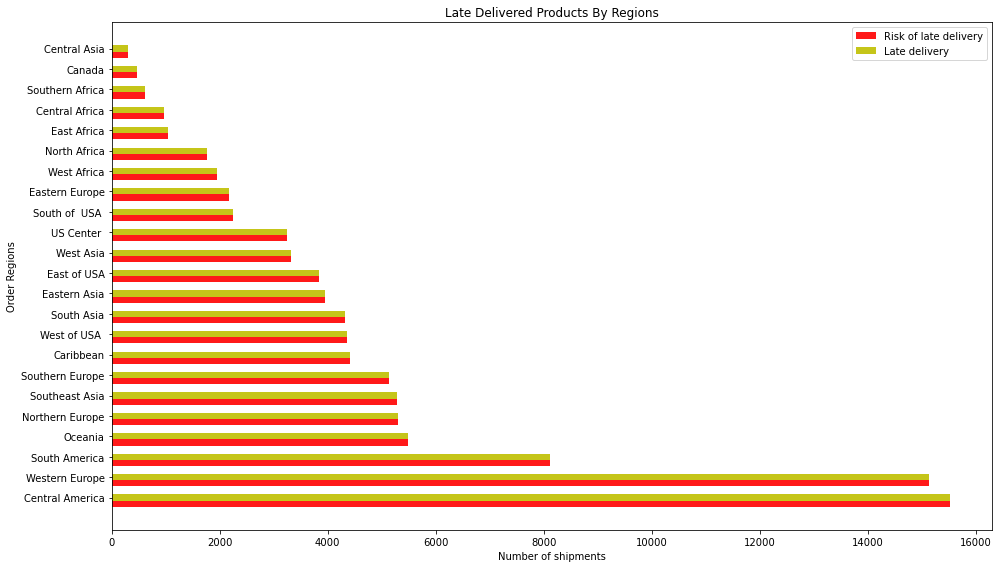

In [43]:
#Filtering orders with late delivery risk
ldr = supply_chain[(supply_chain['late_delivery_risk'] == 1)]

#Filtering late delivered orders
ds = supply_chain[(supply_chain['delivery_status'] == 'Late delivery')]

count1 = ldr['order_region'].value_counts()
count2 = ds['order_region'].value_counts()

#Index names
names=supply_chain['order_region'].value_counts().keys()
n_groups=23

fig,ax = plt.subplots(figsize=(14,8)) #Figure size, adjust height and width
index=np.arange(n_groups)
bar_width=0.3
opacity=0.9
type1=plt.barh(index,count1,bar_width,alpha=opacity,color='r',label='Risk of late delivery')
type2=plt.barh(index+bar_width,count2,bar_width,alpha=opacity,color='y',label='Late delivery')
plt.ylabel('Order Regions')
plt.xlabel('Number of shipments')
plt.title('Late Delivered Products By Regions')
plt.legend()
plt.yticks(index+bar_width,names)
plt.tight_layout()
plt.show()


Thus,it can be concluded that for all the products with late delivery risk irrespective of region the product is actually being delivered late,to avoid late delivery the company can ship products faster using better shipping method or schedule more time of Days for shipment so customers will know in advance when the products will reach them.

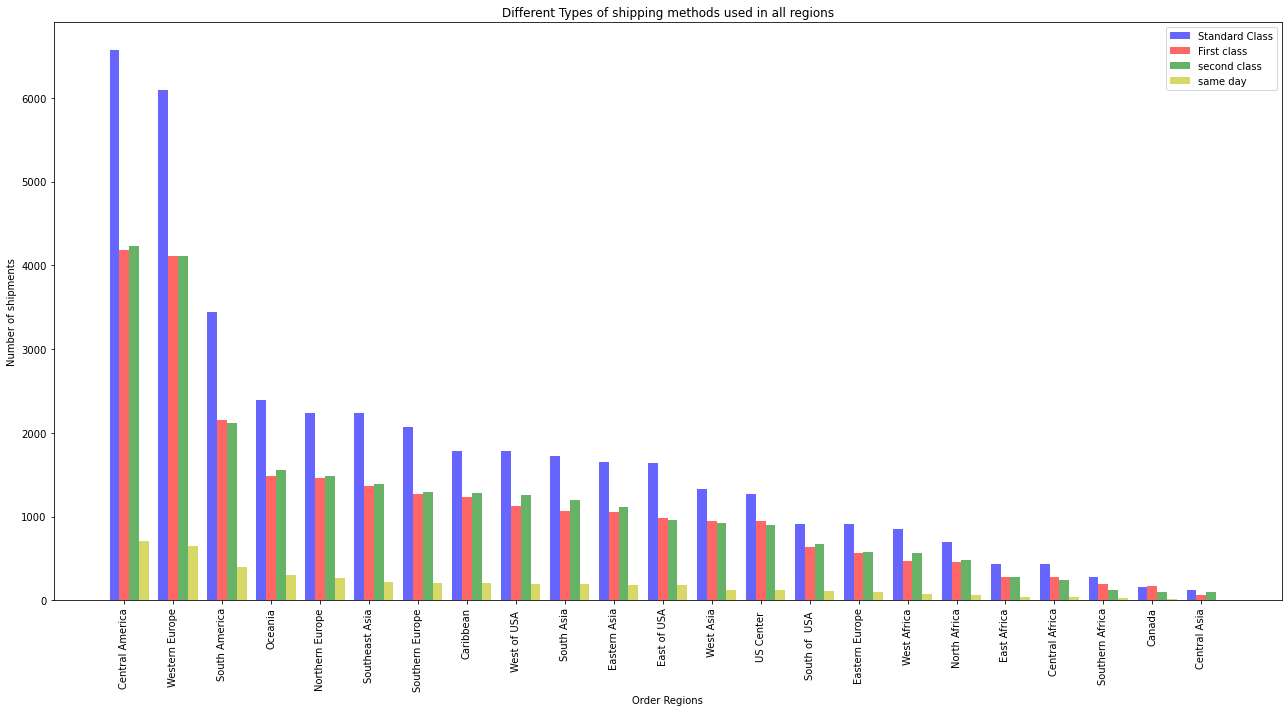

In [44]:
# Filtering late delivery orders with standard class shipping
ld1 = supply_chain[(supply_chain['delivery_status'] == 'Late delivery') & (supply_chain['shipping_mode'] == 'Standard Class')]
#Filtering late delivery orders with first class shipping
ld2 = supply_chain[(supply_chain['delivery_status'] == 'Late delivery') & (supply_chain['shipping_mode'] == 'First Class')]
#Filtering late delivery orders with second class shipping
ld3 = supply_chain[(supply_chain['delivery_status'] == 'Late delivery') & (supply_chain['shipping_mode'] == 'Second Class')]
#Filtering late delivery orders with same day shipping
ld4 = supply_chain[(supply_chain['delivery_status'] == 'Late delivery') & (supply_chain['shipping_mode'] == 'Same Day')]

# Counting total values
count1 = ld1['order_region'].value_counts()
count2 = ld2['order_region'].value_counts()
count3 = ld3['order_region'].value_counts()
count4 = ld4['order_region'].value_counts()

# Index names
names = supply_chain['order_region'].value_counts().keys()
n_groups = 23
fig,ax = plt.subplots(figsize=(18,10))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.6
plot1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Standard Class')
plot2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='First class')
plot3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='second class')
plot4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='same day')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Different Types of shipping methods used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()

As expected the most number of late deliveries for all regions occured with standard class shipping,with same day shipping being the one with least number of late deliveries.Both the first class and second class shipping have almost equal number of late deliveries.

In [45]:
# Checking the target variable to see if the data is balanced
supply_chain['late_delivery_risk'].value_counts()

1    98977
0    81542
Name: late_delivery_risk, dtype: int64

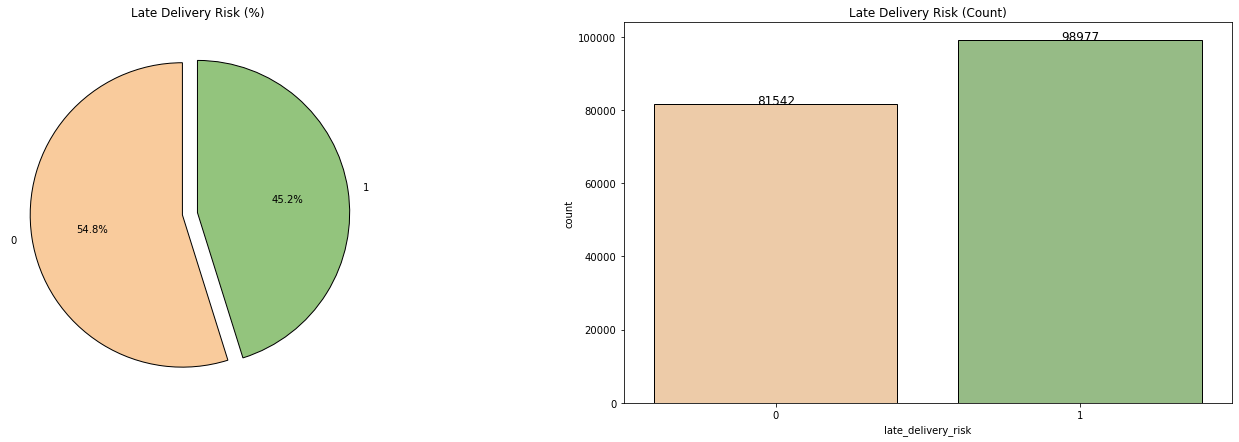

In [46]:
# Plotting the split of the target variable
# In pie chart and bar chart

colors = ['#f9cb9c', '#93c47d']
l = list(supply_chain['late_delivery_risk'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (24,7))
plt.subplot(1,2,1)
plt.pie(circle,labels = list(supply_chain['late_delivery_risk'][j] for j in sorted(supply_chain['late_delivery_risk'].unique())),autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Late Delivery Risk (%)');

plt.subplot(1,2,2)
ax = sns.countplot('late_delivery_risk',data = supply_chain, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 12)
ax.set_xticklabels(supply_chain['late_delivery_risk'][j] for j in sorted(supply_chain['late_delivery_risk'].unique()))
plt.title('Late Delivery Risk (Count)');
plt.show()

The target variable is split between 54.8% and 45.2%. Hence, it can be considered balanced, as the difference between the two classes is not very large or highly skewed.

### Fraud Detection

Finding which payment method is used to conduct frauds can be useful to prevent fraud from happening in future

In [47]:
# Checking type of payment used to conduct fraud other than Transfer
pay_type = supply_chain[(supply_chain['type'] != 'TRANSFER')&(supply_chain['order_status'] == 'SUSPECTED_FRAUD')]
pay_type['customer_city'].value_counts()

Series([], Name: customer_city, dtype: int64)

The pandas series is empty.This clearly shows that there were no frauds conducted with DEBIT,CASH,PAYMENT methods so all the suspected fraud orders are made via transfer

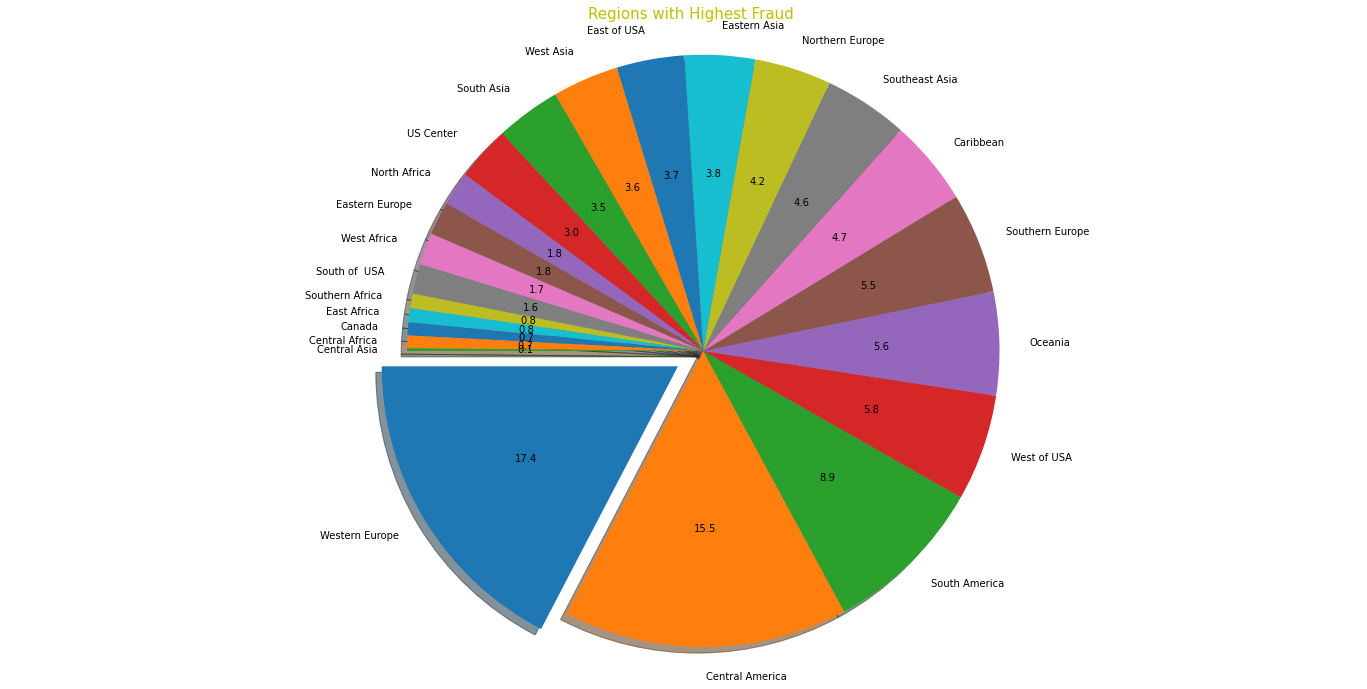

In [48]:
# Separating orders with suspected fraud
high_fraud = supply_chain[(supply_chain['order_status'] == 'SUSPECTED_FRAUD') & (supply_chain['type'] == 'TRANSFER')]

# Plotting pie chart with respect to order region
fraud = high_fraud['order_region'].value_counts().plot.pie(figsize=(24,12),
                                                           startangle=180, 
                                                           explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
                                                           autopct='%.1f',shadow=True,)
plt.title("Regions with Highest Fraud",size=15,color='y') # Plotting title
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

It can be observed that highest number of suspected fraud orders are from Western Europe with approximately 17.4% of total suspected fraudulent orders

In [49]:
# Returning the unique values in the order_country column
supply_chain['order_country'].unique()

array(['Indonesia', 'India', 'Australia', 'China', 'Japón',
       'Corea del Sur', 'Singapur', 'Turquía', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'República Democrática del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Países Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panamá',
       'República Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'México', 'Uruguay', 'Argentina', 'Cuba', 'Perú',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudán', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'España', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Níger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Bangladés', 'Tailandia', 'Irak', 'Arabia Saudí',
       'Filipinas', 'Kazajistán', 'Irán', 'Myanmar (Birmania)',
       'Uzbekistán', 'Benín', 'Camerún', 'Kenia', 'Togo', 'Ucrania',
       'Polonia', 'Portugal', 'Rumania', 'Trinidad y Tobago',


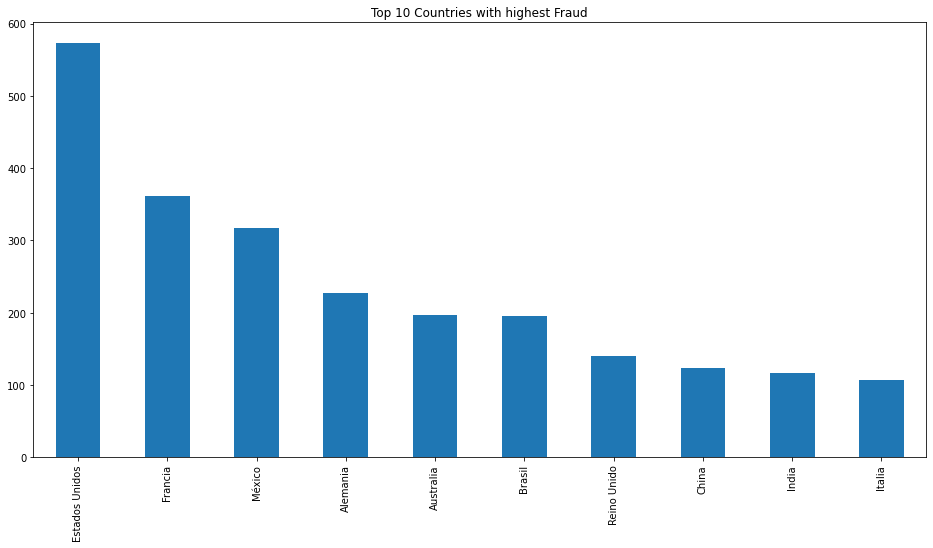

In [50]:
# Country which has the most suspected fraud
most_fraud=supply_chain[supply_chain['order_status']=='SUSPECTED_FRAUD']
most_fraud=most_fraud['order_country'].value_counts().nlargest(10).plot.bar(figsize=(16,8), title="Top 10 Countries with highest Fraud")

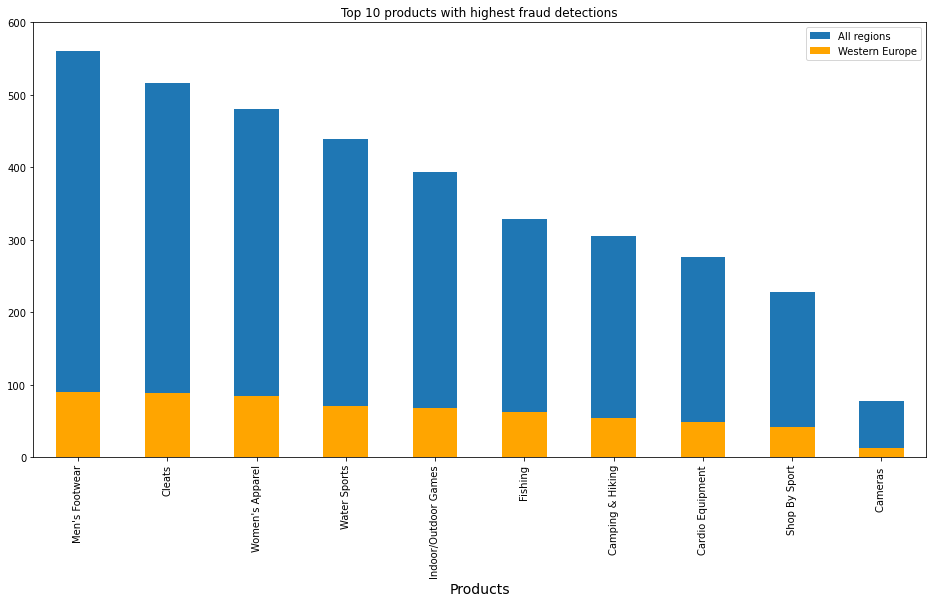

In [51]:
# Top 10 most suspected fraud categories
# In all regions and in Western Europe
high_fraud1 = supply_chain[(supply_chain['order_status'] == 'SUSPECTED_FRAUD')] # 
high_fraud2 = supply_chain[(supply_chain['order_status'] == 'SUSPECTED_FRAUD') & (supply_chain['order_region'] == 'Western Europe')]

#Plotting bar chart for top 10 most suspected fraud categories in all regions
fraud1=high_fraud1['category_name'].value_counts().nlargest(10).plot.bar(figsize=(16,8), title="Fraud Category",color='tab:blue')

#Plotting bar chart for top 10 most suspected fraud categories in Western Europe
fraud2=high_fraud2['category_name'].value_counts().nlargest(10).plot.bar(figsize=(16,8), title="Fraud product in Western Europe",color='orange')

plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=12)
plt.xlabel("Products", size=14)
plt.ylim(0,600)
plt.show()

In [52]:
# Adding a target column for fraud detection
supply_chain['fraud'] = np.where(supply_chain['order_status'] == 'SUSPECTED_FRAUD', 1, 0)
print('df shape:', supply_chain.shape)
supply_chain.head()

df shape: (180519, 39)


type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  customer_country  customer_id customer_segment customer_state  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

            customer_street department_name        market  order_city  \
0  5365 Noble Nectar Island         Fitness  Pacific Asia      Bekasi   
1          2679 Rustic Loop         Fitness  Pacific Asia     Bikaner   
2      8510 Round Bear Gate         Fitness  Pacific Asia     Bikaner   
3           3200 Amber Bend         Fitness  Pacific Asia  Townsville   
4  8671 Iron Anchor Corners         Fitness  Pacific Asia  Townsville   

  order_country  order_id  order_item_discount  order_item_discount_rate  \
0     Indonesia     77202            13.110000                      0.04   
1         India     75939            16.389999                      0.05   
2         India     75938            18.030001                      0.06   
3     Australia     75937            22.940001                      0.07   
4     Australia     75936            29.500000                      0.09   

   order_item_quantity    order_region      order_state     order_status  \
0                    1  Southeast Asia  Java Occidental         COMPLETE   
1                    1      South Asia         Rajastán          PENDING   
2                    1      South Asia         Rajastán           CLOSED   
3                    1         Oceania       Queensland         COMPLETE   
4                    1         Oceania       Queensland  PENDING_PAYMENT   

   product_name   shipping_mode  shipping_year  shipping_month shipping_day  \
0  Smart watch   Standard Class           2018               2     Saturday   
1  Smart watch   Standard Class           2018               1     Thursday   
2  Smart watch   Standard Class           2018               1    Wednesday   
3  Smart watch   Standard Class           2018               1      Tuesday   
4  Smart watch   Standard Class           2018               1       Monday   

   shipping_hour  order_year  order_month  order_week_day  order_day  \
0             22        2018            1               2  Wednesday   
1             12        2018            1               5   Saturday   
2             12        2018            1               5   Saturday   
3             11        2018            1               5   Saturday   
4             11        2018            1               5   Saturday   

   order_hour order_month_year  fraud  
0          22          2018-01      0  
1          12          2018-01      0  
2          12          2018-01  

In [53]:
# Checking the number of unique values in the newly added column
supply_chain['fraud'].nunique()

2

In [54]:
# Count of the unique values in the new target column
# To see if the data is balanced
supply_chain['fraud'].value_counts()

0    176457
1      4062
Name: fraud, dtype: int64

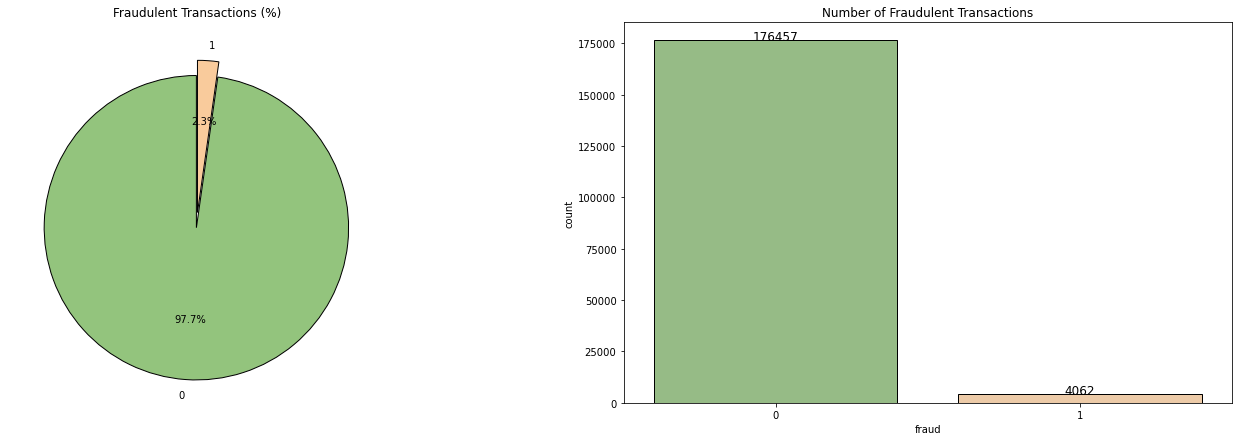

In [55]:
# Plotting the split of the target variable
# In pie chart and bar chart

colors = ['#93c47d', '#f9cb9c']

f = list(supply_chain['fraud'].value_counts())
circle = [f[0] / sum(f) * 100,f[1] / sum(f) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (24,7))

plt.subplot(1,2,1)
plt.pie(circle,labels = list(supply_chain['fraud'].unique()),autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Fraudulent Transactions (%)');

plt.subplot(1,2,2)

ax = sns.countplot('fraud',data = supply_chain, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 12)
plt.title('Number of Fraudulent Transactions');
plt.show()

This is highly imbalanced with only 2.3% of the target variable reflecting the fraudulent orders while the remaining 97.7% represents the non-fraudlent orders. Hence, the data will be balanced to see its impact on the modelling.

Balancing data should gives us the same amount of information to help predict each class and therefore gives a better idea of how to respond to test data.

### Sales

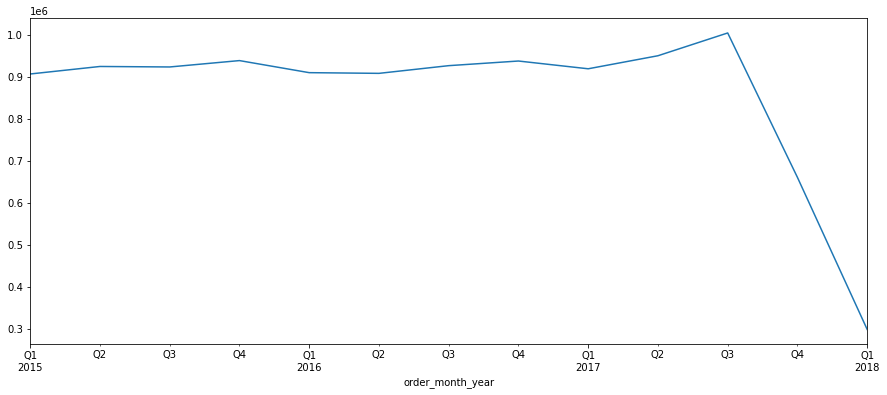

In [56]:
# Grouping the DataFrame by the 'order_month_year' column 
quarter= supply_chain.groupby('order_month_year')

# Calculating the sum of 'sales_per_customer' for each group
# and visualizing the trend of quarterly sales over time
quarterly_sales= quarter['sales_per_customer'].sum().resample('Q').mean().plot(figsize=(15,6))

By seeing above graph it can be seen that sales are consistent from Q1 2015 until Q3 of 2017 and suddenly dipped by Q1 2018.

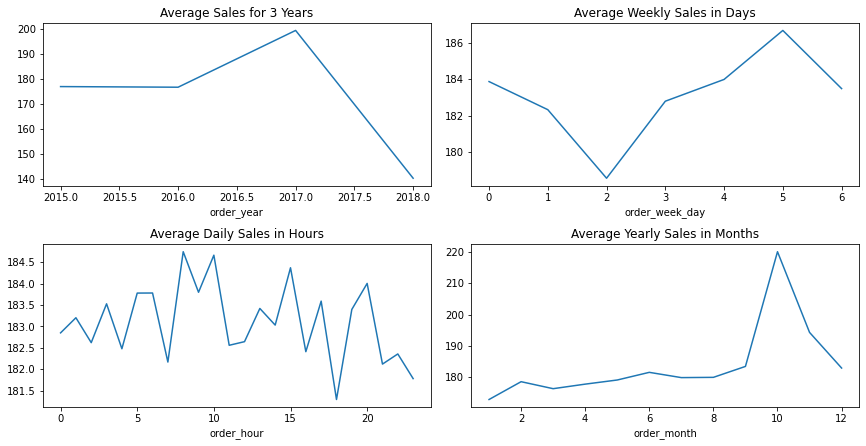

In [57]:
# Creating a figure with 4 rows and 2 columns of subplots
# Each showing a different visualization of the 'sales_per_customer' column 

plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1) # Average sales over a 3 year period
quarter = supply_chain.groupby('order_year')
quarter['sales_per_customer'].mean().plot(figsize=(12,12),title='Average Sales for 3 Years')

plt.subplot(4, 2, 2) # Average sales by day of week
days = supply_chain.groupby("order_week_day")
days['sales_per_customer'].mean().plot(figsize=(12,12),title='Average Weekly Sales in Days')

plt.subplot(4, 2, 3) # Average sales by hour of day
hours = supply_chain.groupby("order_hour")
hours['sales_per_customer'].mean().plot(figsize=(12,12),title='Average Daily Sales in Hours')

plt.subplot(4, 2, 4) # Average sales by month
month=supply_chain.groupby("order_month")
month['sales_per_customer'].mean().plot(figsize=(12,12),title='Average Yearly Sales in Months')
plt.tight_layout()

plt.show()

In [58]:
# Dropping the order_month_year column
# Needed it only for data visualization
supply_chain.drop(['order_month_year'],axis = 1, inplace = True)
supply_chain.head()

type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  customer_country  customer_id customer_segment customer_state  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

            customer_street department_name        market  order_city  \
0  5365 Noble Nectar Island         Fitness  Pacific Asia      Bekasi   
1          2679 Rustic Loop         Fitness  Pacific Asia     Bikaner   
2      8510 Round Bear Gate         Fitness  Pacific Asia     Bikaner   
3           3200 Amber Bend         Fitness  Pacific Asia  Townsville   
4  8671 Iron Anchor Corners         Fitness  Pacific Asia  Townsville   

  order_country  order_id  order_item_discount  order_item_discount_rate  \
0     Indonesia     77202            13.110000                      0.04   
1         India     75939            16.389999                      0.05   
2         India     75938            18.030001                      0.06   
3     Australia     75937            22.940001                      0.07   
4     Australia     75936            29.500000                      0.09   

   order_item_quantity    order_region      order_state     order_status  \
0                    1  Southeast Asia  Java Occidental         COMPLETE   
1                    1      South Asia         Rajastán          PENDING   
2                    1      South Asia         Rajastán           CLOSED   
3                    1         Oceania       Queensland         COMPLETE   
4                    1         Oceania       Queensland  PENDING_PAYMENT   

   product_name   shipping_mode  shipping_year  shipping_month shipping_day  \
0  Smart watch   Standard Class           2018               2     Saturday   
1  Smart watch   Standard Class           2018               1     Thursday   
2  Smart watch   Standard Class           2018               1    Wednesday   
3  Smart watch   Standard Class           2018               1      Tuesday   
4  Smart watch   Standard Class           2018               1       Monday   

   shipping_hour  order_year  order_month  order_week_day  order_day  \
0             22        2018            1               2  Wednesday   
1             12        2018            1               5   Saturday   
2             12        2018            1               5   Saturday   
3             11        2018            1               5   Saturday   
4             11        2018            1               5   Saturday   

   order_hour  fraud  
0          22      0  
1          12      0  
2          12      0  
3          11      0  
4          11      0

In [59]:
# Checking the number of unique values
n_unique = supply_chain.nunique()
print(n_unique)

type                               4
days_for_shipping_real             7
days_for_shipment_scheduled        4
benefit_per_order              21998
sales_per_customer              2927
delivery_status                    4
late_delivery_risk                 2
category_id                       51
category_name                     50
customer_city                    563
customer_country                   2
customer_id                    20652
customer_segment                   3
customer_state                    46
customer_street                 7458
department_name                   11
market                             5
order_city                      3597
order_country                    164
order_id                       65752
order_item_discount             1017
order_item_discount_rate          18
order_item_quantity                5
order_region                      23
order_state                     1089
order_status                       9
product_name                     118
s


It is also important to know what type of payment method is being preferred by people to buy all these products in all regions? It can be found using .unique() method to see different payment methods.

In [60]:
# Returning the unique values in the type column 
supply_chain['type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

There are four types of payment methods

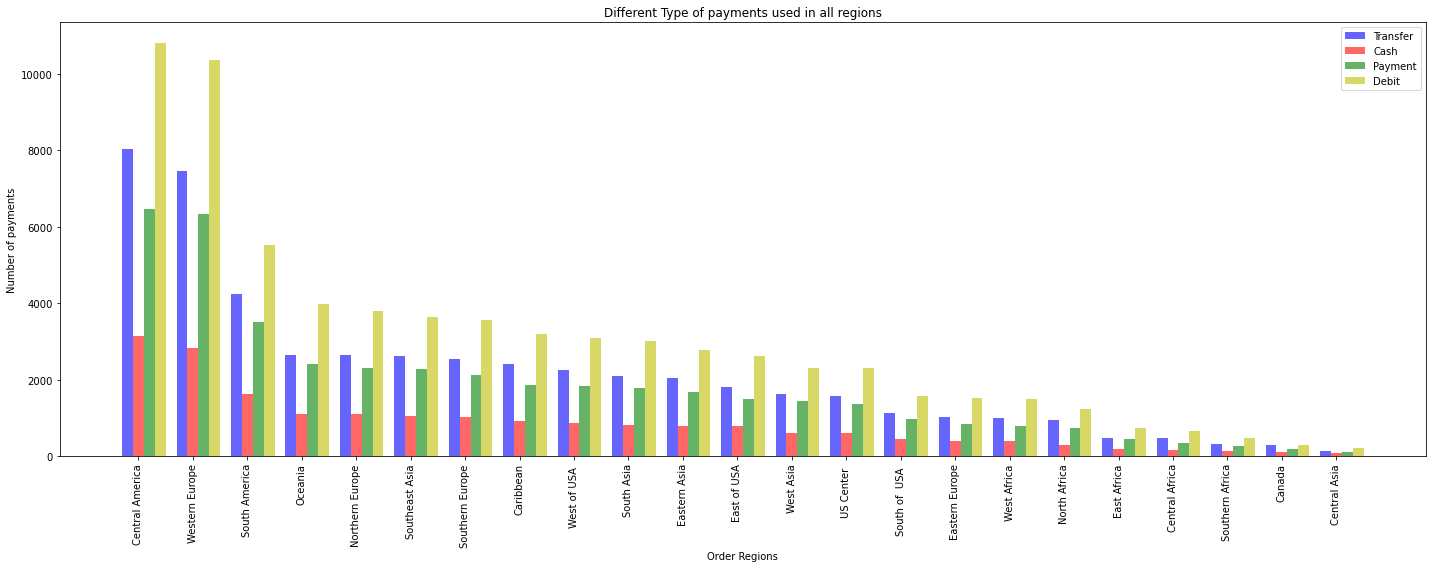

In [61]:
# Plotting a bar chart to compare the number of payments made using different payment types in different order regions
# Grouping by payment type
type1 = supply_chain[(supply_chain['type'] == 'TRANSFER')]
type2= supply_chain[(supply_chain['type'] == 'CASH')]
type3= supply_chain[(supply_chain['type'] == 'PAYMENT')]
type4= supply_chain[(supply_chain['type'] == 'DEBIT')]

# Counting the number of payments for each order region per payment type 
count1=type1['order_region'].value_counts()
count2=type2['order_region'].value_counts()
count3=type3['order_region'].value_counts()
count4=type4['order_region'].value_counts()


# Extracting the names of the order regions using the value_counts() method 

or_names=supply_chain['order_region'].value_counts().keys()
n_groups=23 #the number of order regions

#Plotting figure
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Transfer')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Cash')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments used in all regions')
plt.legend()
plt.xticks(index+bar_width,or_names,rotation=90)
plt.tight_layout()
plt.show()

Debit type is most preferred payment method by people in all regions, Cash payment being the least preferred method.

##### Products with loss

<AxesSubplot:title={'center':'Regions With Highest Loss'}>

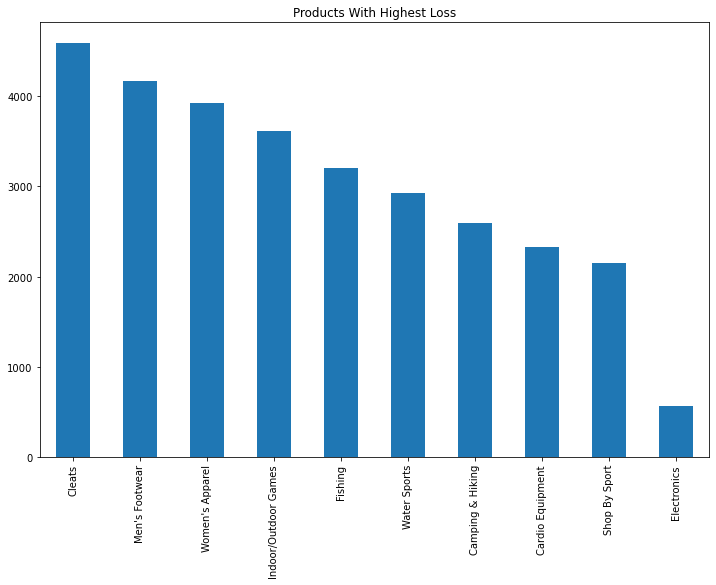

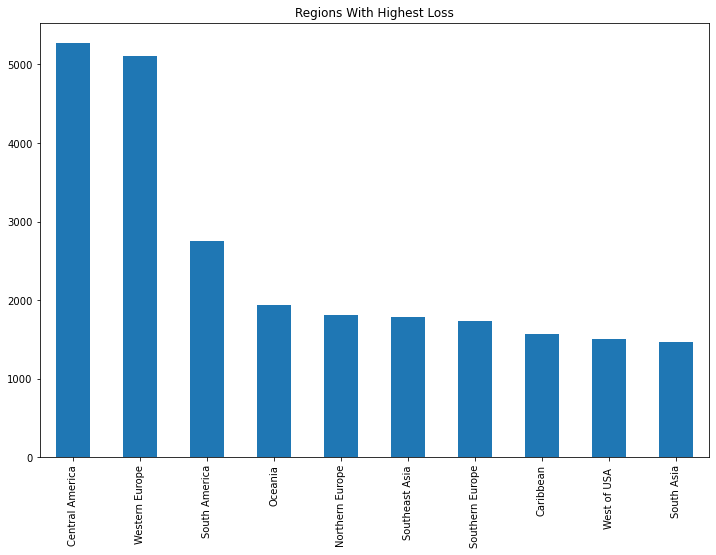

In [62]:
# Checking for orders without any benefit to the company
# That is, orders that are contributing to the company's loss of revenue
loss = supply_chain[(supply_chain['benefit_per_order']<0)]

# Plotting top 10 products with the highest loss
plt.figure(1)
loss['category_name'].value_counts().nlargest(10).plot.bar(figsize=(12,8), title="Products With Highest Loss")

# Plotting top 10 regions with the highest loss
plt.figure(2)
loss['order_region'].value_counts().nlargest(10).plot.bar(figsize=(12,8), title="Regions With Highest Loss")


In [63]:
# Sum of total revenue lost
print('Total revenue lost with orders', loss['benefit_per_order'].sum().round(2))

Total revenue lost with orders -3883547.35


The total loss sales are approximately 3.9 Millions which is an huge amount.It can be seen that Cleats is the category with most loss sales followed by Mens footwear.Most lost sales are happening in central america and western europe region.This lost sales may have happened due to suspected frauds or late deliveries.

#### Transforming the Data

In [64]:
#Creating a copy of the dataset
transformed_df =supply_chain.copy()

print('df_shape:', transformed_df.shape)
transformed_df.head()

df_shape: (180519, 38)


type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  customer_country  customer_id customer_segment customer_state  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

            customer_street department_name        market  order_city  \
0  5365 Noble Nectar Island         Fitness  Pacific Asia      Bekasi   
1          2679 Rustic Loop         Fitness  Pacific Asia     Bikaner   
2      8510 Round Bear Gate         Fitness  Pacific Asia     Bikaner   
3           3200 Amber Bend         Fitness  Pacific Asia  Townsville   
4  8671 Iron Anchor Corners         Fitness  Pacific Asia  Townsville   

  order_country  order_id  order_item_discount  order_item_discount_rate  \
0     Indonesia     77202            13.110000                      0.04   
1         India     75939            16.389999                      0.05   
2         India     75938            18.030001                      0.06   
3     Australia     75937            22.940001                      0.07   
4     Australia     75936            29.500000                      0.09   

   order_item_quantity    order_region      order_state     order_status  \
0                    1  Southeast Asia  Java Occidental         COMPLETE   
1                    1      South Asia         Rajastán          PENDING   
2                    1      South Asia         Rajastán           CLOSED   
3                    1         Oceania       Queensland         COMPLETE   
4                    1         Oceania       Queensland  PENDING_PAYMENT   

   product_name   shipping_mode  shipping_year  shipping_month shipping_day  \
0  Smart watch   Standard Class           2018               2     Saturday   
1  Smart watch   Standard Class           2018               1     Thursday   
2  Smart watch   Standard Class           2018               1    Wednesday   
3  Smart watch   Standard Class           2018               1      Tuesday   
4  Smart watch   Standard Class           2018               1       Monday   

   shipping_hour  order_year  order_month  order_week_day  order_day  \
0             22        2018            1               2  Wednesday   
1             12        2018            1               5   Saturday   
2             12        2018            1               5   Saturday   
3             11        2018            1               5   Saturday   
4             11        2018            1               5   Saturday   

   order_hour  fraud  
0          22      0  
1          12      0  
2          12      0  
3          11      0  
4          11      0

It is important to check the type of variables in the data because machine learning models can only be trained with numerical values.

In [65]:
transformed_df.dtypes

type                            object
days_for_shipping_real           int64
days_for_shipment_scheduled      int64
benefit_per_order              float64
sales_per_customer             float64
delivery_status                 object
late_delivery_risk               int64
category_id                      int64
category_name                   object
customer_city                   object
customer_country                object
customer_id                      int64
customer_segment                object
customer_state                  object
customer_street                 object
department_name                 object
market                          object
order_city                      object
order_country                   object
order_id                         int64
order_item_discount            float64
order_item_discount_rate       float64
order_item_quantity              int64
order_region                    object
order_state                     object
order_status             

##### Numerical Variables

In [66]:
# Get a list of numerical variables
num_vars = list(transformed_df.select_dtypes(include=['float64', 'int64', 'int32']).columns)

# Print the lists of numerical variables
print('Numerical variables:', num_vars)

Numerical variables: ['days_for_shipping_real', 'days_for_shipment_scheduled', 'benefit_per_order', 'sales_per_customer', 'late_delivery_risk', 'category_id', 'customer_id', 'order_id', 'order_item_discount', 'order_item_discount_rate', 'order_item_quantity', 'shipping_year', 'shipping_month', 'shipping_hour', 'order_year', 'order_month', 'order_week_day', 'order_hour', 'fraud']


In [67]:
num_vars = ['days_for_shipping_real', 'days_for_shipment_scheduled', 
            'benefit_per_order', 'sales_per_customer', 
            'late_delivery_risk', 'category_id', 'customer_id', 
            'order_id', 'order_item_discount', 
            'order_item_discount_rate', 'order_item_quantity', 
            'shipping_year', 'shipping_month', 'shipping_hour', 
            'order_year', 'order_month', 'order_week_day', 
            'order_hour', 'fraud']

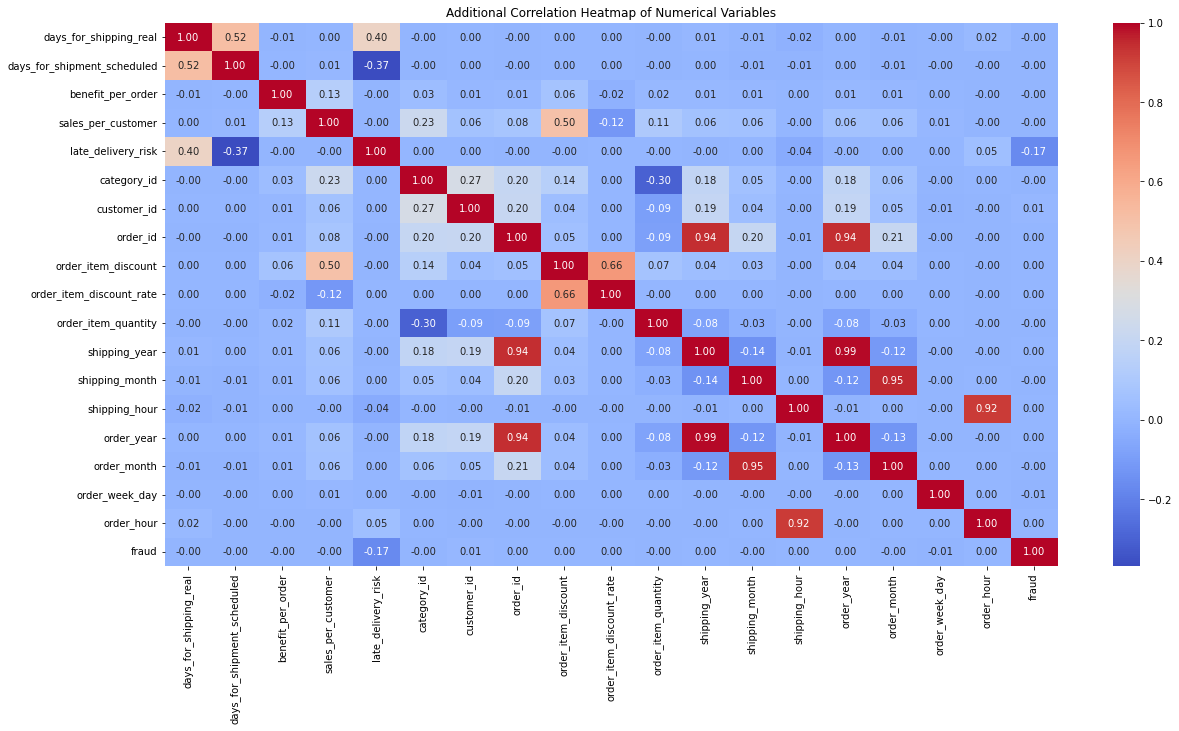

In [68]:
# Further check for correlation in the numerical variables
# select only the numerical variables from the dataframe
num_vars_df = transformed_df[num_vars]

# compute the correlation matrix of the numerical variables
corr_matrix = num_vars_df.corr()

# plot the heatmap
fig = plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt = '.2f')
plt.title('Additional Correlation Heatmap of Numerical Variables')
plt.show()

In [69]:
# Getting the highly correlated variables
corr_matrix = num_vars_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

['shipping_year', 'order_year', 'order_month', 'order_hour']

In [70]:
# Dropping the highly correlated variables
num_vars_df = num_vars_df.drop(to_drop, axis=1)

print('df shape:', num_vars_df.shape)
num_vars_df.head()

df shape: (180519, 15)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0                       3                            4          91.250000   
1                       5                            4        -249.089996   
2                       4                            4        -247.779999   
3                       3                            4          22.860001   
4                       2                            4         134.210007   

   sales_per_customer  late_delivery_risk  category_id  customer_id  order_id  \
0          314.640015                   0           73        20755     77202   
1          311.359985                   1           73        19492     75939   
2          309.720001                   0           73        19491     75938   
3          304.809998                   0           73        19490     75937   
4          298.250000                   0           73        19489     75936   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            13.110000                      0.04                    1   
1            16.389999                      0.05                    1   
2            18.030001                      0.06                    1   
3            22.940001                      0.07                    1   
4            29.500000                      0.09                    1   

   shipping_month  shipping_hour  order_week_day  fraud  
0               2             22               2      0  
1               1             12               5      0  
2               1             12               5      0  
3               1             11               5      0  
4               1             11               5      0

In [71]:
# Get a list of the remaining numerical variables
num_vars_list = list(num_vars_df)

# Print the lists of numerical variables
print('List of Numerical variables:', num_vars_list)

List of Numerical variables: ['days_for_shipping_real', 'days_for_shipment_scheduled', 'benefit_per_order', 'sales_per_customer', 'late_delivery_risk', 'category_id', 'customer_id', 'order_id', 'order_item_discount', 'order_item_discount_rate', 'order_item_quantity', 'shipping_month', 'shipping_hour', 'order_week_day', 'fraud']


##### Categorical Variables

In [72]:
# Get a list of categorical variables
cat_vars = list(transformed_df.select_dtypes(include=['object']).columns)

# Print the lists of categorical variables
print('Categorical variables:', cat_vars)

Categorical variables: ['type', 'delivery_status', 'category_name', 'customer_city', 'customer_country', 'customer_segment', 'customer_state', 'customer_street', 'department_name', 'market', 'order_city', 'order_country', 'order_region', 'order_state', 'order_status', 'product_name', 'shipping_mode', 'shipping_day', 'order_day']


## 5. Splitting/Preparing Data For The Different Aspects Of Supply Chain Being Considered

### I) Order Delivery

In [73]:
#Create a copy of transformed_df
order_delivery = transformed_df.copy()

order_delivery.head()

type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  customer_country  customer_id customer_segment customer_state  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

            customer_street department_name        market  order_city  \
0  5365 Noble Nectar Island         Fitness  Pacific Asia      Bekasi   
1          2679 Rustic Loop         Fitness  Pacific Asia     Bikaner   
2      8510 Round Bear Gate         Fitness  Pacific Asia     Bikaner   
3           3200 Amber Bend         Fitness  Pacific Asia  Townsville   
4  8671 Iron Anchor Corners         Fitness  Pacific Asia  Townsville   

  order_country  order_id  order_item_discount  order_item_discount_rate  \
0     Indonesia     77202            13.110000                      0.04   
1         India     75939            16.389999                      0.05   
2         India     75938            18.030001                      0.06   
3     Australia     75937            22.940001                      0.07   
4     Australia     75936            29.500000                      0.09   

   order_item_quantity    order_region      order_state     order_status  \
0                    1  Southeast Asia  Java Occidental         COMPLETE   
1                    1      South Asia         Rajastán          PENDING   
2                    1      South Asia         Rajastán           CLOSED   
3                    1         Oceania       Queensland         COMPLETE   
4                    1         Oceania       Queensland  PENDING_PAYMENT   

   product_name   shipping_mode  shipping_year  shipping_month shipping_day  \
0  Smart watch   Standard Class           2018               2     Saturday   
1  Smart watch   Standard Class           2018               1     Thursday   
2  Smart watch   Standard Class           2018               1    Wednesday   
3  Smart watch   Standard Class           2018               1      Tuesday   
4  Smart watch   Standard Class           2018               1       Monday   

   shipping_hour  order_year  order_month  order_week_day  order_day  \
0             22        2018            1               2  Wednesday   
1             12        2018            1               5   Saturday   
2             12        2018            1               5   Saturday   
3             11        2018            1               5   Saturday   
4             11        2018            1               5   Saturday   

   order_hour  fraud  
0          22      0  
1          12      0  
2          12      0  
3          11      0  
4          11      0

In [74]:
# List of numerical and categorical variables
# Excluding the target variable (handled alone) 
# and "fraud" column created for fraud model
num_vars_l = ['days_for_shipping_real', 'days_for_shipment_scheduled', 
              'benefit_per_order', 'sales_per_customer','category_id', 
              'customer_id', 'order_id', 'order_item_discount', 
              'order_item_discount_rate', 'order_item_quantity', 
              'shipping_month', 'shipping_hour', 'order_week_day']

cat_vars_l =  ['type', 'delivery_status', 'category_name', 
               'customer_city', 'customer_country', 'customer_segment', 
               'customer_state', 'customer_street', 'department_name', 
               'market', 'order_city', 'order_country', 'order_region', 
               'order_state', 'order_status', 'product_name', 
               'shipping_mode', 'shipping_day', 'order_day']

target_var_l = 'late_delivery_risk'

#### Chi-Square Test for Order Delivery Risk

In [75]:
# Create a new dataframe to store the chi-square test results
chi2_results_l = pd.DataFrame(columns=['Variable', 'Chi-Square Statistic', 'P-Value'])

# Loop through each categorical variable and perform the chi-square test
for var in cat_vars_l:
    observed = pd.crosstab(order_delivery[var], order_delivery[target_var_l])
    chi2, p, _, _ = stats.chi2_contingency(observed)
    chi2_results_l = chi2_results_l.append({'Variable': var, 'Chi-Square Statistic': chi2, 'P-Value': p}, ignore_index=True)

# Print the results
print(chi2_results_l)

            Variable Chi-Square Statistic   P-Value
0               type          1103.922833       0.0
1    delivery_status             180519.0       0.0
2      category_name            42.889228  0.717981
3      customer_city           1879.54336       0.0
4   customer_country             0.192389  0.660936
5   customer_segment              1.02474  0.599074
6     customer_state           101.077792  0.000003
7    customer_street         23185.018517       0.0
8    department_name             6.666695  0.756492
9             market             8.650714  0.070448
10        order_city         14195.298421       0.0
11     order_country           580.041562       0.0
12      order_region            74.933614       0.0
13       order_state          4286.408616       0.0
14      order_status          9854.657149       0.0
15      product_name           103.122165  0.816406
16     shipping_mode         37716.042505       0.0
17      shipping_day             6.921611  0.328158
18         o

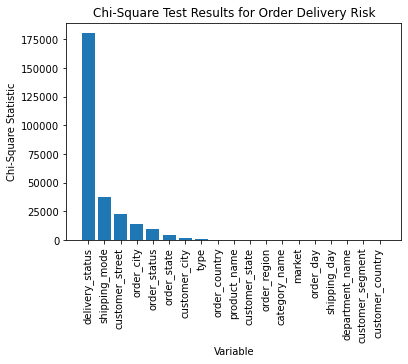

In [76]:
# Plot of chi-square test result

# Sort the chi2_results dataframe by chi-square statistic
sorted_results = chi2_results_l.sort_values(by='Chi-Square Statistic', ascending=False)

# Create a bar plot of the chi-square statistic for each variable
plt.bar(sorted_results['Variable'], sorted_results['Chi-Square Statistic'])
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Chi-Square Statistic')
plt.title('Chi-Square Test Results for Order Delivery Risk')
plt.show()

In [77]:
# Create an empty list to store the significant columns
significant_cols_l = []

# Loop through each row in the chi2_results dataframe and check if the p-value is less than 0.05
for index, row in chi2_results_l.iterrows():
    if row['P-Value'] < 0.05:
        significant_cols_l.append(row['Variable'])

# Print the significant columns
print("Columns with p-value less than 0.05:")
print(significant_cols_l)

Columns with p-value less than 0.05:
['type', 'delivery_status', 'customer_city', 'customer_state', 'customer_street', 'order_city', 'order_country', 'order_region', 'order_state', 'order_status', 'shipping_mode']


To determine which columns have a significant association with the categorical variable, you need to look at the p-values in the table. A p-value less than 0.05 indicates that the null hypothesis can be rejected, and there is evidence of an association between the two variables. Conversely, a p-value greater than or equal to 0.05 suggests that there is no evidence of an association, and the null hypothesis cannot be rejected.

In [78]:
# Dataframe for only categorical columns
order_delivery_cat = order_delivery.select_dtypes(include=['object'])

print('df shape:', order_delivery_cat.shape)
order_delivery_cat.head()

df shape: (180519, 19)


type   delivery_status   category_name customer_city customer_country  \
0     DEBIT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   
1  TRANSFER     Late delivery  Sporting Goods        Caguas      Puerto Rico   
2      CASH  Shipping on time  Sporting Goods      San Jose          EE. UU.   
3     DEBIT  Advance shipping  Sporting Goods   Los Angeles          EE. UU.   
4   PAYMENT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   

  customer_segment customer_state           customer_street department_name  \
0         Consumer             PR  5365 Noble Nectar Island         Fitness   
1         Consumer             PR          2679 Rustic Loop         Fitness   
2         Consumer             CA      8510 Round Bear Gate         Fitness   
3      Home Office             CA           3200 Amber Bend         Fitness   
4        Corporate             PR  8671 Iron Anchor Corners         Fitness   

         market  order_city order_country    order_region      order_state  \
0  Pacific Asia      Bekasi     Indonesia  Southeast Asia  Java Occidental   
1  Pacific Asia     Bikaner         India      South Asia         Rajastán   
2  Pacific Asia     Bikaner         India      South Asia         Rajastán   
3  Pacific Asia  Townsville     Australia         Oceania       Queensland   
4  Pacific Asia  Townsville     Australia         Oceania       Queensland   

      order_status  product_name   shipping_mode shipping_day  order_day  
0         COMPLETE  Smart watch   Standard Class     Saturday  Wednesday  
1          PENDING  Smart watch   Standard Class     Thursday   Saturday  
2           CLOSED  Smart watch   Standard Class    Wednesday   Saturday  
3         COMPLETE  Smart watch   Standard Class      Tuesday   Saturday  
4  PENDING_PAYMENT  Smart watch   Standard Class       Monday   Saturday

In [79]:
# Drop all the categorical columns with  p-value less than 0.05
order_delivery_cat.drop(columns=['type', 'delivery_status', 'customer_city',
                                 'customer_state', 'customer_street', 
                                 'order_city', 'order_country','order_region', 
                                 'order_state', 'order_status', 
                                 'shipping_mode'], inplace=True)

# Print the new dataframe
print('df shape:', order_delivery_cat.shape)
order_delivery_cat.head()

df shape: (180519, 8)


category_name customer_country customer_segment department_name  \
0  Sporting Goods      Puerto Rico         Consumer         Fitness   
1  Sporting Goods      Puerto Rico         Consumer         Fitness   
2  Sporting Goods          EE. UU.         Consumer         Fitness   
3  Sporting Goods          EE. UU.      Home Office         Fitness   
4  Sporting Goods      Puerto Rico        Corporate         Fitness   

         market  product_name shipping_day  order_day  
0  Pacific Asia  Smart watch      Saturday  Wednesday  
1  Pacific Asia  Smart watch      Thursday   Saturday  
2  Pacific Asia  Smart watch     Wednesday   Saturday  
3  Pacific Asia  Smart watch       Tuesday   Saturday  
4  Pacific Asia  Smart watch        Monday   Saturday

In [80]:
# create a new dataframe `order_delivery_target` with the target variable
order_delivery_target = order_delivery.loc[:, target_var_l]
order_delivery_target.head()

0    0
1    1
2    0
3    0
4    0
Name: late_delivery_risk, dtype: int64

There are some columns with object type data which cannot be trained in machine learning models so all the categorical variables will be converted to numerical variables

We apply target encoding as using one-hot encoding in this scenario could lead to high memory consumption

#### Target Encoding 

In [81]:
import category_encoders as ce

# Instantiate TargetEncoder
encoder = ce.TargetEncoder()

# Encode categorical variable
target_encoded_features = encoder.fit_transform(order_delivery_cat, order_delivery_target)

# Displaying the encoded data
print('df shape:', target_encoded_features.shape)
target_encoded_features.head()

df shape: (180519, 8)


category_name  customer_country  customer_segment  department_name  \
0       0.554622          0.547634          0.548084         0.555466   
1       0.554622          0.547634          0.548084         0.555466   
2       0.554622          0.548702          0.548084         0.555466   
3       0.554622          0.548702          0.550704         0.555466   
4       0.554622          0.547634          0.547227         0.555466   

    market  product_name  shipping_day  order_day  
0  0.55046      0.554622      0.546652   0.547583  
1  0.55046      0.554622      0.546169   0.543956  
2  0.55046      0.554622      0.545423   0.543956  
3  0.55046      0.554622      0.552783   0.543956  
4  0.55046      0.554622      0.545384   0.543956

In [82]:
order_delivery_cat_final = target_encoded_features.copy()
order_delivery_cat_final.head()

category_name  customer_country  customer_segment  department_name  \
0       0.554622          0.547634          0.548084         0.555466   
1       0.554622          0.547634          0.548084         0.555466   
2       0.554622          0.548702          0.548084         0.555466   
3       0.554622          0.548702          0.550704         0.555466   
4       0.554622          0.547634          0.547227         0.555466   

    market  product_name  shipping_day  order_day  
0  0.55046      0.554622      0.546652   0.547583  
1  0.55046      0.554622      0.546169   0.543956  
2  0.55046      0.554622      0.545423   0.543956  
3  0.55046      0.554622      0.552783   0.543956  
4  0.55046      0.554622      0.545384   0.543956

In [83]:
# create a new dataframe `order_delivery_num` with the numerical variables
order_delivery_num = order_delivery.loc[:, num_vars_l]

print('df shape:', order_delivery_num.shape)
order_delivery_num.head()

df shape: (180519, 13)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0                       3                            4          91.250000   
1                       5                            4        -249.089996   
2                       4                            4        -247.779999   
3                       3                            4          22.860001   
4                       2                            4         134.210007   

   sales_per_customer  category_id  customer_id  order_id  \
0          314.640015           73        20755     77202   
1          311.359985           73        19492     75939   
2          309.720001           73        19491     75938   
3          304.809998           73        19490     75937   
4          298.250000           73        19489     75936   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            13.110000                      0.04                    1   
1            16.389999                      0.05                    1   
2            18.030001                      0.06                    1   
3            22.940001                      0.07                    1   
4            29.500000                      0.09                    1   

   shipping_month  shipping_hour  order_week_day  
0               2             22               2  
1               1             12               5  
2               1             12               5  
3               1             11               5  
4               1             11               5

#### Standardising the data 

In [84]:
# standardize the numerical variables using the StandardScaler class
scaler = StandardScaler()
scaled_num_vars = scaler.fit_transform(order_delivery_num)

# create a new dataframe with the standardized numerical variables
order_delivery_std = pd.DataFrame(scaled_num_vars, columns=order_delivery_num.columns)

print('df shape:', order_delivery_std.shape)
order_delivery_std.head()

df shape: (180519, 13)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0               -0.306491                     0.777152           0.663343   
1                0.925251                     0.777152          -2.595582   
2                0.309380                     0.777152          -2.583038   
3               -0.306491                     0.777152           0.008474   
4               -0.922361                     0.777152           1.074706   

   sales_per_customer  category_id  customer_id  order_id  \
0            1.095708     2.630978     3.378318  1.947231   
1            1.068384     2.630978     3.074924  1.887218   
2            1.054722     2.630978     3.074684  1.887170   
3            1.013820     2.630978     3.074443  1.887123   
4            0.959174     2.630978     3.074203  1.887075   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            -0.346534                 -0.875782            -0.775836   
1            -0.196082                 -0.733767            -0.775836   
2            -0.120855                 -0.591751            -0.775836   
3             0.104366                 -0.449736            -0.775836   
4             0.405271                 -0.165706            -0.775836   

   shipping_month  shipping_hour  order_week_day  
0       -1.251329       1.515834       -0.503426  
1       -1.545587       0.070557        0.995427  
2       -1.545587       0.070557        0.995427  
3       -1.545587      -0.073970        0.995427  
4       -1.545587      -0.073970        0.995427

#### Dataframe for Order Delivery Risk Prediction

In [85]:
# Concatenating the three dataframes horizontally using `concat`
order_delivery_df = pd.concat([order_delivery_std, order_delivery_cat_final, order_delivery_target], axis=1)

print('df shape:', order_delivery_df.shape)
order_delivery_df.head()

df shape: (180519, 22)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0               -0.306491                     0.777152           0.663343   
1                0.925251                     0.777152          -2.595582   
2                0.309380                     0.777152          -2.583038   
3               -0.306491                     0.777152           0.008474   
4               -0.922361                     0.777152           1.074706   

   sales_per_customer  category_id  customer_id  order_id  \
0            1.095708     2.630978     3.378318  1.947231   
1            1.068384     2.630978     3.074924  1.887218   
2            1.054722     2.630978     3.074684  1.887170   
3            1.013820     2.630978     3.074443  1.887123   
4            0.959174     2.630978     3.074203  1.887075   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            -0.346534                 -0.875782            -0.775836   
1            -0.196082                 -0.733767            -0.775836   
2            -0.120855                 -0.591751            -0.775836   
3             0.104366                 -0.449736            -0.775836   
4             0.405271                 -0.165706            -0.775836   

   shipping_month  shipping_hour  order_week_day  category_name  \
0       -1.251329       1.515834       -0.503426       0.554622   
1       -1.545587       0.070557        0.995427       0.554622   
2       -1.545587       0.070557        0.995427       0.554622   
3       -1.545587      -0.073970        0.995427       0.554622   
4       -1.545587      -0.073970        0.995427       0.554622   

   customer_country  customer_segment  department_name   market  product_name  \
0          0.547634          0.548084         0.555466  0.55046      0.554622   
1          0.547634          0.548084         0.555466  0.55046      0.554622   
2          0.548702          0.548084         0.555466  0.55046      0.554622   
3          0.548702          0.550704         0.555466  0.55046      0.554622   
4          0.547634          0.547227         0.555466  0.55046      0.554622   

   shipping_day  order_day  late_delivery_risk  
0      0.546652   0.547583                   0  
1      0.546169   0.543956                   1  
2      0.545423   0.543956                   0  
3      0.552783   0.543956                   0  
4      0.545384   0.543956                   0

### Fraud Detection

In [86]:
#Create a copy of transformed_df
fraud_detection = transformed_df.copy()
print('df shape:', fraud_detection.shape)
fraud_detection.head()

df shape: (180519, 38)


type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  customer_country  customer_id customer_segment customer_state  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

            customer_street department_name        market  order_city  \
0  5365 Noble Nectar Island         Fitness  Pacific Asia      Bekasi   
1          2679 Rustic Loop         Fitness  Pacific Asia     Bikaner   
2      8510 Round Bear Gate         Fitness  Pacific Asia     Bikaner   
3           3200 Amber Bend         Fitness  Pacific Asia  Townsville   
4  8671 Iron Anchor Corners         Fitness  Pacific Asia  Townsville   

  order_country  order_id  order_item_discount  order_item_discount_rate  \
0     Indonesia     77202            13.110000                      0.04   
1         India     75939            16.389999                      0.05   
2         India     75938            18.030001                      0.06   
3     Australia     75937            22.940001                      0.07   
4     Australia     75936            29.500000                      0.09   

   order_item_quantity    order_region      order_state     order_status  \
0                    1  Southeast Asia  Java Occidental         COMPLETE   
1                    1      South Asia         Rajastán          PENDING   
2                    1      South Asia         Rajastán           CLOSED   
3                    1         Oceania       Queensland         COMPLETE   
4                    1         Oceania       Queensland  PENDING_PAYMENT   

   product_name   shipping_mode  shipping_year  shipping_month shipping_day  \
0  Smart watch   Standard Class           2018               2     Saturday   
1  Smart watch   Standard Class           2018               1     Thursday   
2  Smart watch   Standard Class           2018               1    Wednesday   
3  Smart watch   Standard Class           2018               1      Tuesday   
4  Smart watch   Standard Class           2018               1       Monday   

   shipping_hour  order_year  order_month  order_week_day  order_day  \
0             22        2018            1               2  Wednesday   
1             12        2018            1               5   Saturday   
2             12        2018            1               5   Saturday   
3             11        2018            1               5   Saturday   
4             11        2018            1               5   Saturday   

   order_hour  fraud  
0          22      0  
1          12      0  
2          12      0  
3          11      0  
4          11      0

In [87]:
# List of numerical and categorical variables
# Excluding the target variable ("fraud") 
# and "late_delivery_risk" column
num_vars_f =['days_for_shipping_real', 'days_for_shipment_scheduled', 
             'benefit_per_order', 'sales_per_customer','category_id', 
             'customer_id', 'order_id', 'order_item_discount', 
             'order_item_discount_rate', 'order_item_quantity', 
             'shipping_month', 'shipping_hour', 'order_week_day']

cat_vars_f = ['type', 'delivery_status', 'category_name', 'customer_city', 
              'customer_country', 'customer_segment', 'customer_state', 
              'customer_street','department_name', 'market', 'order_city',
              'order_country', 'order_region', 'order_state', 
              'order_status', 'product_name','shipping_mode', 
              'shipping_day', 'order_day']


target_var_f = 'fraud'

In [88]:
fraud_detection['fraud'].value_counts()

0    176457
1      4062
Name: fraud, dtype: int64

#### Balancing the Imbalanced Dataset

In [89]:
# Split the dataset into X (features) and y (target variable)
X = fraud_detection.drop('fraud', axis=1)
y = fraud_detection['fraud']


##### Oversampling the minority class

In [90]:
# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply random over-sampling to your dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

In [91]:
# Define the list of feature column names

feature_columns = ['days_for_shipping_real', 'days_for_shipment_scheduled',
                   'benefit_per_order', 'sales_per_customer','category_id',
                   'customer_id', 'order_id', 'order_item_discount',
                   'order_item_discount_rate', 'order_item_quantity', 
                   'shipping_month', 'shipping_hour', 'order_week_day', 
                   'category_name', 'customer_city', 'customer_country', 
                   'customer_segment', 'customer_state', 'customer_street',
                   'department_name', 'market', 'order_city','order_country', 
                   'order_region', 'order_state', 'order_status', 
                   'product_name','shipping_mode', 'shipping_day', 
                   'order_day', 'fraud', 'type', 'late_delivery_risk', 
                   'delivery_status']  

# Create a DataFrame from the balanced data
fraud_oversampled = pd.DataFrame(X_resampled, columns=feature_columns)  # assuming feature_columns is a list of feature column names
fraud_oversampled['fraud'] = y_resampled  # assuming 'target' is the column name for the binary target variable

# View the shape of the balanced DataFrame
print("Shape of balanced DataFrame:", fraud_oversampled.shape)


# View the first few rows of the balanced DataFrame
fraud_oversampled.head()


Shape of balanced DataFrame: (352914, 34)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0                       3                            4          91.250000   
1                       5                            4        -249.089996   
2                       4                            4        -247.779999   
3                       3                            4          22.860001   
4                       2                            4         134.210007   

   sales_per_customer  category_id  customer_id  order_id  \
0          314.640015           73        20755     77202   
1          311.359985           73        19492     75939   
2          309.720001           73        19491     75938   
3          304.809998           73        19490     75937   
4          298.250000           73        19489     75936   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            13.110000                      0.04                    1   
1            16.389999                      0.05                    1   
2            18.030001                      0.06                    1   
3            22.940001                      0.07                    1   
4            29.500000                      0.09                    1   

   shipping_month  shipping_hour  order_week_day   category_name  \
0               2             22               2  Sporting Goods   
1               1             12               5  Sporting Goods   
2               1             12               5  Sporting Goods   
3               1             11               5  Sporting Goods   
4               1             11               5  Sporting Goods   

  customer_city customer_country customer_segment customer_state  \
0        Caguas      Puerto Rico         Consumer             PR   
1        Caguas      Puerto Rico         Consumer             PR   
2      San Jose          EE. UU.         Consumer             CA   
3   Los Angeles          EE. UU.      Home Office             CA   
4        Caguas      Puerto Rico        Corporate             PR   

            customer_street department_name        market  order_city  \
0  5365 Noble Nectar Island         Fitness  Pacific Asia      Bekasi   
1          2679 Rustic Loop         Fitness  Pacific Asia     Bikaner   
2      8510 Round Bear Gate         Fitness  Pacific Asia     Bikaner   
3           3200 Amber Bend         Fitness  Pacific Asia  Townsville   
4  8671 Iron Anchor Corners         Fitness  Pacific Asia  Townsville   

  order_country    order_region      order_state     order_status  \
0     Indonesia  Southeast Asia  Java Occidental         COMPLETE   
1         India      South Asia         Rajastán          PENDING   
2         India      South Asia         Rajastán           CLOSED   
3     Australia         Oceania       Queensland         COMPLETE   
4     Australia         Oceania       Queensland  PENDING_PAYMENT   

   product_name   shipping_mode shipping_day  order_day  fraud      type  \
0  Smart watch   Standard Class     Saturday  Wednesday      0     DEBIT   
1  Smart watch   Standard Class     Thursday   Saturday      0  TRANSFER   
2  Smart watch   Standard Class    Wednesday   Saturday      0      CASH   
3  Smart watch   Standard Class      Tuesday   Saturday      0     DEBIT   
4  Smart watch   Standard Class       Monday   Saturday      0   PAYMENT   

   late_delivery_risk   delivery_status  
0                   0  Advance shipping  
1                   1     Late delivery  
2                   0  Shipping on time  
3                   0  Advance shipping  
4                   0  Advance shipping

In [92]:
# Check the unique values in the target variable column after balancing
print(fraud_oversampled['fraud'].value_counts())

0    176457
1    176457
Name: fraud, dtype: int64


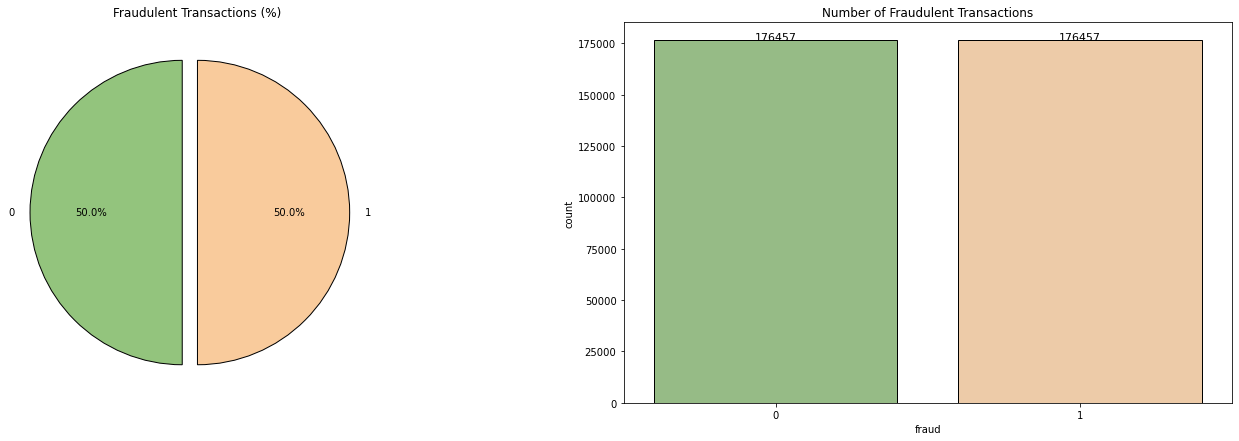

In [93]:
# Plot of the oversampled balanced data

colors = ['#93c47d', '#f9cb9c']

f = list(fraud_oversampled['fraud'].value_counts())
circle = [f[0] / sum(f) * 100,f[1] / sum(f) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (24,7))

plt.subplot(1,2,1)
plt.pie(circle,labels = list(fraud_oversampled['fraud'].unique()),autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Fraudulent Transactions (%)');

plt.subplot(1,2,2)

ax = sns.countplot('fraud',data = fraud_oversampled, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title('Number of Fraudulent Transactions');
plt.show()

##### Undersampling the majority class

In [94]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [95]:
# Define the list of feature column names

feature_columns = ['days_for_shipping_real', 'days_for_shipment_scheduled',
                   'benefit_per_order', 'sales_per_customer','category_id',
                   'customer_id', 'order_id', 'order_item_discount',
                   'order_item_discount_rate', 'order_item_quantity', 
                   'shipping_month', 'shipping_hour', 'order_week_day', 
                   'category_name', 'customer_city', 'customer_country', 
                   'customer_segment', 'customer_state', 'customer_street',
                   'department_name', 'market', 'order_city','order_country', 
                   'order_region', 'order_state', 'order_status', 
                   'product_name','shipping_mode', 'shipping_day', 
                   'order_day', 'fraud', 'type', 'late_delivery_risk', 
                   'delivery_status']  

# Create a DataFrame from the balanced data
fraud_under_sampled = pd.DataFrame(X_resampled, columns=feature_columns)  # assuming feature_columns is a list of feature column names
fraud_under_sampled['fraud'] = y_resampled  # assuming 'target' is the column name for the binary target variable

# View the shape of the balanced DataFrame
print("Shape of balanced DataFrame:", fraud_under_sampled.shape)


# View the first few rows of the balanced DataFrame
fraud_under_sampled.head()


Shape of balanced DataFrame: (8124, 34)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0                       6                            4          85.559998   
1                       3                            2          37.700001   
2                       2                            4         131.119995   
3                       3                            4          25.500000   
4                       6                            4         115.879997   

   sales_per_customer  category_id  customer_id  order_id  \
0          185.990005           48        10676     36865   
1          129.990005           18         1881     30542   
2          278.980011           43        11632     52616   
3          339.970001            9         9627     35807   
4          429.179993           66        18348     74795   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            14.000000                      0.07                    1   
1             0.000000                      0.00                    1   
2            21.000000                      0.07                    1   
3            59.990002                      0.15                    4   
4            32.299999                      0.07                    1   

   shipping_month  shipping_hour  order_week_day     category_name  \
0               6              3               2      Water Sports   
1               3             19               0    Men's Footwear   
2               2              1               1  Camping & Hiking   
3               6             16               0  Cardio Equipment   
4               1             19               2            Crafts   

  customer_city customer_country customer_segment customer_state  \
0        Quincy          EE. UU.        Corporate             IL   
1          Mesa          EE. UU.      Home Office             AZ   
2   San Antonio          EE. UU.        Corporate             TX   
3     Las Vegas          EE. UU.        Corporate             NV   
4        Caguas      Puerto Rico        Corporate             PR   

          customer_street department_name        market    order_city  \
0   5292 Colonial Grounds        Fan Shop          USCA       Chicago   
1  7125 Silent Expressway         Apparel  Pacific Asia  Christchurch   
2    7864 Lazy Deer Jetty        Fan Shop         LATAM   Tlaquepaque   
3      7464 Quaking Stead        Footwear          USCA   Springfield   
4         4462 Blue Drive         Apparel  Pacific Asia      Shenzhen   

    order_country     order_region order_state     order_status  \
0  Estados Unidos       US Center     Illinois          PENDING   
1   Nueva Zelanda          Oceania  Canterbury   PAYMENT_REVIEW   
2          México  Central America     Jalisco         COMPLETE   
3  Estados Unidos       US Center       Misuri  PENDING_PAYMENT   
4           China     Eastern Asia   Guangdong          PENDING   

                                    product_name   shipping_mode shipping_day  \
0                    Pelican Sunstream 100 Kayak  Standard Class      Tuesday   
1        Nike Men's CJ Elite 2 TD Football Cleat    Second Class     Thursday   
2  Diamondback Women's Serene Classic Comfort Bi  Standard Class     Thursday   
3              Nike Men's Free 5.0+ Running Shoe  Standard Class     Thursday   
4                               Porcelain crafts  Standard Class      Tuesday   

   order_day  fraud      type  late_delivery_risk   delivery_status  
0  Wednesday      0  TRANSFER                   1     Late delivery  
1     Monday      0   PAYMENT                   1     Late delivery  
2    Tuesday      0     DEBIT                   0  Advance shipping  
3     Monday      0   PAYMENT                   0  Advance shipping  
4  Wednesday      0  TRANSFER                   1     Late delivery

In [96]:
# Check the unique values in the target variable column after balancing
print(fraud_under_sampled['fraud'].value_counts())

0    4062
1    4062
Name: fraud, dtype: int64


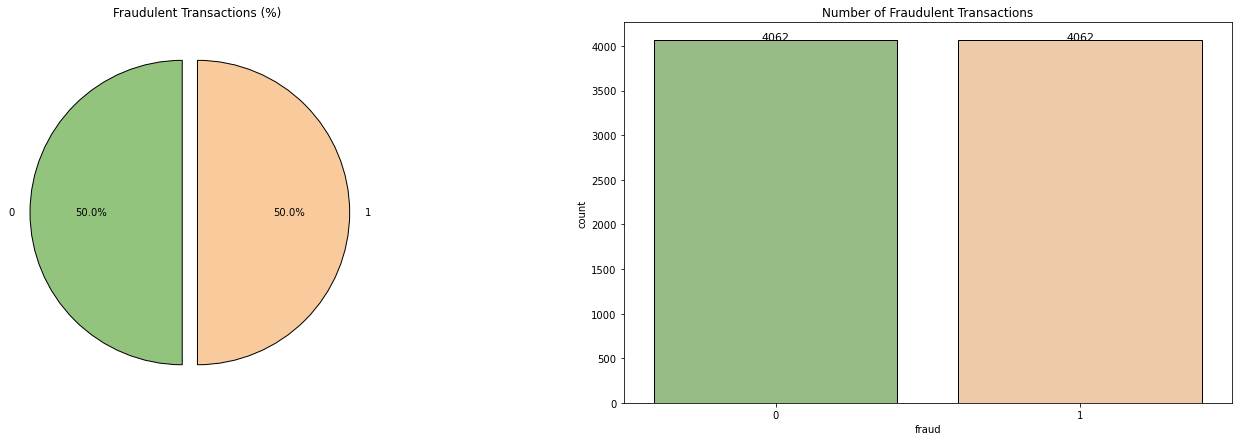

In [97]:
# Plot of the undersampled balanced data

colors = ['#93c47d', '#f9cb9c']

f = list(fraud_under_sampled['fraud'].value_counts())
circle = [f[0] / sum(f) * 100,f[1] / sum(f) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (24,7))

plt.subplot(1,2,1)
plt.pie(circle,labels = list(fraud_under_sampled['fraud'].unique()),autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Fraudulent Transactions (%)');

plt.subplot(1,2,2)

ax = sns.countplot('fraud',data = fraud_under_sampled, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.title('Number of Fraudulent Transactions');
plt.show()

#### Chi-Square Test for Fraud Detection

#### a) Using the imbalanced fraud data

In [98]:
# Create a new dataframe to store the chi-square test results
chi2_results_imb = pd.DataFrame(columns=['Variable', 'Chi-Square Statistic', 'P-Value'])

# Loop through each categorical variable and perform the chi-square test
for vars in cat_vars_f:
    observed = pd.crosstab(fraud_detection[vars], fraud_detection[target_var_f])
    chi2, p, _, _ = stats.chi2_contingency(observed)
    chi2_results_imb = chi2_results_imb.append({'Variable': vars, 'Chi-Square Statistic': chi2, 'P-Value': p}, ignore_index=True)

# Print the results
print(chi2_results_imb)

            Variable Chi-Square Statistic   P-Value
0               type         10882.639839       0.0
1    delivery_status         92587.831917       0.0
2      category_name            42.760676  0.722757
3      customer_city          1981.036513       0.0
4   customer_country             8.146266  0.004315
5   customer_segment            14.574875  0.000684
6     customer_state           134.107472       0.0
7    customer_street         24019.533281       0.0
8    department_name             3.451677  0.968714
9             market             8.950995  0.062336
10        order_city         11748.567757       0.0
11     order_country           503.233955       0.0
12      order_region            83.034937       0.0
13       order_state          4135.204481       0.0
14      order_status             180519.0       0.0
15      product_name           103.267163  0.813655
16     shipping_mode             8.461761  0.037373
17      shipping_day             9.016297  0.172664
18         o

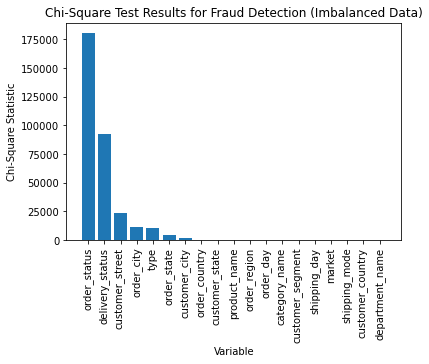

In [99]:
# Plot of chi-square test result on the imbalanced data

# Sort the chi2_results dataframe by chi-square statistic
sorted_results = chi2_results_imb.sort_values(by='Chi-Square Statistic', ascending=False)

# Create a bar plot of the chi-square statistic for each variable
plt.bar(sorted_results['Variable'], sorted_results['Chi-Square Statistic'])
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Chi-Square Statistic')
plt.title('Chi-Square Test Results for Fraud Detection (Imbalanced Data)')
plt.show()

In [100]:
# Create an empty list to store the significant columns
significant_cols_f = []

# Loop through each row in the chi2_results dataframe and check if the p-value is less than 0.05
for index, row in chi2_results_imb.iterrows():
    if row['P-Value'] < 0.05:
        significant_cols_f.append(row['Variable'])

# Print the significant columns
print("Columns with p-value less than 0.05:")
print(significant_cols_f)

Columns with p-value less than 0.05:
['type', 'delivery_status', 'customer_city', 'customer_country', 'customer_segment', 'customer_state', 'customer_street', 'order_city', 'order_country', 'order_region', 'order_state', 'order_status', 'shipping_mode', 'order_day']


##### Creating a dataframe for only the categorical variables

In [101]:
# Dataframe for only categorical columns
fraud_detection_cat = fraud_detection.select_dtypes(include=['object'])

print('df shape:', fraud_detection_cat.shape)
fraud_detection_cat.head()

df shape: (180519, 19)


type   delivery_status   category_name customer_city customer_country  \
0     DEBIT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   
1  TRANSFER     Late delivery  Sporting Goods        Caguas      Puerto Rico   
2      CASH  Shipping on time  Sporting Goods      San Jose          EE. UU.   
3     DEBIT  Advance shipping  Sporting Goods   Los Angeles          EE. UU.   
4   PAYMENT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   

  customer_segment customer_state           customer_street department_name  \
0         Consumer             PR  5365 Noble Nectar Island         Fitness   
1         Consumer             PR          2679 Rustic Loop         Fitness   
2         Consumer             CA      8510 Round Bear Gate         Fitness   
3      Home Office             CA           3200 Amber Bend         Fitness   
4        Corporate             PR  8671 Iron Anchor Corners         Fitness   

         market  order_city order_country    order_region      order_state  \
0  Pacific Asia      Bekasi     Indonesia  Southeast Asia  Java Occidental   
1  Pacific Asia     Bikaner         India      South Asia         Rajastán   
2  Pacific Asia     Bikaner         India      South Asia         Rajastán   
3  Pacific Asia  Townsville     Australia         Oceania       Queensland   
4  Pacific Asia  Townsville     Australia         Oceania       Queensland   

      order_status  product_name   shipping_mode shipping_day  order_day  
0         COMPLETE  Smart watch   Standard Class     Saturday  Wednesday  
1          PENDING  Smart watch   Standard Class     Thursday   Saturday  
2           CLOSED  Smart watch   Standard Class    Wednesday   Saturday  
3         COMPLETE  Smart watch   Standard Class      Tuesday   Saturday  
4  PENDING_PAYMENT  Smart watch   Standard Class       Monday   Saturday

In [102]:
# Creating a copy of the categorical dataframe
# For the imbalanced data
fraud_detection_cat_imb = fraud_detection_cat.copy()

In [103]:
# Dropping all the categorical columns with p-value less than 0.05
fraud_detection_cat_imb.drop(columns=['type', 'delivery_status', 'customer_city',
                                  'customer_country', 'customer_segment', 
                                  'customer_state', 'customer_street', 
                                  'order_city', 'order_country', 'order_region', 
                                  'order_state', 'order_status', 'shipping_mode',
                                  'order_day'], inplace=True)


# Print the new dataframe
print('df shape:', fraud_detection_cat_imb.shape)
fraud_detection_cat_imb.head()

df shape: (180519, 5)


category_name department_name        market  product_name shipping_day
0  Sporting Goods         Fitness  Pacific Asia  Smart watch      Saturday
1  Sporting Goods         Fitness  Pacific Asia  Smart watch      Thursday
2  Sporting Goods         Fitness  Pacific Asia  Smart watch     Wednesday
3  Sporting Goods         Fitness  Pacific Asia  Smart watch       Tuesday
4  Sporting Goods         Fitness  Pacific Asia  Smart watch        Monday

In [104]:
# create a new dataframe `fraud_detection_target` with the target variable
fraud_detection_target = fraud_detection.loc[:, target_var_f]
print('df shape:', fraud_detection_target.shape)
fraud_detection_target.head()

df shape: (180519,)


0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int32

#### Target Encoding for Imbalanced Fraud Data

In [105]:
# Instantiate TargetEncoder
encoder_f = ce.TargetEncoder()

# Encode categorical variable
target_encoded_fi = encoder.fit_transform(fraud_detection_cat_imb, fraud_detection_target)

# Displaying the encoded data
print('df shape:', target_encoded_fi.shape)
target_encoded_fi.head()

df shape: (180519, 5)


category_name  department_name    market  product_name  shipping_day
0       0.033613         0.021783  0.021062      0.033613      0.021892
1       0.033613         0.021783  0.021062      0.033613      0.023750
2       0.033613         0.021783  0.021062      0.033613      0.022740
3       0.033613         0.021783  0.021062      0.033613      0.021113
4       0.033613         0.021783  0.021062      0.033613      0.024033

In [106]:
fraud_detection_cat_imb_final = target_encoded_fi.copy()
fraud_detection_cat_imb_final.head()

category_name  department_name    market  product_name  shipping_day
0       0.033613         0.021783  0.021062      0.033613      0.021892
1       0.033613         0.021783  0.021062      0.033613      0.023750
2       0.033613         0.021783  0.021062      0.033613      0.022740
3       0.033613         0.021783  0.021062      0.033613      0.021113
4       0.033613         0.021783  0.021062      0.033613      0.024033

In [107]:
# create a new dataframe `fraud_detection_num` with the numerical variables
fraud_detection_num = fraud_detection.loc[:, num_vars_f]

print('df shape:', fraud_detection_num.shape)
fraud_detection_num.head()

df shape: (180519, 13)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0                       3                            4          91.250000   
1                       5                            4        -249.089996   
2                       4                            4        -247.779999   
3                       3                            4          22.860001   
4                       2                            4         134.210007   

   sales_per_customer  category_id  customer_id  order_id  \
0          314.640015           73        20755     77202   
1          311.359985           73        19492     75939   
2          309.720001           73        19491     75938   
3          304.809998           73        19490     75937   
4          298.250000           73        19489     75936   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            13.110000                      0.04                    1   
1            16.389999                      0.05                    1   
2            18.030001                      0.06                    1   
3            22.940001                      0.07                    1   
4            29.500000                      0.09                    1   

   shipping_month  shipping_hour  order_week_day  
0               2             22               2  
1               1             12               5  
2               1             12               5  
3               1             11               5  
4               1             11               5

#### Standardising the data 

In [108]:
# # standardize the numerical variables using the StandardScaler class
# Instantiate the StandardScaler
scaler = StandardScaler()
scaled_num_vars = scaler.fit_transform(fraud_detection_num)

# create a new dataframe with the standardized numerical variables
fraud_detection_std_imb = pd.DataFrame(scaled_num_vars, columns=fraud_detection_num.columns)

print('df shape:', fraud_detection_std_imb.shape)
fraud_detection_std_imb.head()

df shape: (180519, 13)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0               -0.306491                     0.777152           0.663343   
1                0.925251                     0.777152          -2.595582   
2                0.309380                     0.777152          -2.583038   
3               -0.306491                     0.777152           0.008474   
4               -0.922361                     0.777152           1.074706   

   sales_per_customer  category_id  customer_id  order_id  \
0            1.095708     2.630978     3.378318  1.947231   
1            1.068384     2.630978     3.074924  1.887218   
2            1.054722     2.630978     3.074684  1.887170   
3            1.013820     2.630978     3.074443  1.887123   
4            0.959174     2.630978     3.074203  1.887075   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            -0.346534                 -0.875782            -0.775836   
1            -0.196082                 -0.733767            -0.775836   
2            -0.120855                 -0.591751            -0.775836   
3             0.104366                 -0.449736            -0.775836   
4             0.405271                 -0.165706            -0.775836   

   shipping_month  shipping_hour  order_week_day  
0       -1.251329       1.515834       -0.503426  
1       -1.545587       0.070557        0.995427  
2       -1.545587       0.070557        0.995427  
3       -1.545587      -0.073970        0.995427  
4       -1.545587      -0.073970        0.995427

##### Final Fraud DataFrame For Imbalanced Data

In [109]:
# concatenate the three dataframes horizontally using `concat`
fraud_detection_imb_df = pd.concat([fraud_detection_std_imb, fraud_detection_cat_imb_final, fraud_detection_target], axis=1)

print('df shape:', fraud_detection_imb_df.shape)
fraud_detection_imb_df.head()

df shape: (180519, 19)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0               -0.306491                     0.777152           0.663343   
1                0.925251                     0.777152          -2.595582   
2                0.309380                     0.777152          -2.583038   
3               -0.306491                     0.777152           0.008474   
4               -0.922361                     0.777152           1.074706   

   sales_per_customer  category_id  customer_id  order_id  \
0            1.095708     2.630978     3.378318  1.947231   
1            1.068384     2.630978     3.074924  1.887218   
2            1.054722     2.630978     3.074684  1.887170   
3            1.013820     2.630978     3.074443  1.887123   
4            0.959174     2.630978     3.074203  1.887075   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            -0.346534                 -0.875782            -0.775836   
1            -0.196082                 -0.733767            -0.775836   
2            -0.120855                 -0.591751            -0.775836   
3             0.104366                 -0.449736            -0.775836   
4             0.405271                 -0.165706            -0.775836   

   shipping_month  shipping_hour  order_week_day  category_name  \
0       -1.251329       1.515834       -0.503426       0.033613   
1       -1.545587       0.070557        0.995427       0.033613   
2       -1.545587       0.070557        0.995427       0.033613   
3       -1.545587      -0.073970        0.995427       0.033613   
4       -1.545587      -0.073970        0.995427       0.033613   

   department_name    market  product_name  shipping_day  fraud  
0         0.021783  0.021062      0.033613      0.021892      0  
1         0.021783  0.021062      0.033613      0.023750      0  
2         0.021783  0.021062      0.033613      0.022740      0  
3         0.021783  0.021062      0.033613      0.021113      0  
4         0.021783  0.021062      0.033613      0.024033      0

#### b) Using the oversampled fraud data

In [110]:
# Create a new dataframe to store the chi-square test results
chi2_results_ovs = pd.DataFrame(columns=['Variable', 'Chi-Square Statistic', 'P-Value'])

# Loop through each categorical variable and perform the chi-square test
for vars in cat_vars_f:
    observed = pd.crosstab(fraud_oversampled[vars], fraud_oversampled[target_var_f])
    chi2, p, _, _ = stats.chi2_contingency(observed)
    chi2_results_ovs = chi2_results_ovs.append({'Variable': vars, 'Chi-Square Statistic': chi2, 'P-Value': p}, ignore_index=True)

# Print the results
print(chi2_results_ovs)

            Variable Chi-Square Statistic P-Value
0               type        207412.669288     0.0
1    delivery_status        338448.657556     0.0
2      category_name          1002.388153     0.0
3      customer_city         41921.318557     0.0
4   customer_country           168.600445     0.0
5   customer_segment            306.33947     0.0
6     customer_state          3268.417361     0.0
7    customer_street        232411.435538     0.0
8    department_name            70.398094     0.0
9             market           191.004519     0.0
10        order_city        124348.423436     0.0
11     order_country         10330.097749     0.0
12      order_region          1918.207952     0.0
13       order_state         53368.278637     0.0
14      order_status             352914.0     0.0
15      product_name          2353.461235     0.0
16     shipping_mode           197.318831     0.0
17      shipping_day           224.004962     0.0
18         order_day          1060.678885     0.0


There was no variation in the obtained P-values when chi-square test was performed using the oversampled fraud data

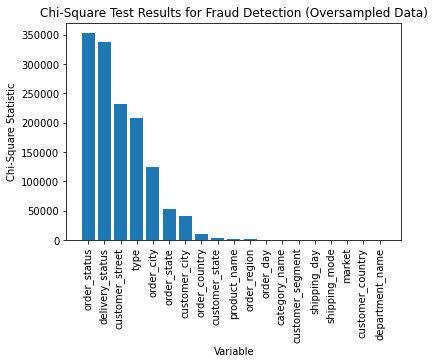

In [111]:
# Plot of chi-square test result on the oversampled data
# Sort the chi2_results dataframe by chi-square statistic
sorted_results = chi2_results_ovs.sort_values(by='Chi-Square Statistic', ascending=False)

# Create a bar plot of the chi-square statistic for each variable
plt.bar(sorted_results['Variable'], sorted_results['Chi-Square Statistic'])
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Chi-Square Statistic')
plt.title('Chi-Square Test Results for Fraud Detection (Oversampled Data)')
plt.show()

In [112]:
# Dataframe for only categorical columns
fraud_detection_cat_ovs = fraud_oversampled.select_dtypes(include=['object'])

print('df shape:', fraud_detection_cat.shape)
fraud_detection_cat_ovs.head()

df shape: (180519, 19)


category_name customer_city customer_country customer_segment  \
0  Sporting Goods        Caguas      Puerto Rico         Consumer   
1  Sporting Goods        Caguas      Puerto Rico         Consumer   
2  Sporting Goods      San Jose          EE. UU.         Consumer   
3  Sporting Goods   Los Angeles          EE. UU.      Home Office   
4  Sporting Goods        Caguas      Puerto Rico        Corporate   

  customer_state           customer_street department_name        market  \
0             PR  5365 Noble Nectar Island         Fitness  Pacific Asia   
1             PR          2679 Rustic Loop         Fitness  Pacific Asia   
2             CA      8510 Round Bear Gate         Fitness  Pacific Asia   
3             CA           3200 Amber Bend         Fitness  Pacific Asia   
4             PR  8671 Iron Anchor Corners         Fitness  Pacific Asia   

   order_city order_country    order_region      order_state     order_status  \
0      Bekasi     Indonesia  Southeast Asia  Java Occidental         COMPLETE   
1     Bikaner         India      South Asia         Rajastán          PENDING   
2     Bikaner         India      South Asia         Rajastán           CLOSED   
3  Townsville     Australia         Oceania       Queensland         COMPLETE   
4  Townsville     Australia         Oceania       Queensland  PENDING_PAYMENT   

   product_name   shipping_mode shipping_day  order_day      type  \
0  Smart watch   Standard Class     Saturday  Wednesday     DEBIT   
1  Smart watch   Standard Class     Thursday   Saturday  TRANSFER   
2  Smart watch   Standard Class    Wednesday   Saturday      CASH   
3  Smart watch   Standard Class      Tuesday   Saturday     DEBIT   
4  Smart watch   Standard Class       Monday   Saturday   PAYMENT   

    delivery_status  
0  Advance shipping  
1     Late delivery  
2  Shipping on time  
3  Advance shipping  
4  Advance shipping

In [113]:
# create a new dataframe `fraud_detection_target_ovs` with the target variable
fraud_detection_target_ovs = fraud_oversampled.loc[:, target_var_f]
print('df shape:', fraud_detection_target_ovs.shape)
fraud_detection_target_ovs.head()

df shape: (352914,)


0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int32

#### Target Encoding the Fraud Oversampled Data

In [114]:
# Instantiate TargetEncoder
encoder_f = ce.TargetEncoder()

# Encode categorical variable
target_encoded_fo = encoder.fit_transform(fraud_detection_cat_ovs, fraud_detection_target_ovs)

# Displaying the encoded data
print('df shape:', target_encoded_fo.shape)
target_encoded_fo.head()

df shape: (352914, 19)


category_name  customer_city  customer_country  customer_segment  \
0       0.601617       0.512996          0.513543          0.512967   
1       0.601617       0.512996          0.513543          0.512967   
2       0.601617       0.581768          0.491177          0.512967   
3       0.601617       0.490402          0.491177          0.494984   
4       0.601617       0.512996          0.513543          0.479458   

   customer_state  customer_street  department_name    market  order_city  \
0        0.513543         0.124870         0.497201  0.484368    0.604545   
1        0.513543         0.008993         0.497201  0.484368    0.311230   
2        0.482865         0.392917         0.497201  0.484368    0.311230   
3        0.482865         0.852495         0.497201  0.484368    0.302469   
4        0.513543         0.262490         0.497201  0.484368    0.302469   

   order_country  order_region  order_state  order_status  product_name  \
0       0.470641      0.466362     0.412710           0.0      0.601617   
1       0.518965      0.452953     0.395669           0.0      0.601617   
2       0.518965      0.452953     0.395669           0.0      0.601617   
3       0.504478      0.498585     0.473438           0.0      0.601617   
4       0.504478      0.498585     0.473438           0.0      0.601617   

   shipping_mode  shipping_day  order_day      type  delivery_status  
0       0.498054      0.491919   0.522607  0.000000              0.0  
1       0.498054      0.514345   0.517544  0.793857              0.0  
2       0.498054      0.505026   0.517544  0.000000              0.0  
3       0.498054      0.483483   0.517544  0.000000              0.0  
4       0.498054      0.517847   0.517544  0.000000              0.0

In [115]:
fraud_detection_cat_final_ovs = target_encoded_fo.copy()
fraud_detection_cat_final_ovs.head()

category_name  customer_city  customer_country  customer_segment  \
0       0.601617       0.512996          0.513543          0.512967   
1       0.601617       0.512996          0.513543          0.512967   
2       0.601617       0.581768          0.491177          0.512967   
3       0.601617       0.490402          0.491177          0.494984   
4       0.601617       0.512996          0.513543          0.479458   

   customer_state  customer_street  department_name    market  order_city  \
0        0.513543         0.124870         0.497201  0.484368    0.604545   
1        0.513543         0.008993         0.497201  0.484368    0.311230   
2        0.482865         0.392917         0.497201  0.484368    0.311230   
3        0.482865         0.852495         0.497201  0.484368    0.302469   
4        0.513543         0.262490         0.497201  0.484368    0.302469   

   order_country  order_region  order_state  order_status  product_name  \
0       0.470641      0.466362     0.412710           0.0      0.601617   
1       0.518965      0.452953     0.395669           0.0      0.601617   
2       0.518965      0.452953     0.395669           0.0      0.601617   
3       0.504478      0.498585     0.473438           0.0      0.601617   
4       0.504478      0.498585     0.473438           0.0      0.601617   

   shipping_mode  shipping_day  order_day      type  delivery_status  
0       0.498054      0.491919   0.522607  0.000000              0.0  
1       0.498054      0.514345   0.517544  0.793857              0.0  
2       0.498054      0.505026   0.517544  0.000000              0.0  
3       0.498054      0.483483   0.517544  0.000000              0.0  
4       0.498054      0.517847   0.517544  0.000000              0.0

In [116]:
# create a new dataframe `fraud_detection_num` with the numerical variables
fraud_detection_num_ovs = fraud_oversampled.loc[:, num_vars_f]

print('df shape:', fraud_detection_num_ovs.shape)
fraud_detection_num_ovs.head()

df shape: (352914, 13)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0                       3                            4          91.250000   
1                       5                            4        -249.089996   
2                       4                            4        -247.779999   
3                       3                            4          22.860001   
4                       2                            4         134.210007   

   sales_per_customer  category_id  customer_id  order_id  \
0          314.640015           73        20755     77202   
1          311.359985           73        19492     75939   
2          309.720001           73        19491     75938   
3          304.809998           73        19490     75937   
4          298.250000           73        19489     75936   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            13.110000                      0.04                    1   
1            16.389999                      0.05                    1   
2            18.030001                      0.06                    1   
3            22.940001                      0.07                    1   
4            29.500000                      0.09                    1   

   shipping_month  shipping_hour  order_week_day  
0               2             22               2  
1               1             12               5  
2               1             12               5  
3               1             11               5  
4               1             11               5

#### Standardising the Fraud Oversampled Data

In [117]:
# Standardize the numerical variables using the StandardScaler class
# Instantiate the StandardScaler
scaler = StandardScaler()

# Apply Standard scaling to the feature_columns
scaled_num_vars = scaler.fit_transform(fraud_detection_num_ovs)

# create a new dataframe with the standardized numerical variables
fraud_detection_std_ovs = pd.DataFrame(scaled_num_vars, columns=fraud_detection_num_ovs.columns)

print('df shape:', fraud_detection_std_ovs.shape)
fraud_detection_std_ovs.head()

df shape: (352914, 13)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0               -0.305727                     0.781568           0.674570   
1                0.929743                     0.781568          -2.617356   
2                0.312008                     0.781568          -2.604686   
3               -0.305727                     0.781568           0.013070   
4               -0.923462                     0.781568           1.090099   

   sales_per_customer  category_id  customer_id  order_id  \
0            1.098214     2.651808     3.377179  1.934137   
1            1.070890     2.651808     3.071183  1.874329   
2            1.057228     2.651808     3.070941  1.874282   
3            1.016326     2.651808     3.070698  1.874234   
4            0.961678     2.651808     3.070456  1.874187   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            -0.355623                 -0.885732            -0.775436   
1            -0.202850                 -0.743557            -0.775436   
2            -0.126464                 -0.601382            -0.775436   
3             0.102229                 -0.459207            -0.775436   
4             0.407774                 -0.174857            -0.775436   

   shipping_month  shipping_hour  order_week_day  
0       -1.246901       1.526415       -0.477791  
1       -1.542686       0.067954        1.005663  
2       -1.542686       0.067954        1.005663  
3       -1.542686      -0.077892        1.005663  
4       -1.542686      -0.077892        1.005663

##### Final Fraud DataFrame For Oversampled Data

In [118]:
# concatenate the three dataframes horizontally using `concat`
fraud_detection_ovs_df = pd.concat([fraud_detection_std_ovs, fraud_detection_cat_final_ovs, fraud_detection_target_ovs], axis=1)

print('df shape:', fraud_detection_ovs_df.shape)
fraud_detection_ovs_df.head()

df shape: (352914, 33)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0               -0.305727                     0.781568           0.674570   
1                0.929743                     0.781568          -2.617356   
2                0.312008                     0.781568          -2.604686   
3               -0.305727                     0.781568           0.013070   
4               -0.923462                     0.781568           1.090099   

   sales_per_customer  category_id  customer_id  order_id  \
0            1.098214     2.651808     3.377179  1.934137   
1            1.070890     2.651808     3.071183  1.874329   
2            1.057228     2.651808     3.070941  1.874282   
3            1.016326     2.651808     3.070698  1.874234   
4            0.961678     2.651808     3.070456  1.874187   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            -0.355623                 -0.885732            -0.775436   
1            -0.202850                 -0.743557            -0.775436   
2            -0.126464                 -0.601382            -0.775436   
3             0.102229                 -0.459207            -0.775436   
4             0.407774                 -0.174857            -0.775436   

   shipping_month  shipping_hour  order_week_day  category_name  \
0       -1.246901       1.526415       -0.477791       0.601617   
1       -1.542686       0.067954        1.005663       0.601617   
2       -1.542686       0.067954        1.005663       0.601617   
3       -1.542686      -0.077892        1.005663       0.601617   
4       -1.542686      -0.077892        1.005663       0.601617   

   customer_city  customer_country  customer_segment  customer_state  \
0       0.512996          0.513543          0.512967        0.513543   
1       0.512996          0.513543          0.512967        0.513543   
2       0.581768          0.491177          0.512967        0.482865   
3       0.490402          0.491177          0.494984        0.482865   
4       0.512996          0.513543          0.479458        0.513543   

   customer_street  department_name    market  order_city  order_country  \
0         0.124870         0.497201  0.484368    0.604545       0.470641   
1         0.008993         0.497201  0.484368    0.311230       0.518965   
2         0.392917         0.497201  0.484368    0.311230       0.518965   
3         0.852495         0.497201  0.484368    0.302469       0.504478   
4         0.262490         0.497201  0.484368    0.302469       0.504478   

   order_region  order_state  order_status  product_name  shipping_mode  \
0      0.466362     0.412710           0.0      0.601617       0.498054   
1      0.452953     0.395669           0.0      0.601617       0.498054   
2      0.452953     0.395669           0.0      0.601617       0.498054   
3      0.498585     0.473438           0.0      0.601617       0.498054   
4      0.498585     0.473438           0.0      0.601617       0.498054   

   shipping_day  order_day      type  delivery_status  fraud  
0      0.491919   0.522607  0.000000              0.0      0  
1      0.514345   0.517544  0.793857              0.0      0  
2      0.505026   0.517544  0.000000              0.0      0  
3      0.483483   0.517544  0.000000              0.0      0  
4      0.517847   0.517544  0.000000              0.0      0

#### c) Using the undersampled fraud data

In [119]:
# Create a new dataframe to store the chi-square test results
chi2_results_unds = pd.DataFrame(columns=['Variable', 'Chi-Square Statistic', 'P-Value'])

# Loop through each categorical variable and perform the chi-square test
for vars in cat_vars_f:
    observed = pd.crosstab(fraud_under_sampled[vars], fraud_under_sampled[target_var_f])
    chi2, p, _, _ = stats.chi2_contingency(observed)
    chi2_results_unds = chi2_results_unds.append({'Variable': vars, 'Chi-Square Statistic': chi2, 'P-Value': p}, ignore_index=True)

# Print the results
print(chi2_results_unds)

            Variable Chi-Square Statistic   P-Value
0               type          4693.901728       0.0
1    delivery_status          7737.421774       0.0
2      category_name            54.850348  0.230939
3      customer_city          1091.045829       0.0
4   customer_country             1.132913  0.287155
5   customer_segment             4.017174  0.134178
6     customer_state            81.094964  0.000276
7    customer_street          5805.002792       0.0
8    department_name            11.122187  0.348078
9             market             7.456912  0.113624
10        order_city          3230.348502       0.0
11     order_country           276.713535       0.0
12      order_region            60.058183  0.000022
13       order_state          1398.680152       0.0
14      order_status               8124.0       0.0
15      product_name           115.866467  0.356972
16     shipping_mode             6.268304  0.099262
17      shipping_day             8.017462  0.236827
18         o

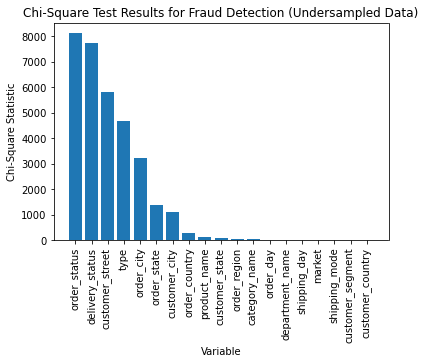

In [120]:
# Plot of chi-square test result on the undersampled data
# Sort the chi2_results dataframe by chi-square statistic
sorted_results = chi2_results_unds.sort_values(by='Chi-Square Statistic', ascending=False)

# Create a bar plot of the chi-square statistic for each variable
plt.bar(sorted_results['Variable'], sorted_results['Chi-Square Statistic'])
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Chi-Square Statistic')
plt.title('Chi-Square Test Results for Fraud Detection (Undersampled Data)')
plt.show()


In [121]:
# Create an empty list to store the significant columns
significant_cols_f = []

# Loop through each row in the chi2_results dataframe and check if the p-value is less than 0.05
for index, row in chi2_results_unds.iterrows():
    if row['P-Value'] < 0.05:
        significant_cols_f.append(row['Variable'])

# Print the significant columns
print("Columns with p-value less than 0.05:")
print(significant_cols_f)

Columns with p-value less than 0.05:
['type', 'delivery_status', 'customer_city', 'customer_state', 'customer_street', 'order_city', 'order_country', 'order_region', 'order_state', 'order_status', 'order_day']


In [122]:
#Creating a dataframe for only the categorical variables
# Dataframe for only categorical columns
fraud_detection_cat_unds = fraud_under_sampled.select_dtypes(include=['object'])

print('df shape:', fraud_detection_cat_unds.shape)
fraud_detection_cat_unds.head()

df shape: (8124, 19)


category_name customer_city customer_country customer_segment  \
0      Water Sports        Quincy          EE. UU.        Corporate   
1    Men's Footwear          Mesa          EE. UU.      Home Office   
2  Camping & Hiking   San Antonio          EE. UU.        Corporate   
3  Cardio Equipment     Las Vegas          EE. UU.        Corporate   
4            Crafts        Caguas      Puerto Rico        Corporate   

  customer_state         customer_street department_name        market  \
0             IL   5292 Colonial Grounds        Fan Shop          USCA   
1             AZ  7125 Silent Expressway         Apparel  Pacific Asia   
2             TX    7864 Lazy Deer Jetty        Fan Shop         LATAM   
3             NV      7464 Quaking Stead        Footwear          USCA   
4             PR         4462 Blue Drive         Apparel  Pacific Asia   

     order_city   order_country     order_region order_state     order_status  \
0       Chicago  Estados Unidos       US Center     Illinois          PENDING   
1  Christchurch   Nueva Zelanda          Oceania  Canterbury   PAYMENT_REVIEW   
2   Tlaquepaque          México  Central America     Jalisco         COMPLETE   
3   Springfield  Estados Unidos       US Center       Misuri  PENDING_PAYMENT   
4      Shenzhen           China     Eastern Asia   Guangdong          PENDING   

                                    product_name   shipping_mode shipping_day  \
0                    Pelican Sunstream 100 Kayak  Standard Class      Tuesday   
1        Nike Men's CJ Elite 2 TD Football Cleat    Second Class     Thursday   
2  Diamondback Women's Serene Classic Comfort Bi  Standard Class     Thursday   
3              Nike Men's Free 5.0+ Running Shoe  Standard Class     Thursday   
4                               Porcelain crafts  Standard Class      Tuesday   

   order_day      type   delivery_status  
0  Wednesday  TRANSFER     Late delivery  
1     Monday   PAYMENT     Late delivery  
2    Tuesday     DEBIT  Advance shipping  
3     Monday   PAYMENT  Advance shipping  
4  Wednesday  TRANSFER     Late delivery

In [123]:
# Using the undersampled fraud data as its p-value has some form of variability 
# Drop all the categorical columns with p-value less than 0.05

fraud_detection_cat_unds.drop(columns=['type', 'delivery_status', 'customer_city', 
                                  'customer_state', 'customer_street', 
                                  'order_city', 'order_country', 'order_region', 
                                  'order_state', 'order_status', 'order_day'], inplace=True)

# Print the new dataframe
print('df shape:', fraud_detection_cat_unds.shape)
fraud_detection_cat_unds.head()

df shape: (8124, 8)


category_name customer_country customer_segment department_name  \
0      Water Sports          EE. UU.        Corporate        Fan Shop   
1    Men's Footwear          EE. UU.      Home Office         Apparel   
2  Camping & Hiking          EE. UU.        Corporate        Fan Shop   
3  Cardio Equipment          EE. UU.        Corporate        Footwear   
4            Crafts      Puerto Rico        Corporate         Apparel   

         market                                   product_name  \
0          USCA                    Pelican Sunstream 100 Kayak   
1  Pacific Asia        Nike Men's CJ Elite 2 TD Football Cleat   
2         LATAM  Diamondback Women's Serene Classic Comfort Bi   
3          USCA              Nike Men's Free 5.0+ Running Shoe   
4  Pacific Asia                               Porcelain crafts   

    shipping_mode shipping_day  
0  Standard Class      Tuesday  
1    Second Class     Thursday  
2  Standard Class     Thursday  
3  Standard Class     Thursday  
4  Standard Class      Tuesday

In [124]:
# create a new dataframe `fraud_detection_target` with the target variable
fraud_detection_target_unds = fraud_under_sampled.loc[:, target_var_f]
print('df shape:', fraud_detection_target_unds.shape)
fraud_detection_target_unds.head()

df shape: (8124,)


0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int32

#### Target Encoding the undersampled fraud data

We now encode the new categorical dataframe after performing chi-square testing on the undersampled dataframe that was obtained after removing the non-significant columns as observed from the results of chi-square testing

In [125]:
# Instantiate TargetEncoder
encoder_f = ce.TargetEncoder()

# Encode categorical variable
target_encoded_fu = encoder.fit_transform(fraud_detection_cat_unds, fraud_detection_target_unds)

# Displaying the encoded data
print('df shape:', target_encoded_fu.shape)
target_encoded_fu.head()

df shape: (8124, 8)


category_name  customer_country  customer_segment  department_name  \
0       0.463380          0.495076          0.484797         0.489116   
1       0.531959          0.495076          0.494810         0.521759   
2       0.501645          0.495076          0.484797         0.489116   
3       0.482517          0.495076          0.484797         0.488823   
4       0.512488          0.507385          0.484797         0.521759   

     market  product_name  shipping_mode  shipping_day  
0  0.508876      0.464034       0.497110      0.484875  
1  0.479052      0.531959       0.481982      0.516156  
2  0.507514      0.501645       0.497110      0.516156  
3  0.508876      0.477639       0.497110      0.516156  
4  0.479052      0.512488       0.497110      0.484875

In [126]:
fraud_detection_cat_final_unds = target_encoded_fu.copy()
fraud_detection_cat_final_unds.head()

category_name  customer_country  customer_segment  department_name  \
0       0.463380          0.495076          0.484797         0.489116   
1       0.531959          0.495076          0.494810         0.521759   
2       0.501645          0.495076          0.484797         0.489116   
3       0.482517          0.495076          0.484797         0.488823   
4       0.512488          0.507385          0.484797         0.521759   

     market  product_name  shipping_mode  shipping_day  
0  0.508876      0.464034       0.497110      0.484875  
1  0.479052      0.531959       0.481982      0.516156  
2  0.507514      0.501645       0.497110      0.516156  
3  0.508876      0.477639       0.497110      0.516156  
4  0.479052      0.512488       0.497110      0.484875

In [127]:
# create a new dataframe `fraud_detection_num` with the numerical variables
fraud_detection_num_unds = fraud_under_sampled.loc[:, num_vars_f]

print('df shape:', fraud_detection_num_unds.shape)
fraud_detection_num_unds.head()

df shape: (8124, 13)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0                       6                            4          85.559998   
1                       3                            2          37.700001   
2                       2                            4         131.119995   
3                       3                            4          25.500000   
4                       6                            4         115.879997   

   sales_per_customer  category_id  customer_id  order_id  \
0          185.990005           48        10676     36865   
1          129.990005           18         1881     30542   
2          278.980011           43        11632     52616   
3          339.970001            9         9627     35807   
4          429.179993           66        18348     74795   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            14.000000                      0.07                    1   
1             0.000000                      0.00                    1   
2            21.000000                      0.07                    1   
3            59.990002                      0.15                    4   
4            32.299999                      0.07                    1   

   shipping_month  shipping_hour  order_week_day  
0               6              3               2  
1               3             19               0  
2               2              1               1  
3               6             16               0  
4               1             19               2

#### Standardising the data

In [128]:
# Standardize the numerical variables using the StandardScaler class
# Instantiate the StandardScaler
scaler = StandardScaler()

# Apply Standard scaling to the feature_columns
scaled_num_vars = scaler.fit_transform(fraud_detection_num_unds)

# create a new dataframe with the standardized numerical variables
fraud_detection_std_unds = pd.DataFrame(scaled_num_vars, columns=fraud_detection_num_unds.columns)

print('df shape:', fraud_detection_std_unds.shape)
fraud_detection_std_unds.head()

df shape: (8124, 13)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0                1.554711                     0.779420           0.631094   
1               -0.305538                    -0.675545           0.162785   
2               -0.925621                     0.779420           1.076898   
3               -0.305538                     0.779420           0.043409   
4                1.554711                     0.779420           0.927775   

   sales_per_customer  category_id  customer_id  order_id  \
0            0.018611     1.022590     0.924919  0.022835   
1           -0.458124    -0.899750    -1.205511 -0.276729   
2            0.810247     0.702200     1.156492  0.769067   
3            1.329462    -1.476453     0.670817 -0.027290   
4            2.088918     2.175995     2.783321  1.819838   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            -0.311101                 -0.442526            -0.775858   
1            -0.986917                 -1.437172            -0.775858   
2             0.026807                 -0.442526            -0.775858   
3             1.908953                  0.694213             1.282176   
4             0.572286                 -0.442526            -0.775858   

   shipping_month  shipping_hour  order_week_day  
0       -0.061834      -1.244566       -0.462032  
1       -0.946237       1.102225       -1.450850  
2       -1.241038      -1.537915       -0.956441  
3       -0.061834       0.662202       -1.450850  
4       -1.535839       1.102225       -0.462032

##### Final Fraud DataFrame For Undersampled Data

In [129]:
# concatenate the three dataframes horizontally using `concat`
fraud_detection_unds_df = pd.concat([fraud_detection_std_unds, fraud_detection_cat_final_unds, fraud_detection_target_unds], axis=1)

print('df shape:', fraud_detection_unds_df.shape)
fraud_detection_unds_df.head()

df shape: (8124, 22)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0                1.554711                     0.779420           0.631094   
1               -0.305538                    -0.675545           0.162785   
2               -0.925621                     0.779420           1.076898   
3               -0.305538                     0.779420           0.043409   
4                1.554711                     0.779420           0.927775   

   sales_per_customer  category_id  customer_id  order_id  \
0            0.018611     1.022590     0.924919  0.022835   
1           -0.458124    -0.899750    -1.205511 -0.276729   
2            0.810247     0.702200     1.156492  0.769067   
3            1.329462    -1.476453     0.670817 -0.027290   
4            2.088918     2.175995     2.783321  1.819838   

   order_item_discount  order_item_discount_rate  order_item_quantity  \
0            -0.311101                 -0.442526            -0.775858   
1            -0.986917                 -1.437172            -0.775858   
2             0.026807                 -0.442526            -0.775858   
3             1.908953                  0.694213             1.282176   
4             0.572286                 -0.442526            -0.775858   

   shipping_month  shipping_hour  order_week_day  category_name  \
0       -0.061834      -1.244566       -0.462032       0.463380   
1       -0.946237       1.102225       -1.450850       0.531959   
2       -1.241038      -1.537915       -0.956441       0.501645   
3       -0.061834       0.662202       -1.450850       0.482517   
4       -1.535839       1.102225       -0.462032       0.512488   

   customer_country  customer_segment  department_name    market  \
0          0.495076          0.484797         0.489116  0.508876   
1          0.495076          0.494810         0.521759  0.479052   
2          0.495076          0.484797         0.489116  0.507514   
3          0.495076          0.484797         0.488823  0.508876   
4          0.507385          0.484797         0.521759  0.479052   

   product_name  shipping_mode  shipping_day  fraud  
0      0.464034       0.497110      0.484875      0  
1      0.531959       0.481982      0.516156      0  
2      0.501645       0.497110      0.516156      0  
3      0.477639       0.497110      0.516156      0  
4      0.512488       0.497110      0.484875      0

<!-- #### Final Dataframe for Fraud Detection Modelling -->

### Sales Prediction

In [130]:
#Create a copy of transformed_df
sales_df = transformed_df.copy()

print('df shape:', sales_df.shape)
sales_df.head()

df shape: (180519, 38)


type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  customer_country  customer_id customer_segment customer_state  \
0      Puerto Rico        20755         Consumer             PR   
1      Puerto Rico        19492         Consumer             PR   
2          EE. UU.        19491         Consumer             CA   
3          EE. UU.        19490      Home Office             CA   
4      Puerto Rico        19489        Corporate             PR   

            customer_street department_name        market  order_city  \
0  5365 Noble Nectar Island         Fitness  Pacific Asia      Bekasi   
1          2679 Rustic Loop         Fitness  Pacific Asia     Bikaner   
2      8510 Round Bear Gate         Fitness  Pacific Asia     Bikaner   
3           3200 Amber Bend         Fitness  Pacific Asia  Townsville   
4  8671 Iron Anchor Corners         Fitness  Pacific Asia  Townsville   

  order_country  order_id  order_item_discount  order_item_discount_rate  \
0     Indonesia     77202            13.110000                      0.04   
1         India     75939            16.389999                      0.05   
2         India     75938            18.030001                      0.06   
3     Australia     75937            22.940001                      0.07   
4     Australia     75936            29.500000                      0.09   

   order_item_quantity    order_region      order_state     order_status  \
0                    1  Southeast Asia  Java Occidental         COMPLETE   
1                    1      South Asia         Rajastán          PENDING   
2                    1      South Asia         Rajastán           CLOSED   
3                    1         Oceania       Queensland         COMPLETE   
4                    1         Oceania       Queensland  PENDING_PAYMENT   

   product_name   shipping_mode  shipping_year  shipping_month shipping_day  \
0  Smart watch   Standard Class           2018               2     Saturday   
1  Smart watch   Standard Class           2018               1     Thursday   
2  Smart watch   Standard Class           2018               1    Wednesday   
3  Smart watch   Standard Class           2018               1      Tuesday   
4  Smart watch   Standard Class           2018               1       Monday   

   shipping_hour  order_year  order_month  order_week_day  order_day  \
0             22        2018            1               2  Wednesday   
1             12        2018            1               5   Saturday   
2             12        2018            1               5   Saturday   
3             11        2018            1               5   Saturday   
4             11        2018            1               5   Saturday   

   order_hour  fraud  
0          22      0  
1          12      0  
2          12      0  
3          11      0  
4          11      0

In [131]:
sales_df["sales_per_customer"].nunique()

2927

In [132]:
sales_df["sales_per_customer"].value_counts()

122.839996    1264
109.190002    1247
124.790001    1243
129.990005    1243
116.989998    1243
              ... 
455.950012       1
470.250000       1
424.790008       1
98.010002        1
474.760010       1
Name: sales_per_customer, Length: 2927, dtype: int64

In [133]:
# List of numerical and categorical variables
# Excluding the target variable ('sales_per_customer'),
# "late_delivery" and "fraud" columns

num_vars_s = ['days_for_shipping_real','days_for_shipment_scheduled',
              'benefit_per_order','category_id', 'customer_id', 
              'order_id', 'order_item_discount', 
              'order_item_discount_rate', 'order_item_quantity', 
              'shipping_month', 'shipping_hour', 'order_week_day']


cat_vars_s = ['type', 'delivery_status', 'category_name', 'customer_city', 
              'customer_country', 'customer_segment', 'customer_state', 
              'customer_street', 'department_name','market', 'order_city',
              'order_country', 'order_region', 'order_state', 
              'order_status', 'product_name', 'shipping_mode', 
              'shipping_day', 'order_day']

target_var_s = 'sales_per_customer'

#### Chi-Square Test for Sales Prediction

In [134]:
# Create a new dataframe to store the chi-square test results
chi2_results_s = pd.DataFrame(columns=['Variable', 'Chi-Square Statistic', 'P-Value'])

# Loop through each categorical variable and perform the chi-square test
for var in cat_vars_s:
    observed = pd.crosstab(sales_df[var], sales_df[target_var_s])
    chi2, p, _, _ = stats.chi2_contingency(observed)
    chi2_results_s = chi2_results_s.append({'Variable': var, 'Chi-Square Statistic': chi2, 'P-Value': p}, ignore_index=True)

# Print the results
print(chi2_results_s)

            Variable Chi-Square Statistic   P-Value
0               type          8621.144773  0.882171
1    delivery_status          8473.931596  0.989745
2      category_name       6826416.163476       0.0
3      customer_city        1627205.91404       1.0
4   customer_country          2887.897717  0.688476
5   customer_segment          5912.103881  0.287797
6     customer_state        132204.421013  0.148866
7    customer_street      24314991.670677       0.0
8    department_name       1612972.000793       0.0
9             market         26955.749023       0.0
10        order_city      10611966.075365       0.0
11     order_country        447215.372152       1.0
12      order_region         78066.799679       0.0
13       order_state       2884470.479024       1.0
14      order_status         23192.224429  0.840678
15      product_name      12430784.064543       0.0
16     shipping_mode          8630.158905  0.868019
17      shipping_day         16797.426862   0.99998
18         o

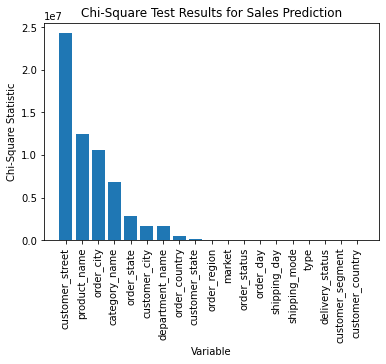

In [135]:
# Plot of chi-square test result

# Sort the chi2_results dataframe by chi-square statistic
sorted_results = chi2_results_s.sort_values(by='Chi-Square Statistic', ascending=False)

# Create a bar plot of the chi-square statistic for each variable
plt.bar(sorted_results['Variable'], sorted_results['Chi-Square Statistic'])
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Chi-Square Statistic')
plt.title('Chi-Square Test Results for Sales Prediction')
plt.show()

In [136]:
# Create an empty list to store the significant columns
significant_cols_s = []

# Loop through each row in the chi2_results dataframe and check if the p-value is less than 0.05
for index, row in chi2_results_s.iterrows():
    if row['P-Value'] < 0.05:
        significant_cols_s.append(row['Variable'])

# Print the significant columns
print("Columns with p-value less than 0.05:")
print(significant_cols_s)

Columns with p-value less than 0.05:
['category_name', 'customer_street', 'department_name', 'market', 'order_city', 'order_region', 'product_name']


In [137]:
# Dataframe for only categorical columns
sales_df_cat = sales_df.select_dtypes(include=['object'])

print('df shape:', sales_df_cat.shape)
sales_df_cat.head()

df shape: (180519, 19)


type   delivery_status   category_name customer_city customer_country  \
0     DEBIT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   
1  TRANSFER     Late delivery  Sporting Goods        Caguas      Puerto Rico   
2      CASH  Shipping on time  Sporting Goods      San Jose          EE. UU.   
3     DEBIT  Advance shipping  Sporting Goods   Los Angeles          EE. UU.   
4   PAYMENT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   

  customer_segment customer_state           customer_street department_name  \
0         Consumer             PR  5365 Noble Nectar Island         Fitness   
1         Consumer             PR          2679 Rustic Loop         Fitness   
2         Consumer             CA      8510 Round Bear Gate         Fitness   
3      Home Office             CA           3200 Amber Bend         Fitness   
4        Corporate             PR  8671 Iron Anchor Corners         Fitness   

         market  order_city order_country    order_region      order_state  \
0  Pacific Asia      Bekasi     Indonesia  Southeast Asia  Java Occidental   
1  Pacific Asia     Bikaner         India      South Asia         Rajastán   
2  Pacific Asia     Bikaner         India      South Asia         Rajastán   
3  Pacific Asia  Townsville     Australia         Oceania       Queensland   
4  Pacific Asia  Townsville     Australia         Oceania       Queensland   

      order_status  product_name   shipping_mode shipping_day  order_day  
0         COMPLETE  Smart watch   Standard Class     Saturday  Wednesday  
1          PENDING  Smart watch   Standard Class     Thursday   Saturday  
2           CLOSED  Smart watch   Standard Class    Wednesday   Saturday  
3         COMPLETE  Smart watch   Standard Class      Tuesday   Saturday  
4  PENDING_PAYMENT  Smart watch   Standard Class       Monday   Saturday

In [138]:
# Drop all the categorical columns with p-value less than 0.05

sales_df_cat.drop(columns= ['category_name', 'customer_street', 
                            'department_name', 'market', 
                            'order_city', 'order_region', 
                            'product_name'], inplace=True)


# Print the new dataframe
print('df shape:', sales_df_cat.shape)
sales_df_cat.head()

df shape: (180519, 12)


type   delivery_status customer_city customer_country customer_segment  \
0     DEBIT  Advance shipping        Caguas      Puerto Rico         Consumer   
1  TRANSFER     Late delivery        Caguas      Puerto Rico         Consumer   
2      CASH  Shipping on time      San Jose          EE. UU.         Consumer   
3     DEBIT  Advance shipping   Los Angeles          EE. UU.      Home Office   
4   PAYMENT  Advance shipping        Caguas      Puerto Rico        Corporate   

  customer_state order_country      order_state     order_status  \
0             PR     Indonesia  Java Occidental         COMPLETE   
1             PR         India         Rajastán          PENDING   
2             CA         India         Rajastán           CLOSED   
3             CA     Australia       Queensland         COMPLETE   
4             PR     Australia       Queensland  PENDING_PAYMENT   

    shipping_mode shipping_day  order_day  
0  Standard Class     Saturday  Wednesday  
1  Standard Class     Thursday   Saturday  
2  Standard Class    Wednesday   Saturday  
3  Standard Class      Tuesday   Saturday  
4  Standard Class       Monday   Saturday

In [139]:
# create a new dataframe `sales_df_target` with the target variable
sales_df_target = sales_df.loc[:, target_var_s]
print('df shape:', sales_df_target.shape)
sales_df_target.head()

df shape: (180519,)


0    314.640015
1    311.359985
2    309.720001
3    304.809998
4    298.250000
Name: sales_per_customer, dtype: float64

#### Target Encoding 

We now encode the new categorical dataframe that was obtained after removing the non-significant columns as observed from the results of chi-square testing

In [140]:
# Instantiate TargetEncoder
encoder_s = ce.TargetEncoder()

# Encode categorical variable
target_encoded_s = encoder.fit_transform(sales_df_cat, sales_df_target)

# Displaying the encoded data
print('df shape:', target_encoded_s.shape)
target_encoded_s.head()

df shape: (180519, 12)


type  delivery_status  customer_city  customer_country  \
0  182.401464       184.082005     183.119580        183.230541   
1  183.741441       182.694518     183.119580        183.230541   
2  184.414093       183.431825     187.320405        183.030879   
3  182.401464       184.082005     183.530295        183.030879   
4  182.908371       184.082005     183.119580        183.230541   

   customer_segment  customer_state  order_country  order_state  order_status  \
0        183.567317      183.230541     181.056912   181.356868    182.536379   
1        183.567317      183.230541     181.051409   181.426155    183.144126   
2        183.567317      182.288081     181.051409   181.426155    184.414093   
3        181.824431      182.288081     179.052656   178.138629    182.536379   
4        183.077806      183.230541     179.052656   178.138629    182.925177   

   shipping_mode  shipping_day   order_day  
0     183.683099    181.869701  178.575505  
1     183.683099    183.404446  186.665246  
2     183.683099    183.420800  186.665246  
3     183.683099    183.754041  186.665246  
4     183.683099    183.198691  186.665246

In [141]:
sales_df_cat_final = target_encoded_s.copy()
sales_df_cat_final.head()

type  delivery_status  customer_city  customer_country  \
0  182.401464       184.082005     183.119580        183.230541   
1  183.741441       182.694518     183.119580        183.230541   
2  184.414093       183.431825     187.320405        183.030879   
3  182.401464       184.082005     183.530295        183.030879   
4  182.908371       184.082005     183.119580        183.230541   

   customer_segment  customer_state  order_country  order_state  order_status  \
0        183.567317      183.230541     181.056912   181.356868    182.536379   
1        183.567317      183.230541     181.051409   181.426155    183.144126   
2        183.567317      182.288081     181.051409   181.426155    184.414093   
3        181.824431      182.288081     179.052656   178.138629    182.536379   
4        183.077806      183.230541     179.052656   178.138629    182.925177   

   shipping_mode  shipping_day   order_day  
0     183.683099    181.869701  178.575505  
1     183.683099    183.404446  186.665246  
2     183.683099    183.420800  186.665246  
3     183.683099    183.754041  186.665246  
4     183.683099    183.198691  186.665246

In [142]:
# create a new dataframe `sales_df_num` with the numerical variables
sales_df_num = sales_df.loc[:, num_vars_s]

print('df shape:', sales_df_num.shape)
sales_df_num.head()

df shape: (180519, 12)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0                       3                            4          91.250000   
1                       5                            4        -249.089996   
2                       4                            4        -247.779999   
3                       3                            4          22.860001   
4                       2                            4         134.210007   

   category_id  customer_id  order_id  order_item_discount  \
0           73        20755     77202            13.110000   
1           73        19492     75939            16.389999   
2           73        19491     75938            18.030001   
3           73        19490     75937            22.940001   
4           73        19489     75936            29.500000   

   order_item_discount_rate  order_item_quantity  shipping_month  \
0                      0.04                    1               2   
1                      0.05                    1               1   
2                      0.06                    1               1   
3                      0.07                    1               1   
4                      0.09                    1               1   

   shipping_hour  order_week_day  
0             22               2  
1             12               5  
2             12               5  
3             11               5  
4             11               5

#### Standardising the data 

In [143]:
# standardize the numerical variables using the StandardScaler class
scaler = StandardScaler()
scaled_num_vars = scaler.fit_transform(sales_df_num)

# create a new dataframe with the standardized numerical variables
sales_df_std = pd.DataFrame(scaled_num_vars, columns=sales_df_num.columns)

print('df shape:', sales_df_std.shape)
sales_df_std.head()

df shape: (180519, 12)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0               -0.306491                     0.777152           0.663343   
1                0.925251                     0.777152          -2.595582   
2                0.309380                     0.777152          -2.583038   
3               -0.306491                     0.777152           0.008474   
4               -0.922361                     0.777152           1.074706   

   category_id  customer_id  order_id  order_item_discount  \
0     2.630978     3.378318  1.947231            -0.346534   
1     2.630978     3.074924  1.887218            -0.196082   
2     2.630978     3.074684  1.887170            -0.120855   
3     2.630978     3.074443  1.887123             0.104366   
4     2.630978     3.074203  1.887075             0.405271   

   order_item_discount_rate  order_item_quantity  shipping_month  \
0                 -0.875782            -0.775836       -1.251329   
1                 -0.733767            -0.775836       -1.545587   
2                 -0.591751            -0.775836       -1.545587   
3                 -0.449736            -0.775836       -1.545587   
4                 -0.165706            -0.775836       -1.545587   

   shipping_hour  order_week_day  
0       1.515834       -0.503426  
1       0.070557        0.995427  
2       0.070557        0.995427  
3      -0.073970        0.995427  
4      -0.073970        0.995427

##### Final Dataframe for Sales Prediction  Modelling

In [144]:
# concatenate the three dataframes horizontally using `concat`
sales_df_final = pd.concat([sales_df_std, sales_df_cat_final, sales_df_target], axis=1)

print('df shape:', sales_df_final.shape)
sales_df_final.head()

df shape: (180519, 25)


days_for_shipping_real  days_for_shipment_scheduled  benefit_per_order  \
0               -0.306491                     0.777152           0.663343   
1                0.925251                     0.777152          -2.595582   
2                0.309380                     0.777152          -2.583038   
3               -0.306491                     0.777152           0.008474   
4               -0.922361                     0.777152           1.074706   

   category_id  customer_id  order_id  order_item_discount  \
0     2.630978     3.378318  1.947231            -0.346534   
1     2.630978     3.074924  1.887218            -0.196082   
2     2.630978     3.074684  1.887170            -0.120855   
3     2.630978     3.074443  1.887123             0.104366   
4     2.630978     3.074203  1.887075             0.405271   

   order_item_discount_rate  order_item_quantity  shipping_month  \
0                 -0.875782            -0.775836       -1.251329   
1                 -0.733767            -0.775836       -1.545587   
2                 -0.591751            -0.775836       -1.545587   
3                 -0.449736            -0.775836       -1.545587   
4                 -0.165706            -0.775836       -1.545587   

   shipping_hour  order_week_day        type  delivery_status  customer_city  \
0       1.515834       -0.503426  182.401464       184.082005     183.119580   
1       0.070557        0.995427  183.741441       182.694518     183.119580   
2       0.070557        0.995427  184.414093       183.431825     187.320405   
3      -0.073970        0.995427  182.401464       184.082005     183.530295   
4      -0.073970        0.995427  182.908371       184.082005     183.119580   

   customer_country  customer_segment  customer_state  order_country  \
0        183.230541        183.567317      183.230541     181.056912   
1        183.230541        183.567317      183.230541     181.051409   
2        183.030879        183.567317      182.288081     181.051409   
3        183.030879        181.824431      182.288081     179.052656   
4        183.230541        183.077806      183.230541     179.052656   

   order_state  order_status  shipping_mode  shipping_day   order_day  \
0   181.356868    182.536379     183.683099    181.869701  178.575505   
1   181.426155    183.144126     183.683099    183.404446  186.665246   
2   181.426155    184.414093     183.683099    183.420800  186.665246   
3   178.138629    182.536379     183.683099    183.754041  186.665246   
4   178.138629    182.925177     183.683099    183.198691  186.665246   

   sales_per_customer  
0          314.640015  
1          311.359985  
2          309.720001  
3          304.809998  
4          298.250000

## 6. Implementation and Evaluation of Machine Learning Models

The data is now ready to be used in machine learning models since many different models are compared training every model from begining is complicated so a function is defined to make the process bit easy. The output is in binary classification format so all the models are measured with Accuracy score,recall score and F1 score metrics.

### I) Order Delivery Risk Prediction

#### Splitting the data 

In [145]:
# Splitting independent and dependent features from the processsed dataset
xl = order_delivery_df.drop(['late_delivery_risk'],axis=1)# drop the column that contains the dependent feature
yl = order_delivery_df['late_delivery_risk'] # select the column that contains the dependent feature

# Print the shape of the independent and dependent features
print("xl shape:", xl.shape)
print("yl shape:", yl.shape)

xl shape: (180519, 21)
yl shape: (180519,)


In [146]:
yl

0         0
1         1
2         0
3         0
4         0
         ..
180514    0
180515    1
180516    1
180517    0
180518    0
Name: late_delivery_risk, Length: 180519, dtype: int64

In [147]:
# # Splitting the data into training and testing sets
xl_train, xl_test, yl_train, yl_test = model_selection.train_test_split(xl, yl, test_size=0.2, random_state=42)

# # Saving columns in a list to use in iterating through features later
# xl_train_cols = xl_train.columns


print("xl_train shape:",xl_train.shape)
print("xl_test shape:",xl_test.shape)
print("yl_train shape:",yl_train.shape)
print("yl_test shape:",yl_test.shape)

xl_train shape: (144415, 21)
xl_test shape: (36104, 21)
yl_train shape: (144415,)
yl_test shape: (36104,)


#### Modelling 

In [148]:
Models = ["Logistic_Regression", "Random_Forest", "Naive_Bayes", "Decision_Tree"]
classifiers = [LogisticRegression(), RandomForestClassifier(), GaussianNB(), DecisionTreeClassifier()]

# Train each classifier, make predictions, and calculate performance metrics using cross-validation
scores = {"Accuracy": [], "Precision": [], "Recall": [], "F1": [], "AUC": []}
for model in classifiers:
    cv_scores = cross_val_score(model, xl, yl, cv=5, scoring='accuracy') # Replace X and y with your feature matrix and target vector, respectively
    scores["Accuracy"].append(np.mean(cv_scores))
    
    cv_scores = cross_val_score(model, xl, yl, cv=5, scoring='precision')
    scores["Precision"].append(np.mean(cv_scores))
    
    cv_scores = cross_val_score(model, xl, yl, cv=5, scoring='recall')
    scores["Recall"].append(np.mean(cv_scores))
    
    cv_scores = cross_val_score(model, xl, yl, cv=5, scoring='f1')
    scores["F1"].append(np.mean(cv_scores))
    
    cv_scores = cross_val_score(model, xl, yl, cv=5, scoring='roc_auc')
    scores["AUC"].append(np.mean(cv_scores))

# Select the best performing model based on the F1 score
order_best_model_index = np.argmax(scores["F1"])
order_best_model = classifiers[order_best_model_index]
order_best_model_name = Models[order_best_model_index]
print(f"\nBest model for Order Delivery Risk based on F1 score: {order_best_model_name} ({type(order_best_model).__name__})")

# Save the best model using pickle
with open("order_delivery_best_model.pkl", "wb") as file:
    pickle.dump(order_best_model, file)
    


Best model for Order Delivery Risk based on F1 score: Logistic_Regression (LogisticRegression)


In [149]:
# Create a summary DataFrame
summary = pd.DataFrame(data=scores, index=Models)
summary

Accuracy  Precision    Recall        F1       AUC
Logistic_Regression  0.975498   0.957486  1.000000  0.978215  0.972987
Random_Forest        0.957827   0.954582  0.963801  0.959937  0.972253
Naive_Bayes          0.913039   0.874460  0.983845  0.925641  0.909051
Decision_Tree        0.927210   0.960554  0.904716  0.930614  0.928675

In [150]:
for model in classifiers:
    model.fit(xl_train, yl_train)
    yl_pred = model.predict(xl_test)

#### Evaluating the Models Obtained 

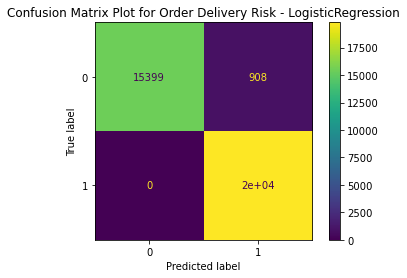

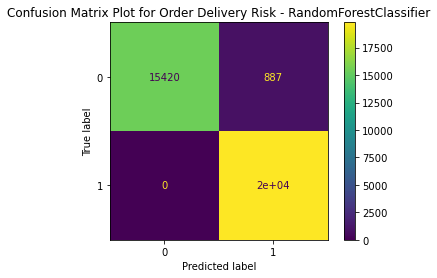

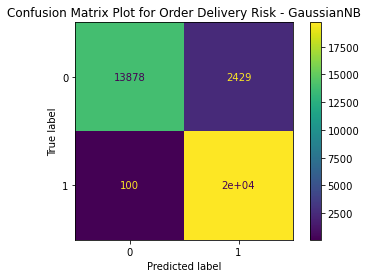

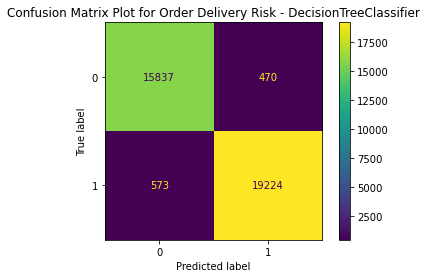

In [151]:
# Loop through each classifier
for i, model in enumerate(classifiers):

# Plot the confusion matrix
    disp = plot_confusion_matrix(model, xl_test, yl_test, 
                             display_labels=[0, 1], 
                             cmap=plt.cm.viridis, normalize=None)
    disp.ax_.set_title(f'Confusion Matrix Plot for Order Delivery Risk - {type(model).__name__}')

# Show the plot
plt.show()

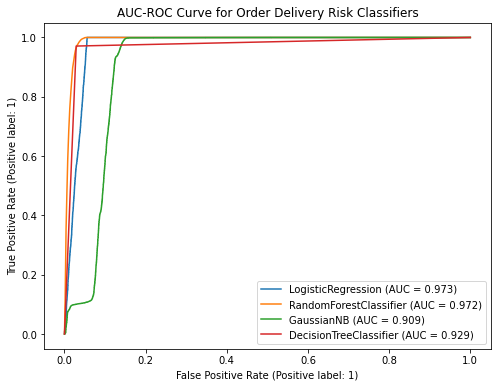

In [152]:
# Plot AUC-ROC curve for each classifier
fig, ax = plt.subplots(figsize=(8, 6))
for i, model in enumerate(classifiers):
    plot_roc_curve(model, xl_test, yl_test, ax=ax, label=f"{type(model).__name__} (AUC = {np.mean(scores['AUC'][i]):.3f})")

plt.title("AUC-ROC Curve for Order Delivery Risk Classifiers")
plt.legend()
plt.show()

### II) Fraud Detection

#### A) Before Balancing

##### Splitting the Data after Oversampling

Splitting the data into independent and dependent features, that is, creating x which is the feature matrix and then y which is the target variable

In [153]:
# Splitting independent and dependent features from the processsed dataset
xf = fraud_detection_imb_df.drop(['fraud'],axis=1)# drop the column that contains the dependent feature
yf = fraud_detection_imb_df['fraud'] # select the column that contains the dependent feature

# Print the shape of the independent and dependent features
print("xf shape:", xf.shape)
print("yf shape:", yf.shape)

xf shape: (180519, 18)
yf shape: (180519,)


In [154]:
# Splitting the data into training and testing sets
xf_train, xf_test, yf_train, yf_test = train_test_split(xf , yf, test_size=0.2, random_state=42)

print("xf_train shape:",xf_train.shape)
print("xf_test shape:",xf_test.shape)
print("yf_train shape:",yf_train.shape)
print("yf_test shape:",yf_test.shape)

xf_train shape: (144415, 18)
xf_test shape: (36104, 18)
yf_train shape: (144415,)
yf_test shape: (36104,)


##### Modelling the imbalanced dataframe

In [155]:
Models = ["Logistic_Regression","Random_Forest", "Naive_Bayes", "Decision_Tree"]

classifiers=[LogisticRegression(), 
             RandomForestClassifier(), 
             GaussianNB(), DecisionTreeClassifier()]

# Train each classifier, make predictions, and calculate performance metrics

scores = {"Accuracy": [], "Precision": [], "Recall": [], "F1": [], "AUC": []}
for model in classifiers:
    model.fit(xf_train, yf_train)
    yf_pred = model.predict(xf_test)
    scores["Accuracy"].append(accuracy_score(yf_test, yf_pred))
    scores["Precision"].append(precision_score(yf_test, yf_pred))
    scores["Recall"].append(recall_score(yf_test, yf_pred))
    scores["F1"].append(f1_score(yf_test, yf_pred))
    scores["AUC"].append(roc_auc_score(yf_test, yf_pred))

# Print out the performance metrics for each classifier
for i, model in enumerate(classifiers):
    print(f"Classifier {i+1} ({type(model).__name__}):")
    print(f"Accuracy: {np.mean(scores['Accuracy'][i]):.4f}")
    print(f"Precision: {np.mean(scores['Precision'][i]):.4f}")
    print(f"Recall: {np.mean(scores['Recall'][i]):.4f}")
    print(f"F1 score: {np.mean(scores['F1'][i]):.4f}")
    print(f"AUC: {np.mean(scores['AUC'][i]):.4f}")
    
    
summary= pd.DataFrame(data=scores,index=Models)
summary

Classifier 1 (LogisticRegression):
Accuracy: 0.9765
Precision: 0.0000
Recall: 0.0000
F1 score: 0.0000
AUC: 0.5000
Classifier 2 (RandomForestClassifier):
Accuracy: 0.9766
Precision: 1.0000
Recall: 0.0059
F1 score: 0.0117
AUC: 0.5029
Classifier 3 (GaussianNB):
Accuracy: 0.9694
Precision: 0.0530
Recall: 0.0176
F1 score: 0.0265
AUC: 0.5050
Classifier 4 (DecisionTreeClassifier):
Accuracy: 0.9693
Precision: 0.3647
Recall: 0.4106
F1 score: 0.3863
AUC: 0.6967


Accuracy  Precision    Recall        F1       AUC
Logistic_Regression  0.976457   0.000000  0.000000  0.000000  0.500000
Random_Forest        0.976595   1.000000  0.005882  0.011696  0.502941
Naive_Bayes          0.969449   0.053004  0.017647  0.026478  0.505023
Decision_Tree        0.969283   0.364681  0.410588  0.386276  0.696671

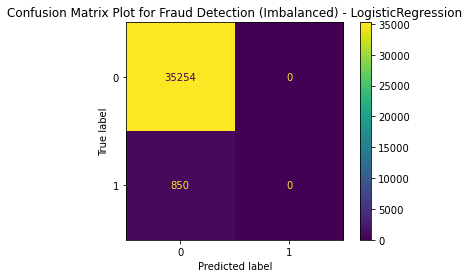

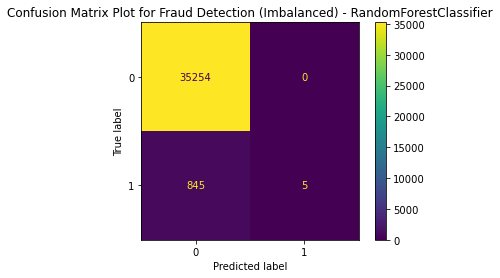

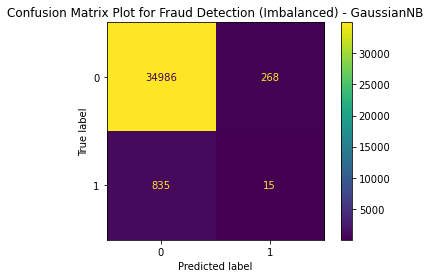

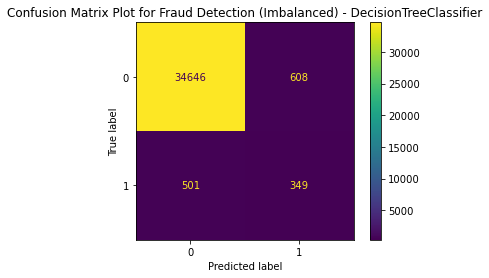

In [156]:
# Loop through each classifier
for i, model in enumerate(classifiers):

# Plot the confusion matrix
    disp = plot_confusion_matrix(model, xf_test, yf_test, 
                             display_labels=[0, 1], 
                             cmap=plt.cm.viridis, normalize=None)
    disp.ax_.set_title(f'Confusion Matrix Plot for Fraud Detection (Imbalanced) - {type(model).__name__}')

# Show the plot
plt.show()

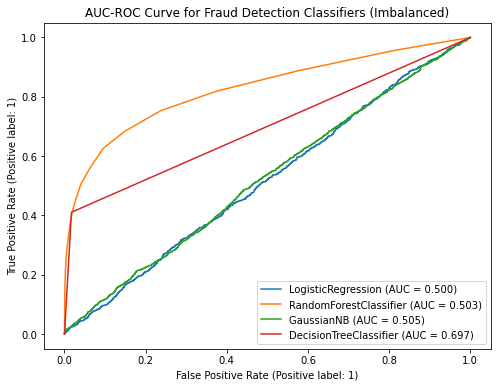

In [157]:
# Plot AUC-ROC curve for each classifier
fig, ax = plt.subplots(figsize=(8, 6))
for i, model in enumerate(classifiers):
    plot_roc_curve(model, xf_test, yf_test, ax=ax, label=f"{type(model).__name__} (AUC = {np.mean(scores['AUC'][i]):.3f})")

plt.title("AUC-ROC Curve for Fraud Detection Classifiers (Imbalanced)")
plt.legend()
plt.show()

#### B) After Oversampling the Data

##### Splitting the Data after Oversampling

In [158]:
# Splitting independent and dependent features from the processsed dataset
xf1 = fraud_detection_ovs_df.drop(['fraud'],axis=1)# drop the column that contains the dependent feature
yf1 = fraud_detection_ovs_df['fraud'] # select the column that contains the dependent feature

# Print the shape of the independent and dependent features
print("xf1 shape:", xf1.shape)
print("yf1 shape:", yf1.shape)

xf1 shape: (352914, 32)
yf1 shape: (352914,)


In [159]:
# Splitting the data into training and testing sets
xf1_train, xf1_test, yf1_train, yf1_test = model_selection.train_test_split(xf1 , yf1, test_size=0.2, random_state=42)

print("xf1_train shape:",xf1_train.shape)
print("xf1_test shape:",xf1_test.shape)
print("yf1_train shape:",yf1_train.shape)
print("yf1_test shape:",yf1_test.shape)

xf1_train shape: (282331, 32)
xf1_test shape: (70583, 32)
yf1_train shape: (282331,)
yf1_test shape: (70583,)


##### Modelling after Oversampling

In [160]:
Models = ["Logistic_Regression","Random_Forest", "Naive_Bayes", "Decision_Tree"]

classifiers=[LogisticRegression(), 
             RandomForestClassifier(), 
             GaussianNB(), DecisionTreeClassifier()]

# Train each classifier, make predictions, and calculate performance metrics

scores = {"Accuracy": [], "Precision": [], "Recall": [], "F1": [], "AUC": []}
for model in classifiers:
    model.fit(xf1_train, yf1_train)
    yf1_pred = model.predict(xf1_test)
    scores["Accuracy"].append(accuracy_score(yf1_test, yf1_pred))
    scores["Precision"].append(precision_score(yf1_test, yf1_pred))
    scores["Recall"].append(recall_score(yf1_test, yf1_pred))
    scores["F1"].append(f1_score(yf1_test, yf1_pred))
    scores["AUC"].append(roc_auc_score(yf1_test, yf1_pred))

# Print out the performance metrics for each classifier
for i, model in enumerate(classifiers):
    print(f"Classifier {i+1} ({type(model).__name__}):")
    print(f"Accuracy: {np.mean(scores['Accuracy'][i]):.4f}")
    print(f"Precision: {np.mean(scores['Precision'][i]):.4f}")
    print(f"Recall: {np.mean(scores['Recall'][i]):.4f}")
    print(f"F1 score: {np.mean(scores['F1'][i]):.4f}")
    print(f"AUC: {np.mean(scores['AUC'][i]):.4f}")
    
    
summary= pd.DataFrame(data=scores,index=Models)
summary

Classifier 1 (LogisticRegression):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 score: 1.0000
AUC: 1.0000
Classifier 2 (RandomForestClassifier):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 score: 1.0000
AUC: 1.0000
Classifier 3 (GaussianNB):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 score: 1.0000
AUC: 1.0000
Classifier 4 (DecisionTreeClassifier):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 score: 1.0000
AUC: 1.0000


Accuracy  Precision  Recall   F1  AUC
Logistic_Regression       1.0        1.0     1.0  1.0  1.0
Random_Forest             1.0        1.0     1.0  1.0  1.0
Naive_Bayes               1.0        1.0     1.0  1.0  1.0
Decision_Tree             1.0        1.0     1.0  1.0  1.0

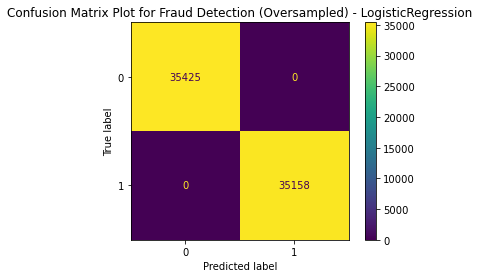

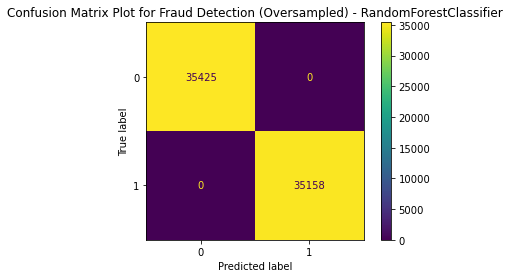

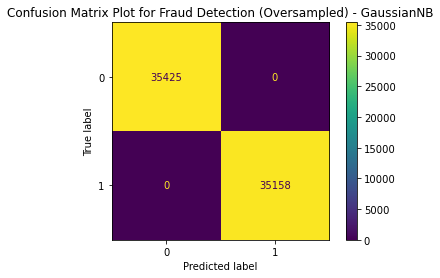

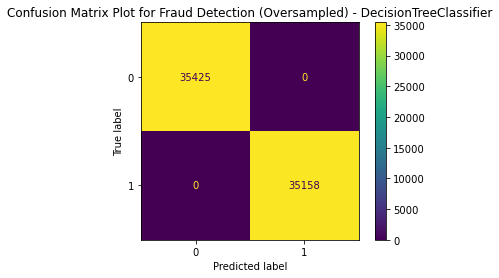

In [161]:
# Loop through each classifier
for i, model in enumerate(classifiers):

# Plot the confusion matrix
    disp = plot_confusion_matrix(model, xf1_test, yf1_test, 
                             display_labels=[0, 1], 
                             cmap=plt.cm.viridis, normalize=None)
    disp.ax_.set_title(f'Confusion Matrix Plot for Fraud Detection (Oversampled) - {type(model).__name__}')

# Show the plot
plt.show()

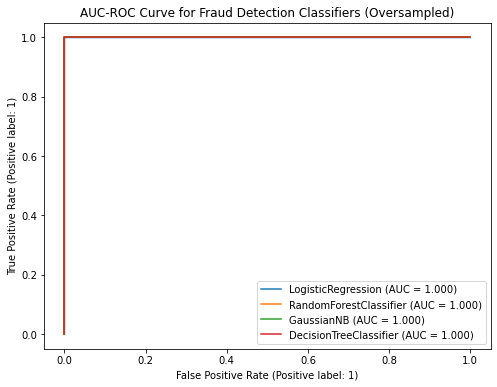

In [162]:
# Plot AUC-ROC curve for each classifier
fig, ax = plt.subplots(figsize=(8, 6))
for i, model in enumerate(classifiers):
    plot_roc_curve(model, xf1_test, yf1_test, ax=ax, label=f"{type(model).__name__} (AUC = {np.mean(scores['AUC'][i]):.3f})")

plt.title("AUC-ROC Curve for Fraud Detection Classifiers (Oversampled)")
plt.legend()
plt.show()

#### C) After Undersampling the Data

##### Splitting the Data after Undersampling

In [163]:
# Splitting independent and dependent features from the processsed dataset
xfi = fraud_detection_unds_df.drop(['fraud'],axis=1)# drop the column that contains the dependent feature
yfi = fraud_detection_unds_df['fraud'] # select the column that contains the dependent feature

# Print the shape of the independent and dependent features
print("xfi shape:", xfi.shape)
print("yfi shape:", yfi.shape)

xfi shape: (8124, 21)
yfi shape: (8124,)


In [164]:
# Splitting the data into training and testing sets
xfi_train, xfi_test, yfi_train, yfi_test = model_selection.train_test_split(xfi , yfi, test_size=0.2, random_state=42)

print("xfi_train shape:", xfi_train.shape)
print("xfi_test shape:", xfi_test.shape)
print("yfi_train shape:", yfi_train.shape)
print("yfi_test shape:", yfi_test.shape)

xfi_train shape: (6499, 21)
xfi_test shape: (1625, 21)
yfi_train shape: (6499,)
yfi_test shape: (1625,)


##### Modelling after Undersampling

In [165]:
Models = ["Logistic_Regression","Random_Forest", "Naive_Bayes", "Decision_Tree"]

classifiers=[LogisticRegression(), 
             RandomForestClassifier(), 
             GaussianNB(), DecisionTreeClassifier()]


# Train each classifier, make predictions, and calculate performance metrics

scores = {"Accuracy": [], "Precision": [], "Recall": [], "F1": [], "AUC": []}
for model in classifiers:
    model.fit(xfi_train, yfi_train)
    yfi_pred = model.predict(xfi_test)
    scores["Accuracy"].append(accuracy_score(yfi_test, yfi_pred))
    scores["Precision"].append(precision_score(yfi_test, yfi_pred))
    scores["Recall"].append(recall_score(yfi_test, yfi_pred))
    scores["F1"].append(f1_score(yfi_test, yfi_pred))
    scores["AUC"].append(roc_auc_score(yfi_test, yfi_pred))

# Print out the performance metrics for each classifier
for i, model in enumerate(classifiers):
    print(f"Classifier {i+1} ({type(model).__name__}):")
    print(f"Accuracy: {np.mean(scores['Accuracy'][i]):.4f}")
    print(f"Precision: {np.mean(scores['Precision'][i]):.4f}")
    print(f"Recall: {np.mean(scores['Recall'][i]):.4f}")
    print(f"F1 score: {np.mean(scores['F1'][i]):.4f}")
    print(f"AUC: {np.mean(scores['AUC'][i]):.4f}")
    
    
# Select the best performing model based on the F1 score
fraud_best_model_index = np.argmax(scores["F1"])
fraud_best_model = classifiers[fraud_best_model_index]
fraud_best_model_name = Models[fraud_best_model_index]
print(f"\nBest model for Fraud Detection based on F1 score: {fraud_best_model_name} ({type(fraud_best_model).__name__})")

# Save the best model using pickle
with open("fraud_detection_best_model.pkl", "wb") as file:
    pickle.dump(fraud_best_model, file)

Classifier 1 (LogisticRegression):
Accuracy: 0.5403
Precision: 0.5266
Recall: 0.5631
F1 score: 0.5442
AUC: 0.5409
Classifier 2 (RandomForestClassifier):
Accuracy: 0.6449
Precision: 0.6297
Recall: 0.6591
F1 score: 0.6440
AUC: 0.6453
Classifier 3 (GaussianNB):
Accuracy: 0.5354
Precision: 0.5210
Recall: 0.5783
F1 score: 0.5482
AUC: 0.5364
Classifier 4 (DecisionTreeClassifier):
Accuracy: 0.5588
Precision: 0.5439
Recall: 0.5871
F1 score: 0.5647
AUC: 0.5595

Best model for Fraud Detection based on F1 score: Random_Forest (RandomForestClassifier)


In [166]:
summary= pd.DataFrame(data=scores,index=Models)
summary

Accuracy  Precision    Recall        F1       AUC
Logistic_Regression  0.540308   0.526564  0.563131  0.544234  0.540869
Random_Forest        0.644923   0.629674  0.659091  0.644047  0.645272
Naive_Bayes          0.535385   0.521047  0.578283  0.548175  0.536440
Decision_Tree        0.558769   0.543860  0.587121  0.564663  0.559467

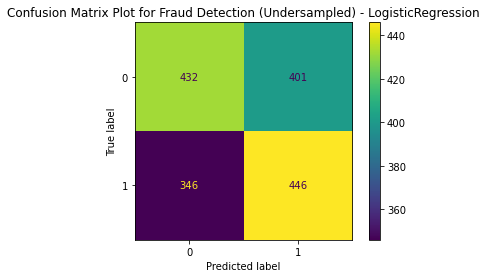

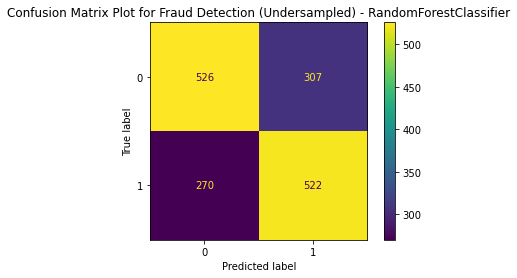

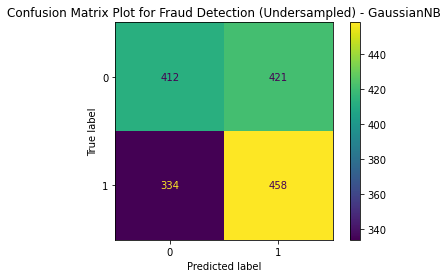

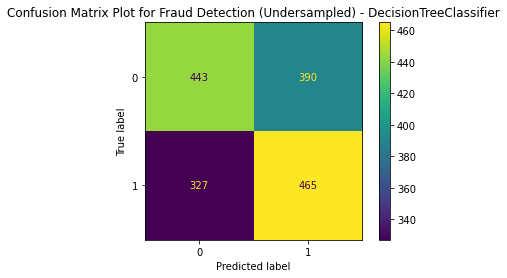

In [167]:
# Loop through each classifier
for i, model in enumerate(classifiers):

# Plot the confusion matrix
    disp = plot_confusion_matrix(model, xfi_test, yfi_test, 
                             display_labels=[0, 1], 
                             cmap=plt.cm.viridis, normalize=None)
    disp.ax_.set_title(f'Confusion Matrix Plot for Fraud Detection (Undersampled) - {type(model).__name__}')

# Show the plot
plt.show()

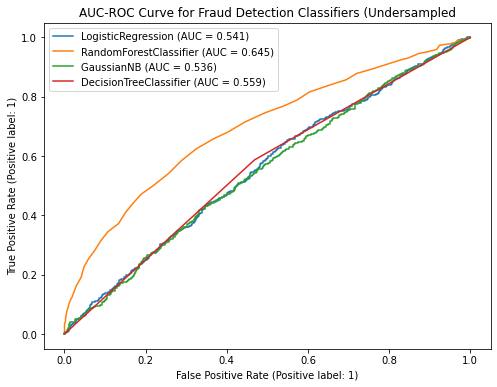

In [168]:
# Plot AUC-ROC curve for each classifier
fig, ax = plt.subplots(figsize=(8, 6))
for i, model in enumerate(classifiers):
    plot_roc_curve(model, xfi_test, yfi_test, ax=ax, label=f"{type(model).__name__} (AUC = {np.mean(scores['AUC'][i]):.3f})")

plt.title("AUC-ROC Curve for Fraud Detection Classifiers (Undersampled")
plt.legend()
plt.show()

### III) Sales Prediction

#### Splitting the data for sales 

In [169]:
# Splitting independent and dependent features from the processsed dataset
xs = sales_df_final.drop(['sales_per_customer'],axis=1)# drop the column that contains the dependent feature
ys = sales_df_final['sales_per_customer'] # select the column that contains the dependent feature

# Print the shape of the independent and dependent features
print("xs shape:", xs.shape)
print("ys shape:", ys.shape)

xs shape: (180519, 24)
ys shape: (180519,)


In [170]:
# Splitting the data into training and testing sets
xs_train, xs_test, ys_train, ys_test = model_selection.train_test_split(xs, ys, test_size=0.2, random_state=42)

print("xs_train shape:",xs_train.shape)
print("xs_test shape:",xs_test.shape)
print("ys_train shape:",ys_train.shape)
print("ys_test shape:",ys_test.shape)

xs_train shape: (144415, 24)
xs_test shape: (36104, 24)
ys_train shape: (144415,)
ys_test shape: (36104,)


#### Modelling and Evaluation

In [ ]:
Models = ["Linear Regression", "Random Forest Regression", "Gradient Boosting Regression", "Huber Regression"]
regressors = [LinearRegression(), RandomForestRegressor(), GradientBoostingRegressor(),  HuberRegressor(epsilon=1.35)]

# Train each regressor, make predictions, check for accuracy,and calculate performance metrics
scores = {"Accuracy": [], "RMSE": [], "R^2": [], "MAE": [], "MBD": []}
for model in regressors:
    model.fit(xs_train, ys_train)
    ys_pred = model.predict(xs_test)
    residuals = ys_test - ys_pred
    scores["Accuracy"].append(model.score(xs_test, ys_test))
    scores["RMSE"].append(np.sqrt(mean_squared_error(ys_test, ys_pred)))
    scores["R^2"].append(r2_score(ys_test, ys_pred))
    scores["MAE"].append(mean_absolute_error(ys_test, ys_pred))
    scores["MBD"].append(np.mean((ys_pred - ys_test) / ys_test) * 100)

# print out the performance metrics for each regressor
for i, model in enumerate(regressors):
    print(f"Regressor {i+1} ({type(model).__name__}):")
    print(f"RMSE: {np.mean(scores['RMSE'][i]):.4f}")
    print(f"R^2: {np.mean(scores['R^2'][i]):.4f}")
    print(f"Accuracy: {np.mean(scores['Accuracy'][i]):.4f}")


# Select the best performing model based on the RMSE score
best_model_index = np.argmin(scores["RMSE"])
sales_best_model = regressors[best_model_index]
sales_best_model_name = Models[best_model_index]
print(f"\nBest model for Sales Prediction based on RMSE score: {sales_best_model_name} ({type(sales_best_model).__name__})")

# Save the best model using pickle
with open("sales_best_model.pkl", "wb") as file:
    pickle.dump(sales_best_model, file)

In [ ]:
summary = pd.DataFrame(data=scores, index=Models)
summary

In [ ]:
# Plot scatter plots for each regressor
for i, model in enumerate(regressors):
    ys_pred = model.predict(xs_test)
    plt.scatter(ys_test, ys_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Scatter plot for Regressor {i+1} ({type(model).__name__})")
    plt.show()

In [ ]:
# Plot residual plots for each regressor
for i, model in enumerate(regressors):
    ys_pred = model.predict(xs_test)
    residuals = ys_test - ys_pred
    plt.scatter(ys_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot for Regressor {i+1} ({type(model).__name__})")
    plt.show()